In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
train = pd.read_csv("../data/raw/train.csv") 

**Punto 11**

In [ ]:
t = train.copy()

def grupo_edad(a):
    if pd.isna(a):
        return np.nan
    if a < 10:
        return "Niños (<10)"
    if 18 <= a <= 49:
        return "Adultos (18-49)"
    if a >= 50:
        return "Mayores (50+)"
    return np.nan  

t["grupo_etario"] = t["Age"].apply(grupo_edad)
t["Cabina_Registrada"] = np.where(t["Cabin"].notna(), "Con cabina", "Sin cabina")

res = (
    t.groupby(["grupo_etario", "Sex", "Cabina_Registrada", "Survived"])
     .size()
     .reset_index(name="conteo")
)

res["proporcion_%"] = (
    res.groupby(["grupo_etario", "Sex", "Cabina_Registrada"])["conteo"]
       .transform(lambda x: 100 * x / x.sum())
       .round(2)
)

display(res.sort_values(["grupo_etario", "Sex", "Cabina_Registrada", "Survived"]))

tabla = (
    res.pivot_table(index=["grupo_etario", "Sex", "Cabina_Registrada"],
                    columns="Survived", values="proporcion_%", fill_value=0)
       .rename(columns={0: "No sobrevivió (%)", 1: "Sobrevivió (%)"})
       .reset_index()
)

display(tabla.sort_values(["grupo_etario", "Sex", "Cabina_Registrada"]))

grupo_etario     Sex Cabina_Registrada  Survived  conteo  proporcion_%
0   Adultos (18-49)  female        Con cabina         0       2          3.12
1   Adultos (18-49)  female        Con cabina         1      62         96.88
2   Adultos (18-49)  female        Sin cabina         0      43         35.83
3   Adultos (18-49)  female        Sin cabina         1      77         64.17
4   Adultos (18-49)    male        Con cabina         0      37         56.92
5   Adultos (18-49)    male        Con cabina         1      28         43.08
6   Adultos (18-49)    male        Sin cabina         0     243         87.41
7   Adultos (18-49)    male        Sin cabina         1      35         12.59
8     Mayores (50+)  female        Con cabina         0       2         13.33
9     Mayores (50+)  female        Con cabina         1      13         86.67
10    Mayores (50+)  female        Sin cabina         1       7        100.00
11    Mayores (50+)    male        Con cabina         0      17         77.27
12    Mayores (50+)    male        Con cabina         1       5         22.73
13    Mayores (50+)    male        Sin cabina         0      28         93.33
14    Mayores (50+)    male        Sin cabina         1       2          6.67
15      Niños (<10)  female        Con cabina         0       2         50.00
16      Niños (<10)  female        Con cabina         1       2         50.00
17      Niños (<10)  female        Sin cabina         0       9         34.62
18      Niños (<10)  female        Sin cabina         1      17         65.38
19      Niños (<10)    male        Con cabina         1       6        100.00
20      Niños (<10)    male        Sin cabina         0      13         50.00
21      Niños (<10)    male        Sin cabina         1      13         50.00

Survived     grupo_etario     Sex Cabina_Registrada  No sobrevivió (%)  \
0         Adultos (18-49)  female        Con cabina               3.12   
1         Adultos (18-49)  female        Sin cabina              35.83   
2         Adultos (18-49)    male        Con cabina              56.92   
3         Adultos (18-49)    male        Sin cabina              87.41   
4           Mayores (50+)  female        Con cabina              13.33   
5           Mayores (50+)  female        Sin cabina               0.00   
6           Mayores (50+)    male        Con cabina              77.27   
7           Mayores (50+)    male        Sin cabina              93.33   
8             Niños (<10)  female        Con cabina              50.00   
9             Niños (<10)  female        Sin cabina              34.62   
10            Niños (<10)    male        Con cabina               0.00   
11            Niños (<10)    male        Sin cabina              50.00   

Survived  Sobrevivió (%)  
0                  96.88  
1                  64.17  
2                  43.08  
3                  12.59  
4                  86.67  
5                 100.00  
6                  22.73  
7                   6.67  
8                  50.00  
9                  65.38  
10                100.00  
11                 50.00

Con base en las dos tablas, se puede observar un patrón claro en cómo la edad, el sexo y la disponibilidad de cabina influyeron en las probabilidades de supervivencia en el Titanic.

En el grupo de adultos (18 a 49 años), las mujeres tuvieron una clara ventaja: aquellas con cabina sobrevivieron en un 96.88%, y aun sin cabina la supervivencia fue del 64.17%. En contraste, los hombres adultos presentaron tasas de supervivencia mucho más bajas: solo el 43.08% de quienes tenían cabina sobrevivió, y apenas el 12.59% entre quienes no contaban con una. Esto muestra que, en este grupo etario, el sexo fue un factor decisivo, reforzando la política de evacuación prioritaria de “mujeres y niños primero”.

En el grupo de mayores de 50 años, la diferencia entre sexos fue también significativa. Las mujeres de esta edad sobrevivieron en un 86.67% si tenían cabina y en un 100% cuando no la tenían, mientras que los hombres mayores apenas alcanzaron un 22.73% de supervivencia con cabina y 6.67% sin ella. Esto refleja que la edad avanzada, combinada con el género masculino, reducía notablemente las probabilidades de sobrevivir, incluso en condiciones más favorables.

Por último, entre los niños menores de 10 años, los porcentajes se acercan más al equilibrio. Las niñas mostraron una supervivencia del 65.38% sin cabina y del 50% con cabina; los niños, en cambio, sobrevivieron en un 100% cuando tenían cabina y en un 50% cuando no la tenían. Este grupo evidencia que la prioridad de rescate se extendía a los menores sin distinción de sexo, especialmente cuando viajaban en clases con cabinas asignadas.

En conclusión, los resultados indican que la supervivencia estuvo determinada principalmente por el sexo y el acceso a cabina, factores que reflejan tanto el nivel socioeconómico como las prioridades de evacuación. Las mujeres y los niños mostraron consistentemente mayores tasas de supervivencia, mientras que los hombres adultos y mayores, especialmente los que no tenían cabina, fueron los más afectados por la tragedia.

**Punto 12**

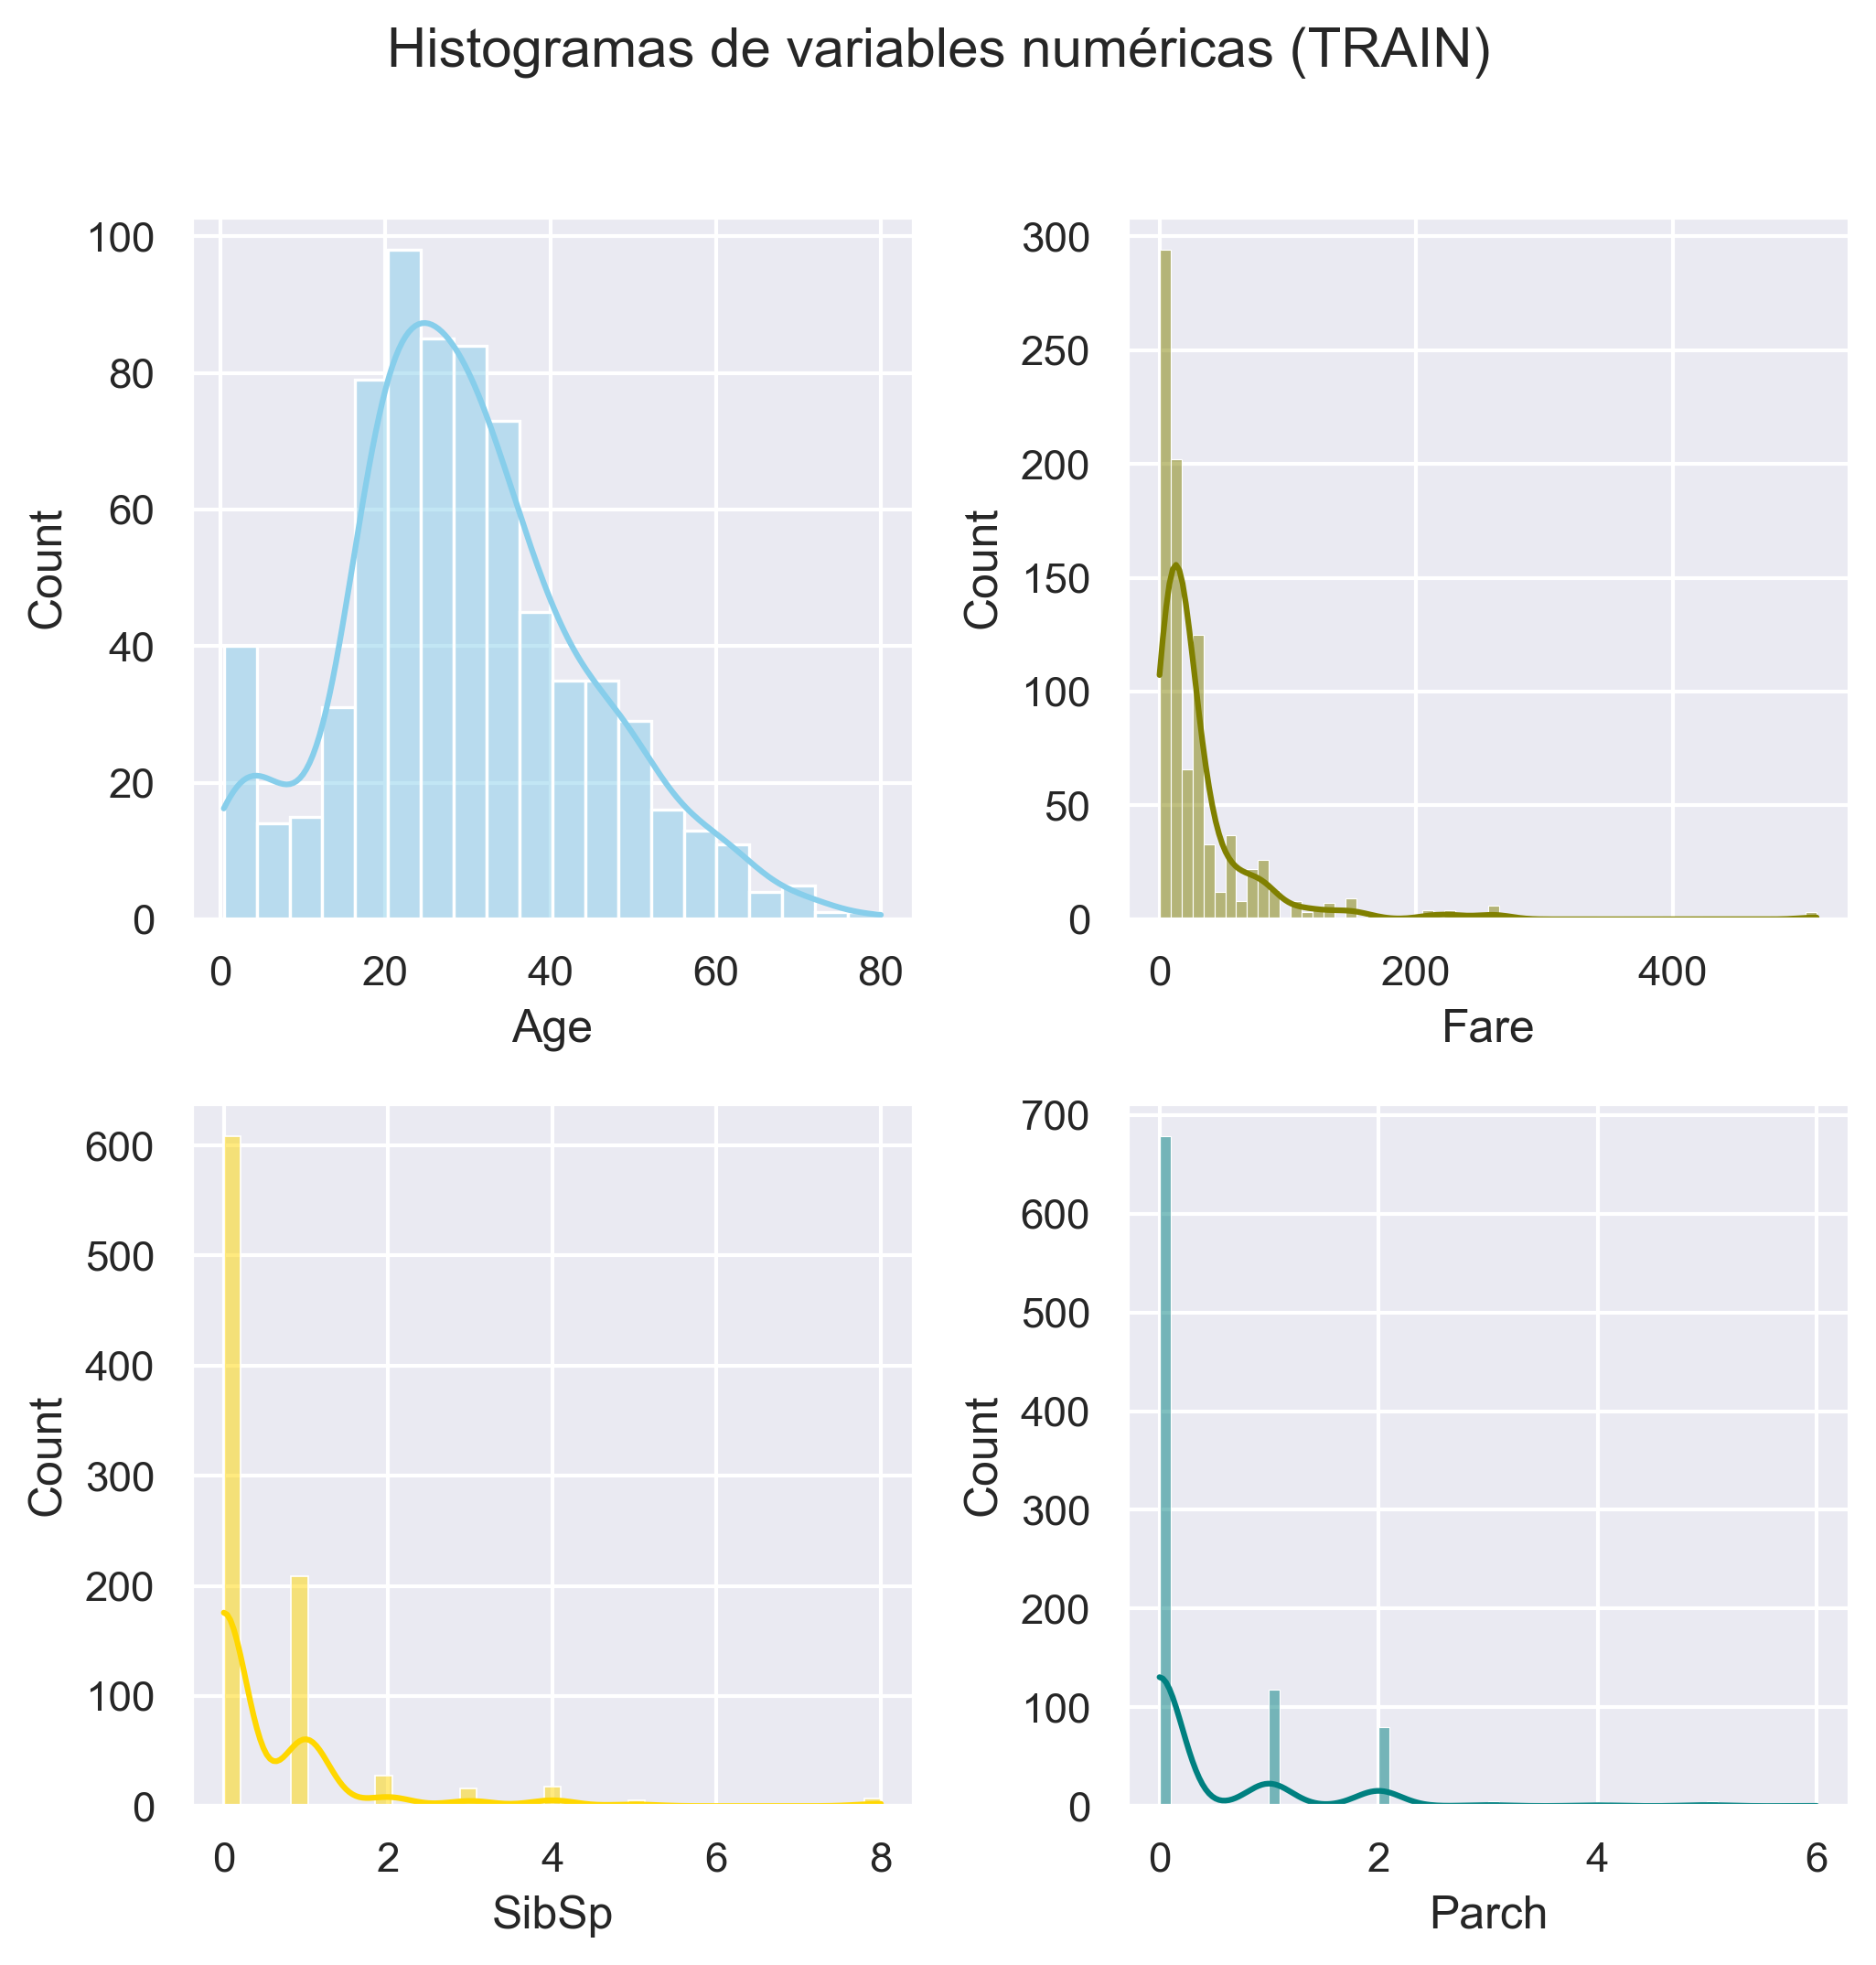

En el conjunto TRAIN se observa que la mayoría de los pasajeros tenía entre 20 y 40 años.
Las tarifas se concentran en valores bajos, lo que refleja la prevalencia de pasajeros de tercera clase.
La mayoría viajaba con pocos o ningún familiar, lo que se ve en los valores cercanos a cero en SibSp y Parch.


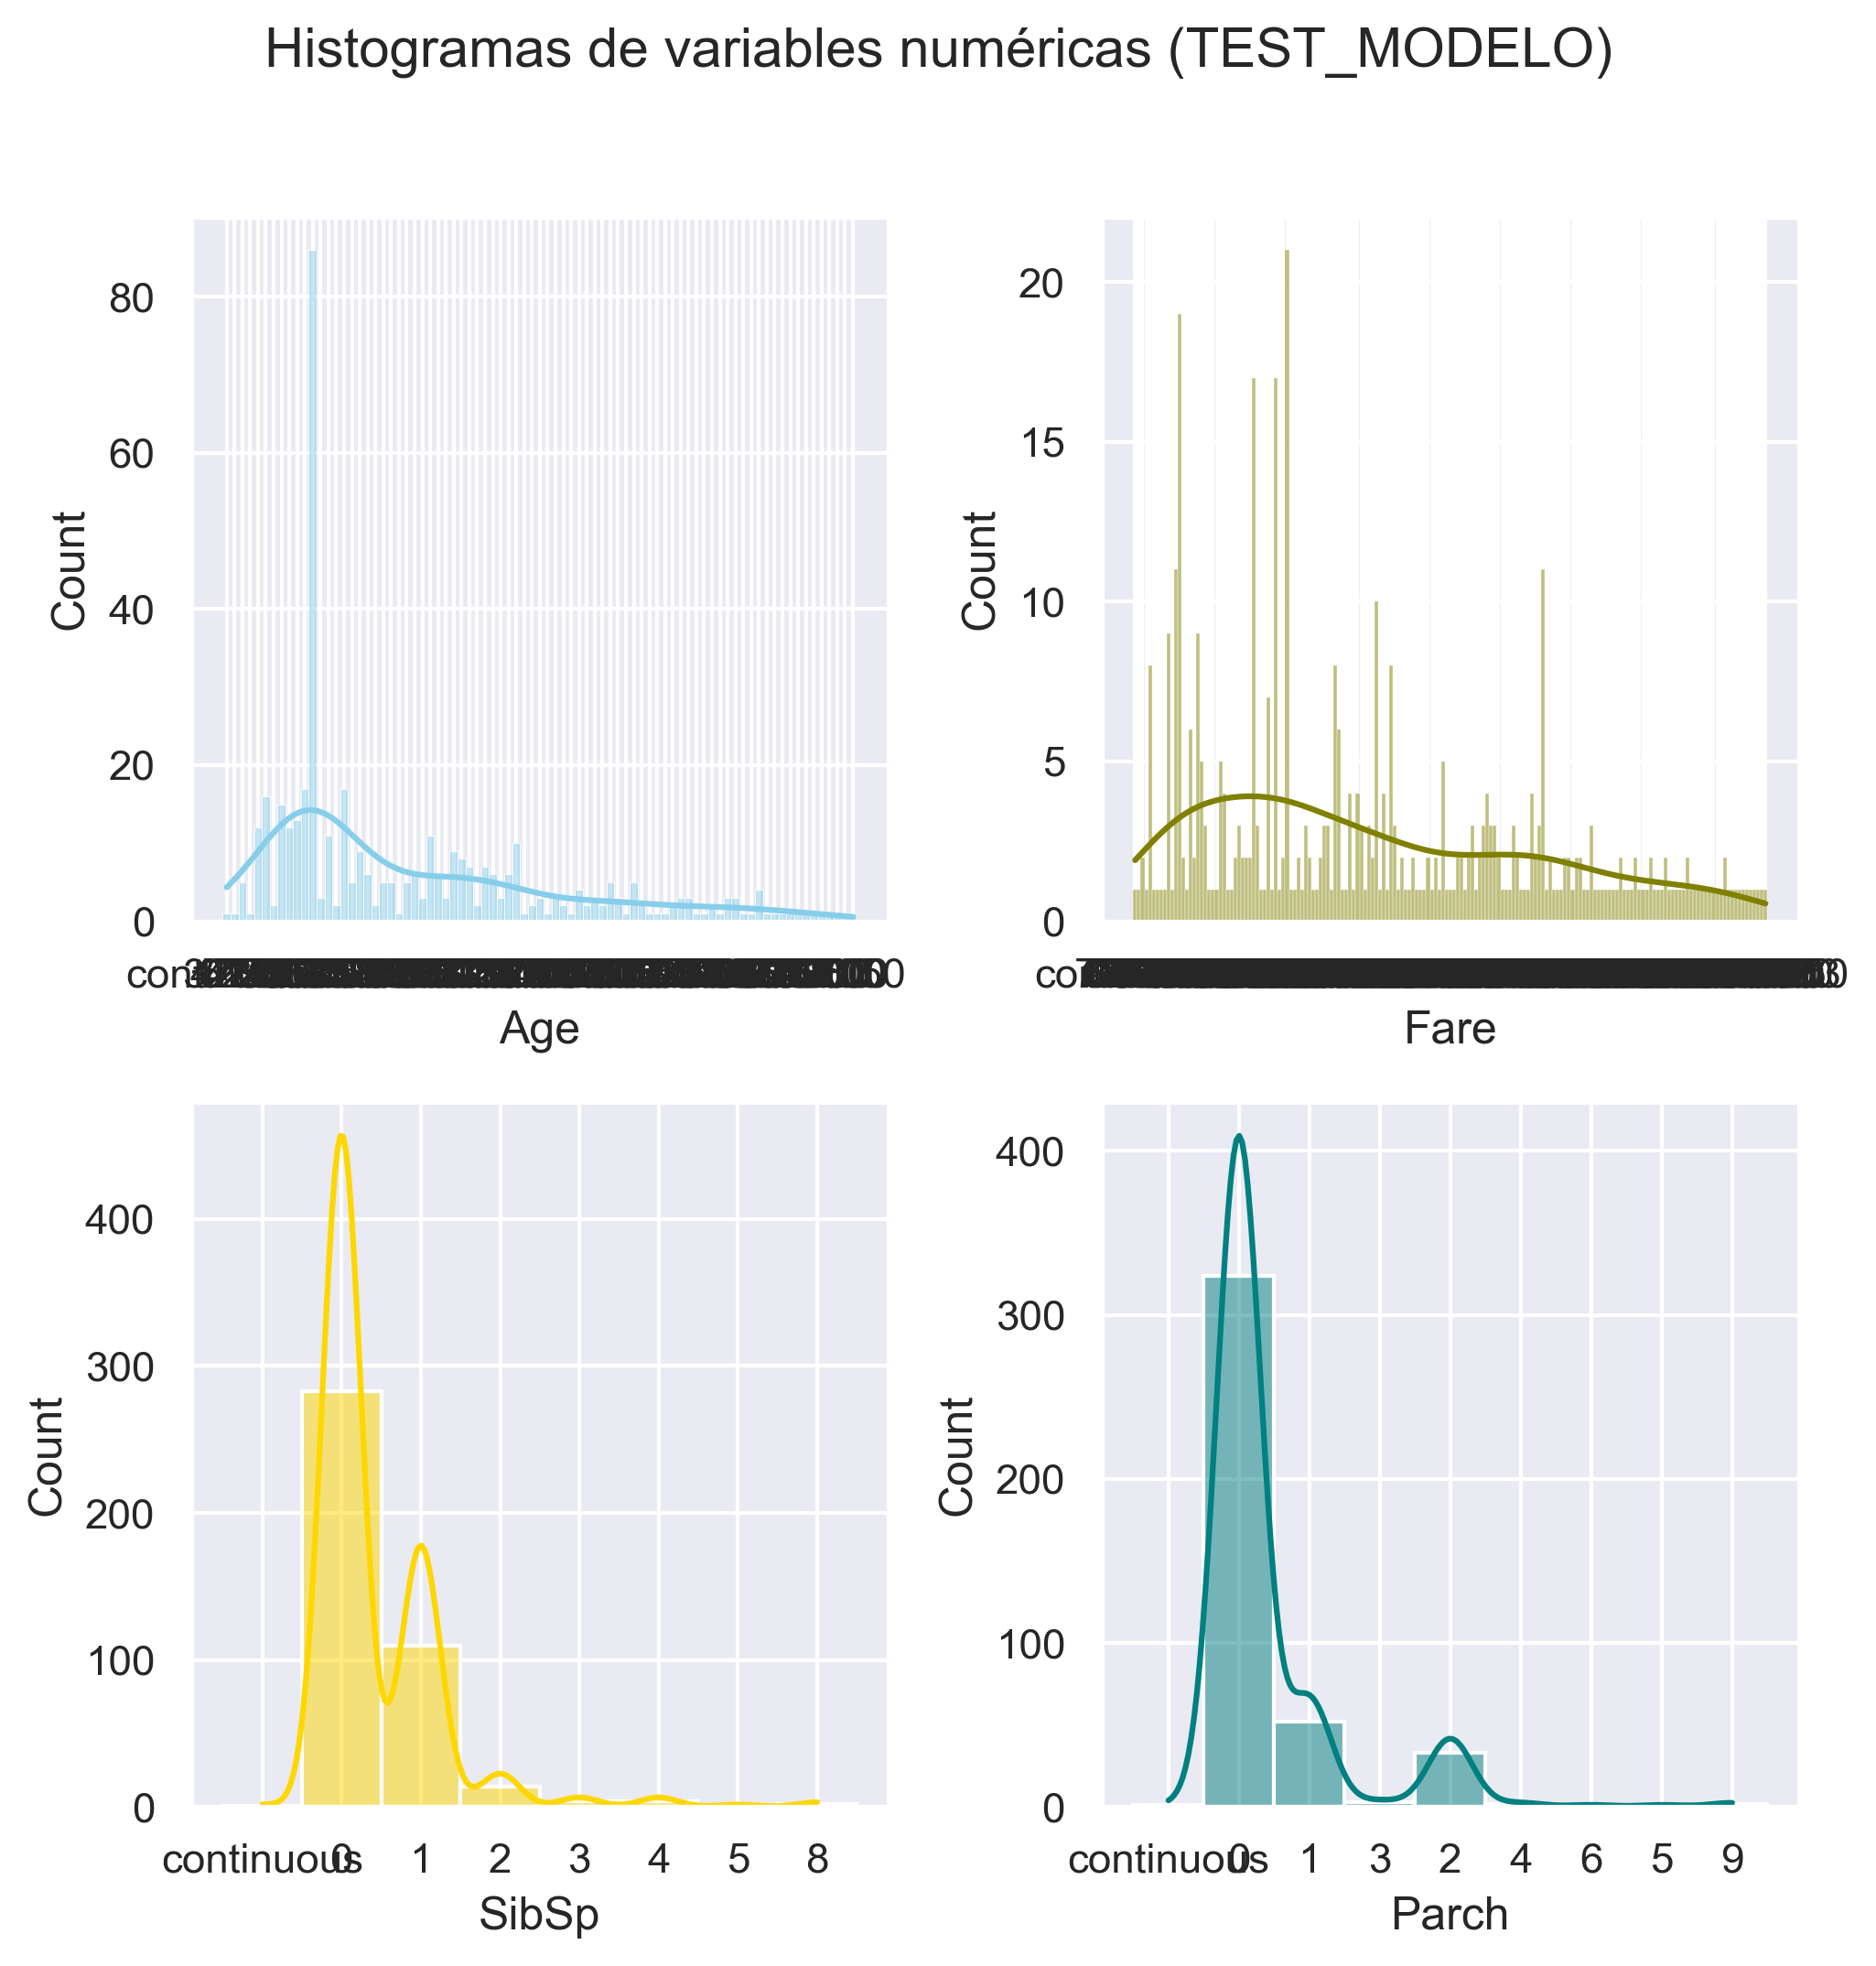

En el conjunto TEST_MODELO las distribuciones siguen un patrón similar al de TRAIN,
aunque se observan ligeras diferencias en la variable Fare, con algunos valores más altos,
posiblemente asociados a pasajeros de clases más altas o con cabinas individuales.


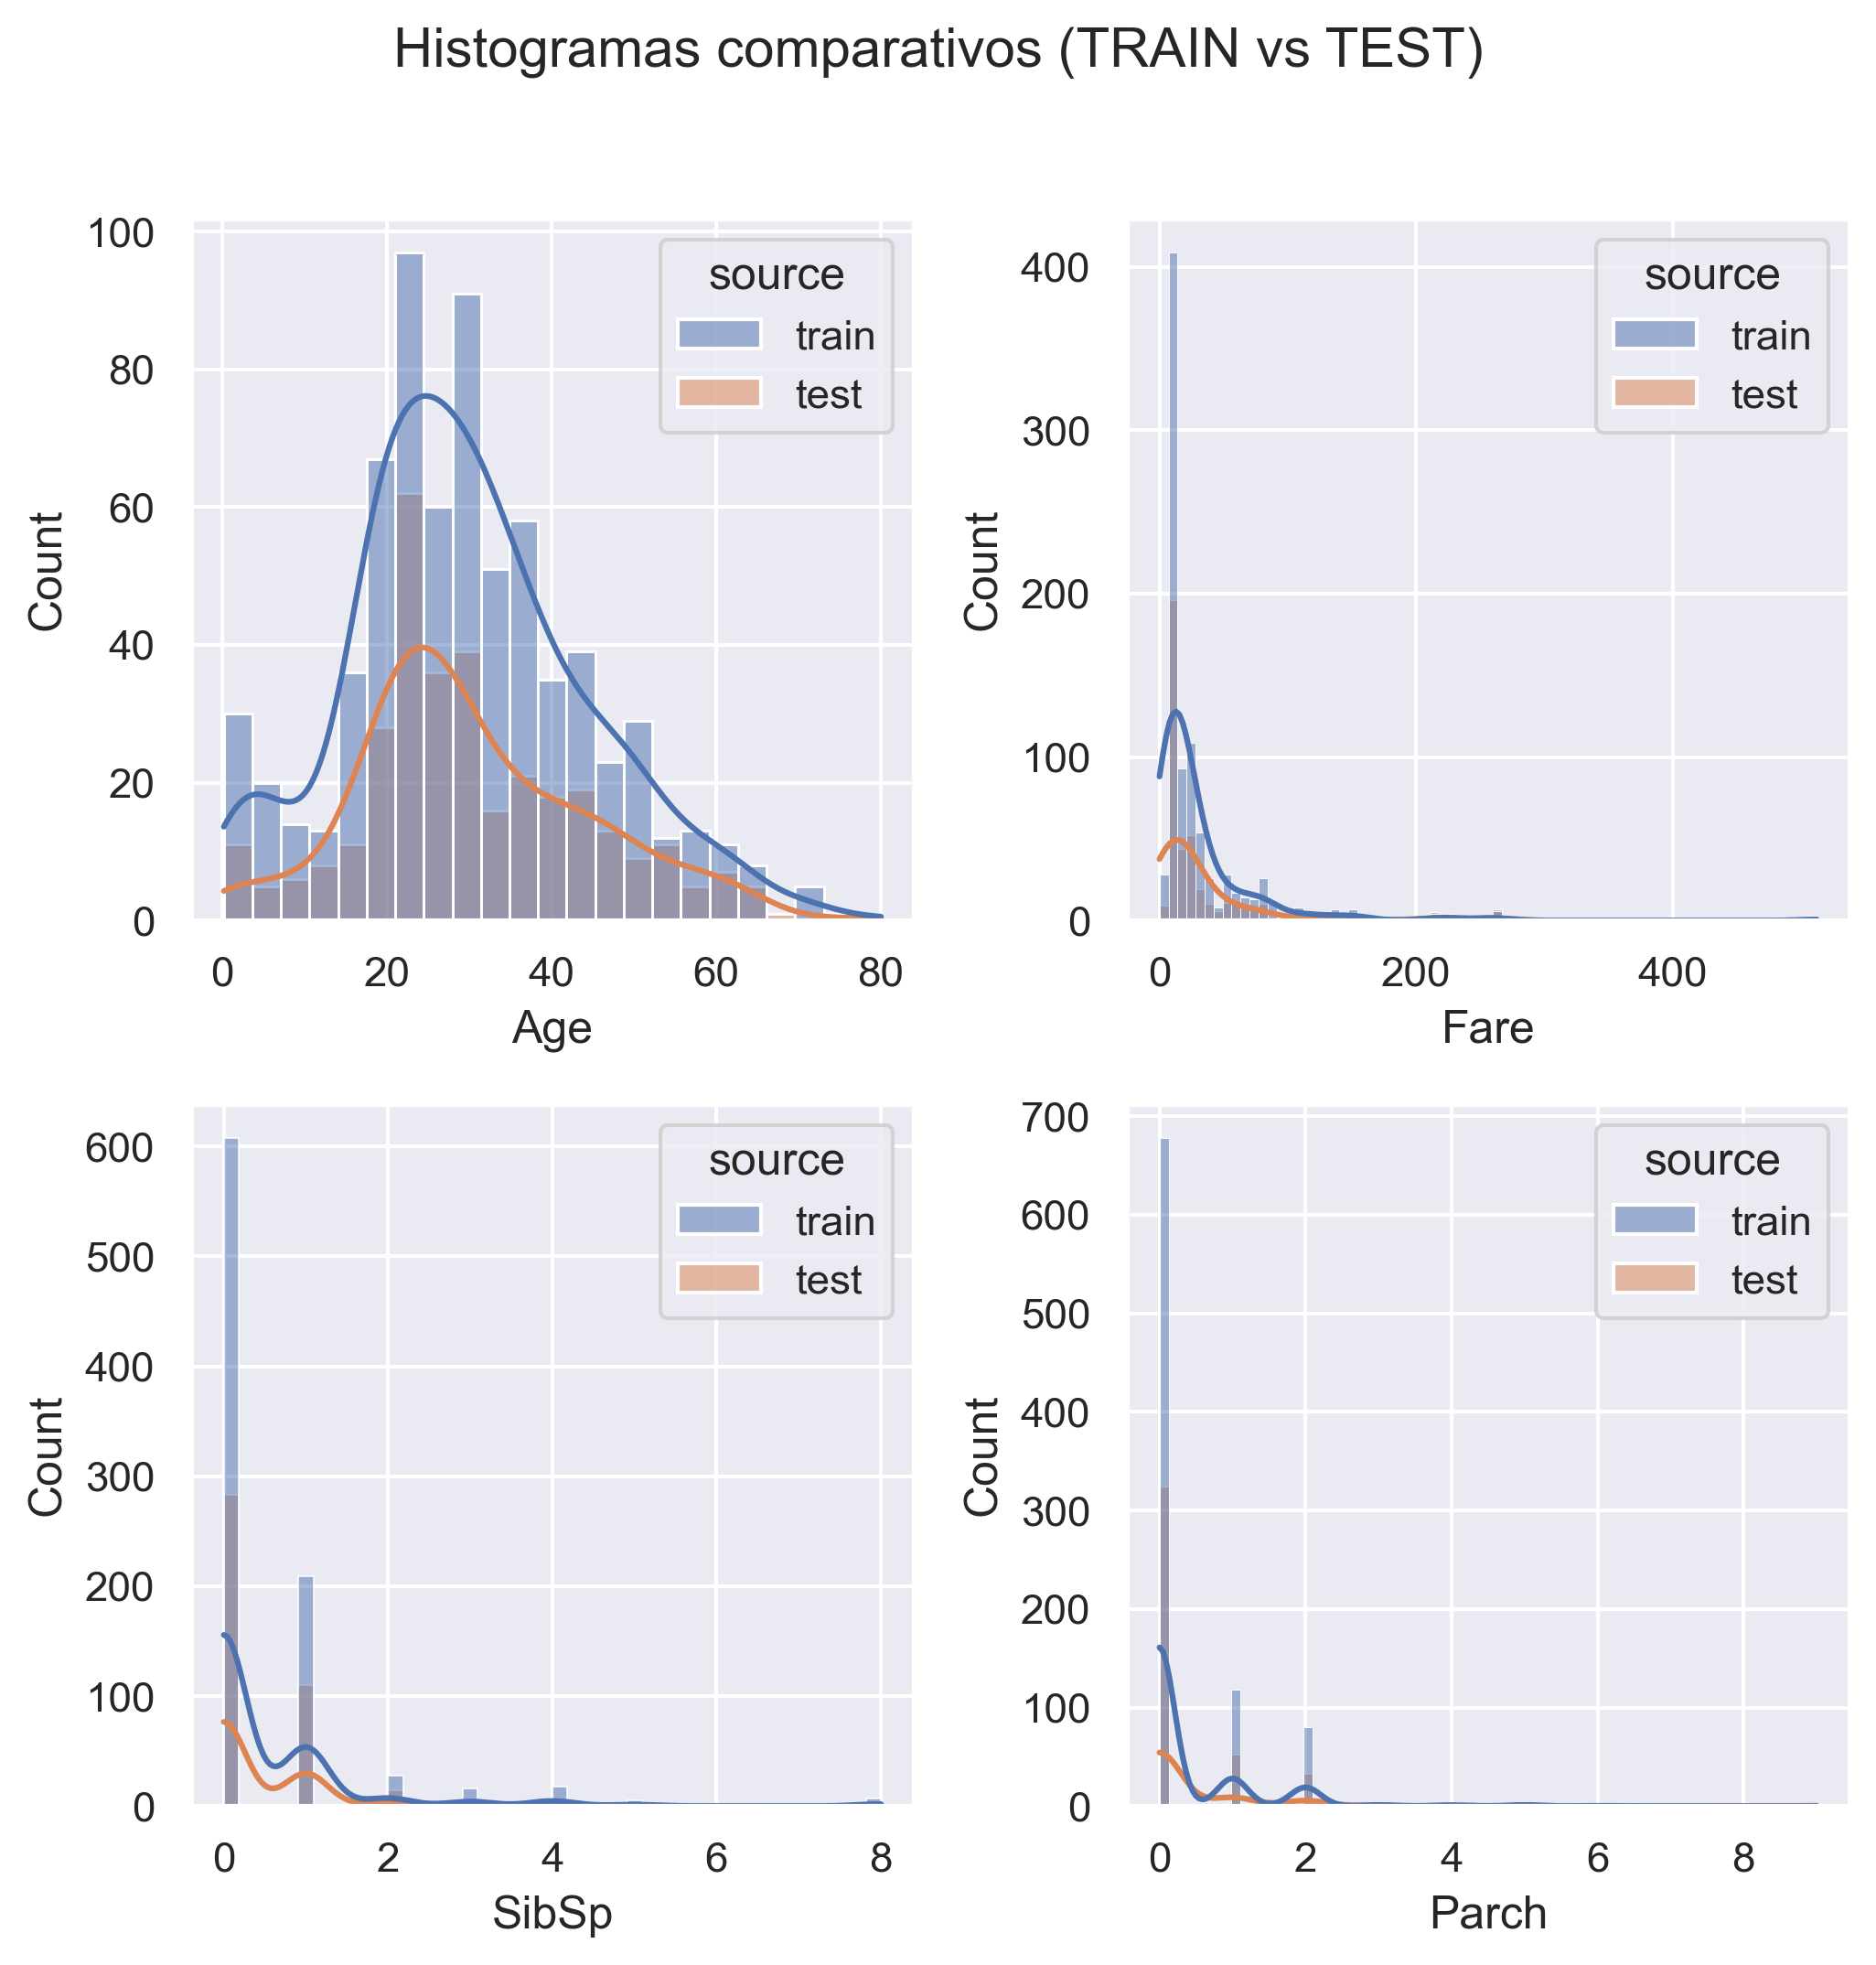

La comparación entre TRAIN y TEST muestra que ambos conjuntos presentan una estructura similar,
lo cual indica coherencia entre los datos de entrenamiento y de prueba.
Las diferencias más marcadas se aprecian en la variable Fare, mientras que SibSp y Parch
confirman que la mayoría de los pasajeros viajaba sola o con pocos familiares.


In [11]:
test = pd.read_csv("../data/raw/test.csv")
test_modelo = pd.read_csv("../data/raw/test_modelo.csv")
train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=train, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=train, x="Fare", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=train, x="SibSp", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=train, x="Parch", kde=True, color="teal", ax=axs[1, 1])
fig.suptitle("Histogramas de variables numéricas (TRAIN)", y=1.02)
plt.tight_layout()
plt.show()

print("En el conjunto TRAIN se observa que la mayoría de los pasajeros tenía entre 20 y 40 años.")
print("Las tarifas se concentran en valores bajos, lo que refleja la prevalencia de pasajeros de tercera clase.")
print("La mayoría viajaba con pocos o ningún familiar, lo que se ve en los valores cercanos a cero en SibSp y Parch.")

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=test_modelo, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=test_modelo, x="Fare", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=test_modelo, x="SibSp", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=test_modelo, x="Parch", kde=True, color="teal", ax=axs[1, 1])
fig.suptitle("Histogramas de variables numéricas (TEST_MODELO)", y=1.02)
plt.tight_layout()
plt.show()

print("En el conjunto TEST_MODELO las distribuciones siguen un patrón similar al de TRAIN,")
print("aunque se observan ligeras diferencias en la variable Fare, con algunos valores más altos,")
print("posiblemente asociados a pasajeros de clases más altas o con cabinas individuales.")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=ambos, x="Age", kde=True, hue="source", ax=axs[0, 0])
sns.histplot(data=ambos, x="Fare", kde=True, hue="source", ax=axs[0, 1])
sns.histplot(data=ambos, x="SibSp", kde=True, hue="source", ax=axs[1, 0])
sns.histplot(data=ambos, x="Parch", kde=True, hue="source", ax=axs[1, 1])
fig.suptitle("Histogramas comparativos (TRAIN vs TEST)", y=1.02)
plt.tight_layout()
plt.show()

print("La comparación entre TRAIN y TEST muestra que ambos conjuntos presentan una estructura similar,")
print("lo cual indica coherencia entre los datos de entrenamiento y de prueba.")
print("Las diferencias más marcadas se aprecian en la variable Fare, mientras que SibSp y Parch")
print("confirman que la mayoría de los pasajeros viajaba sola o con pocos familiares.")

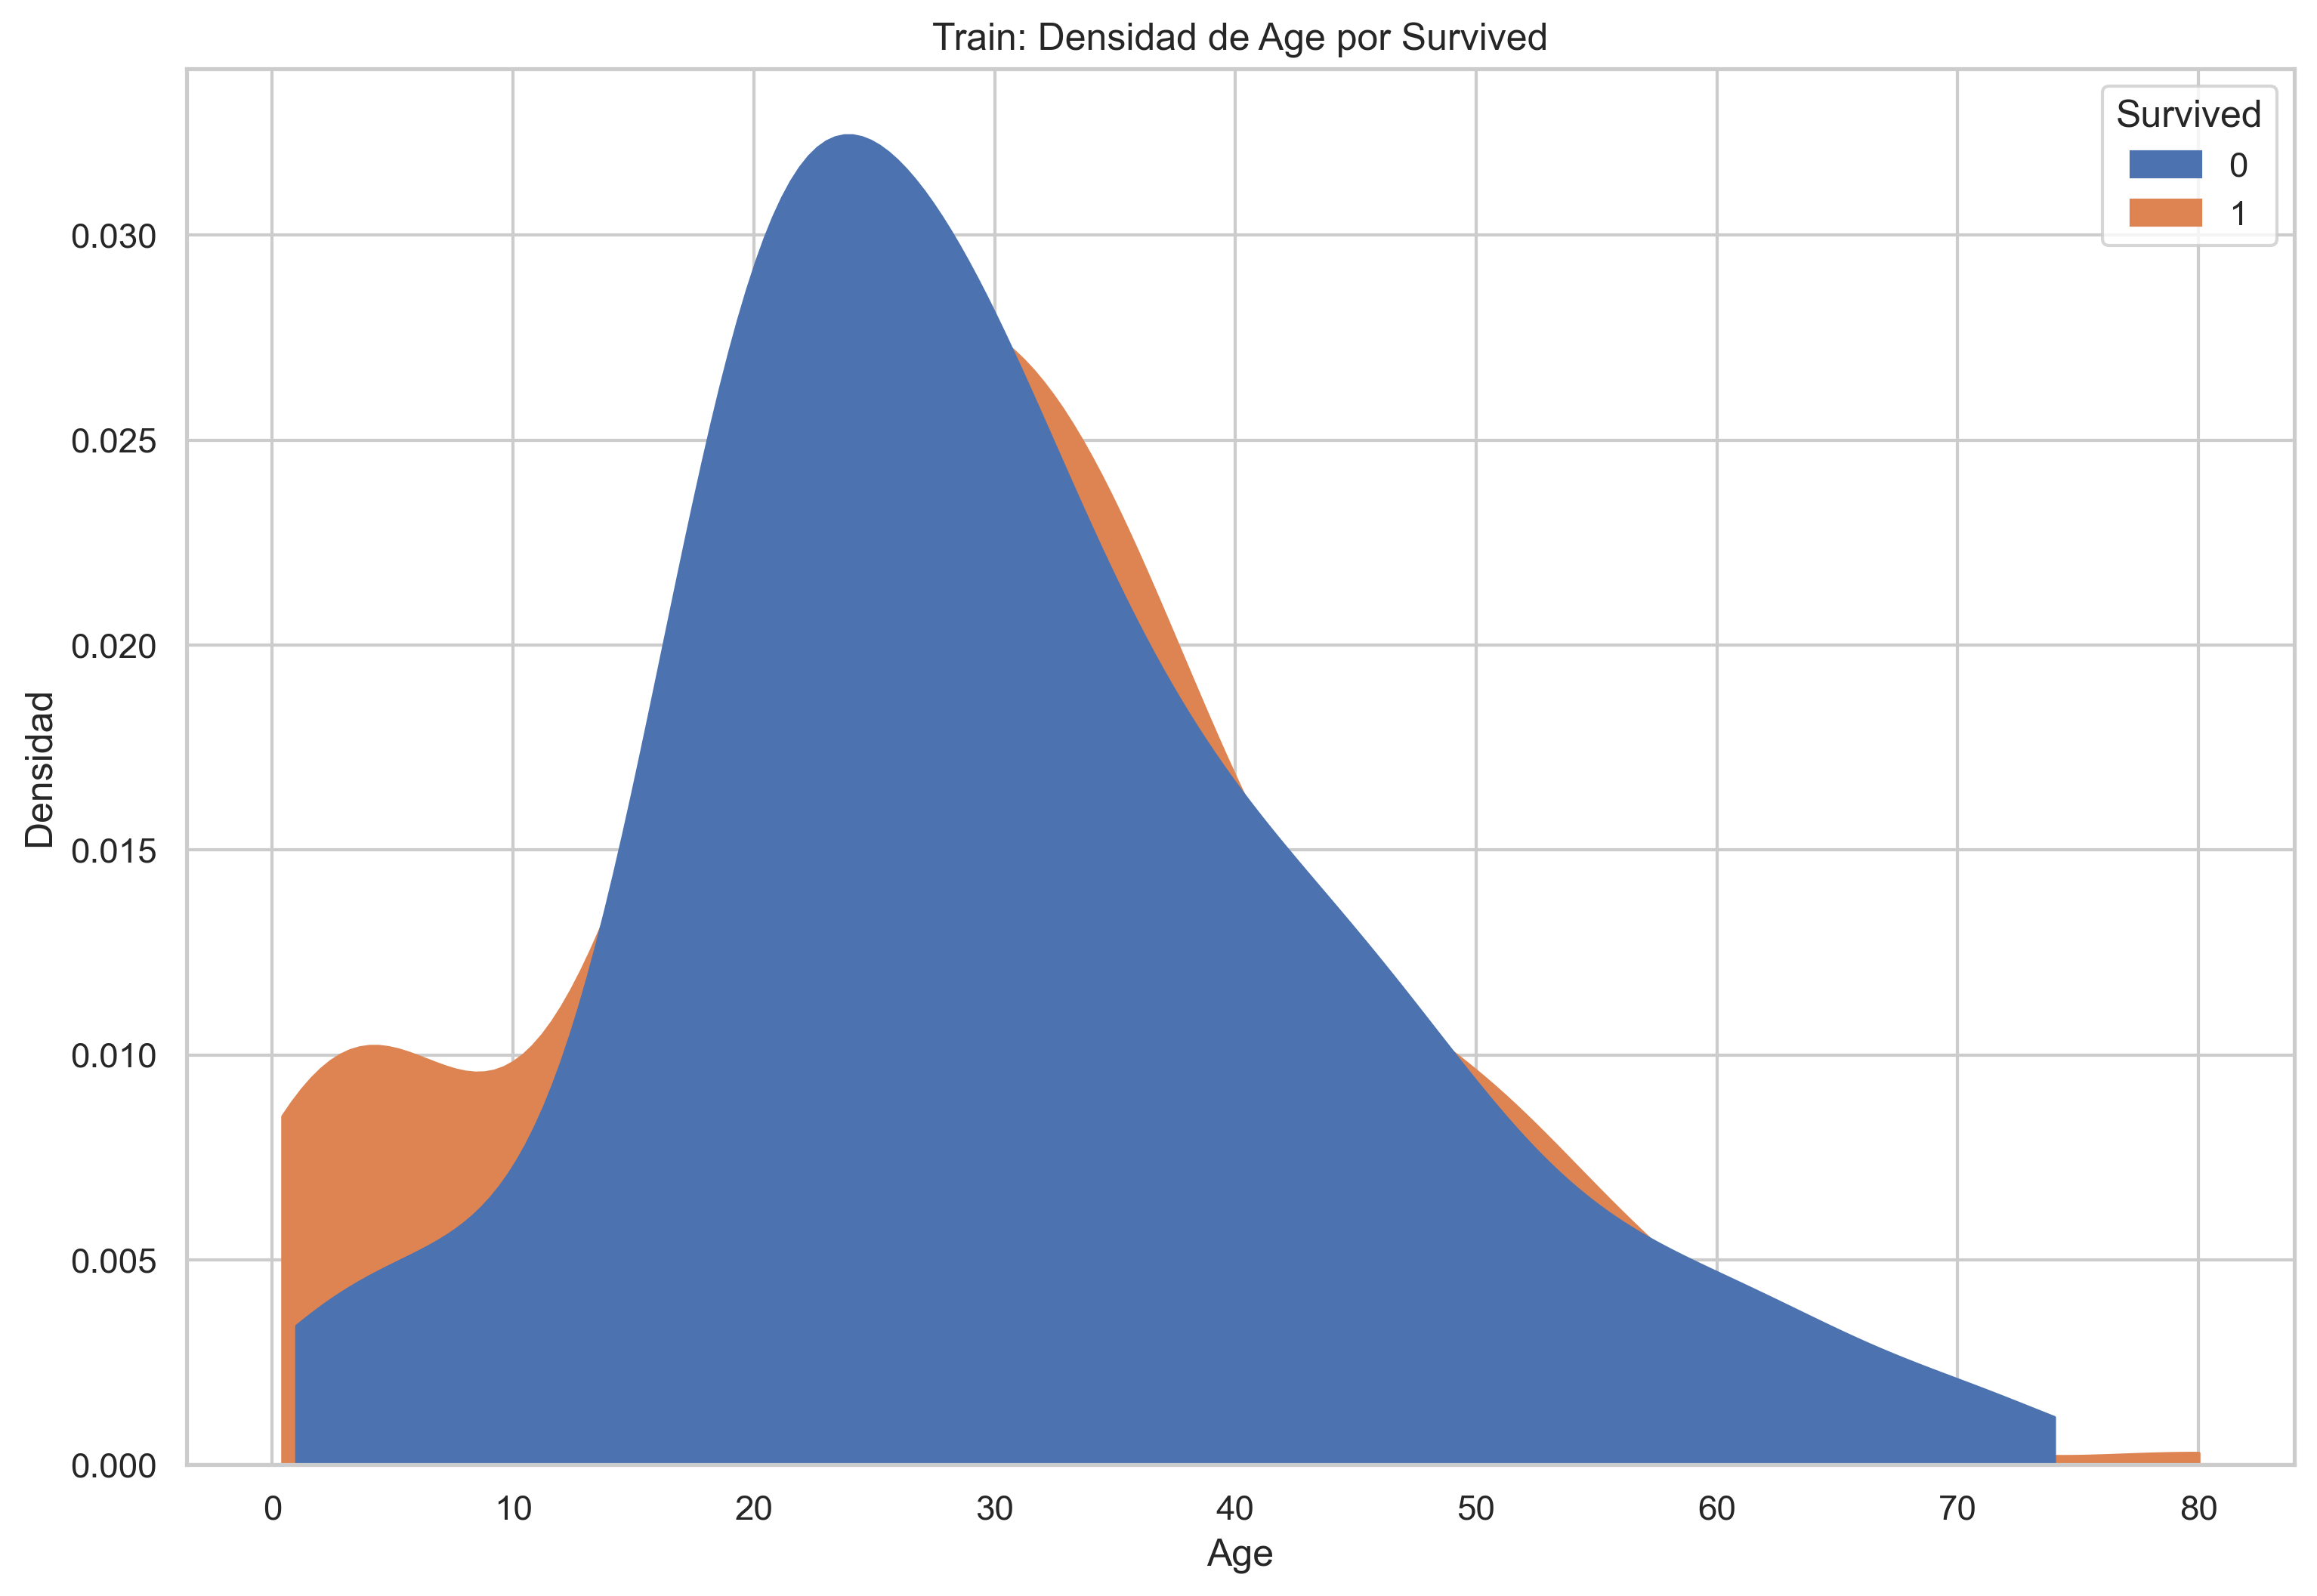

En TRAIN (Age), la densidad suele concentrarse en edades adultas, con diferencias claras entre quienes sobrevivieron y quienes no.


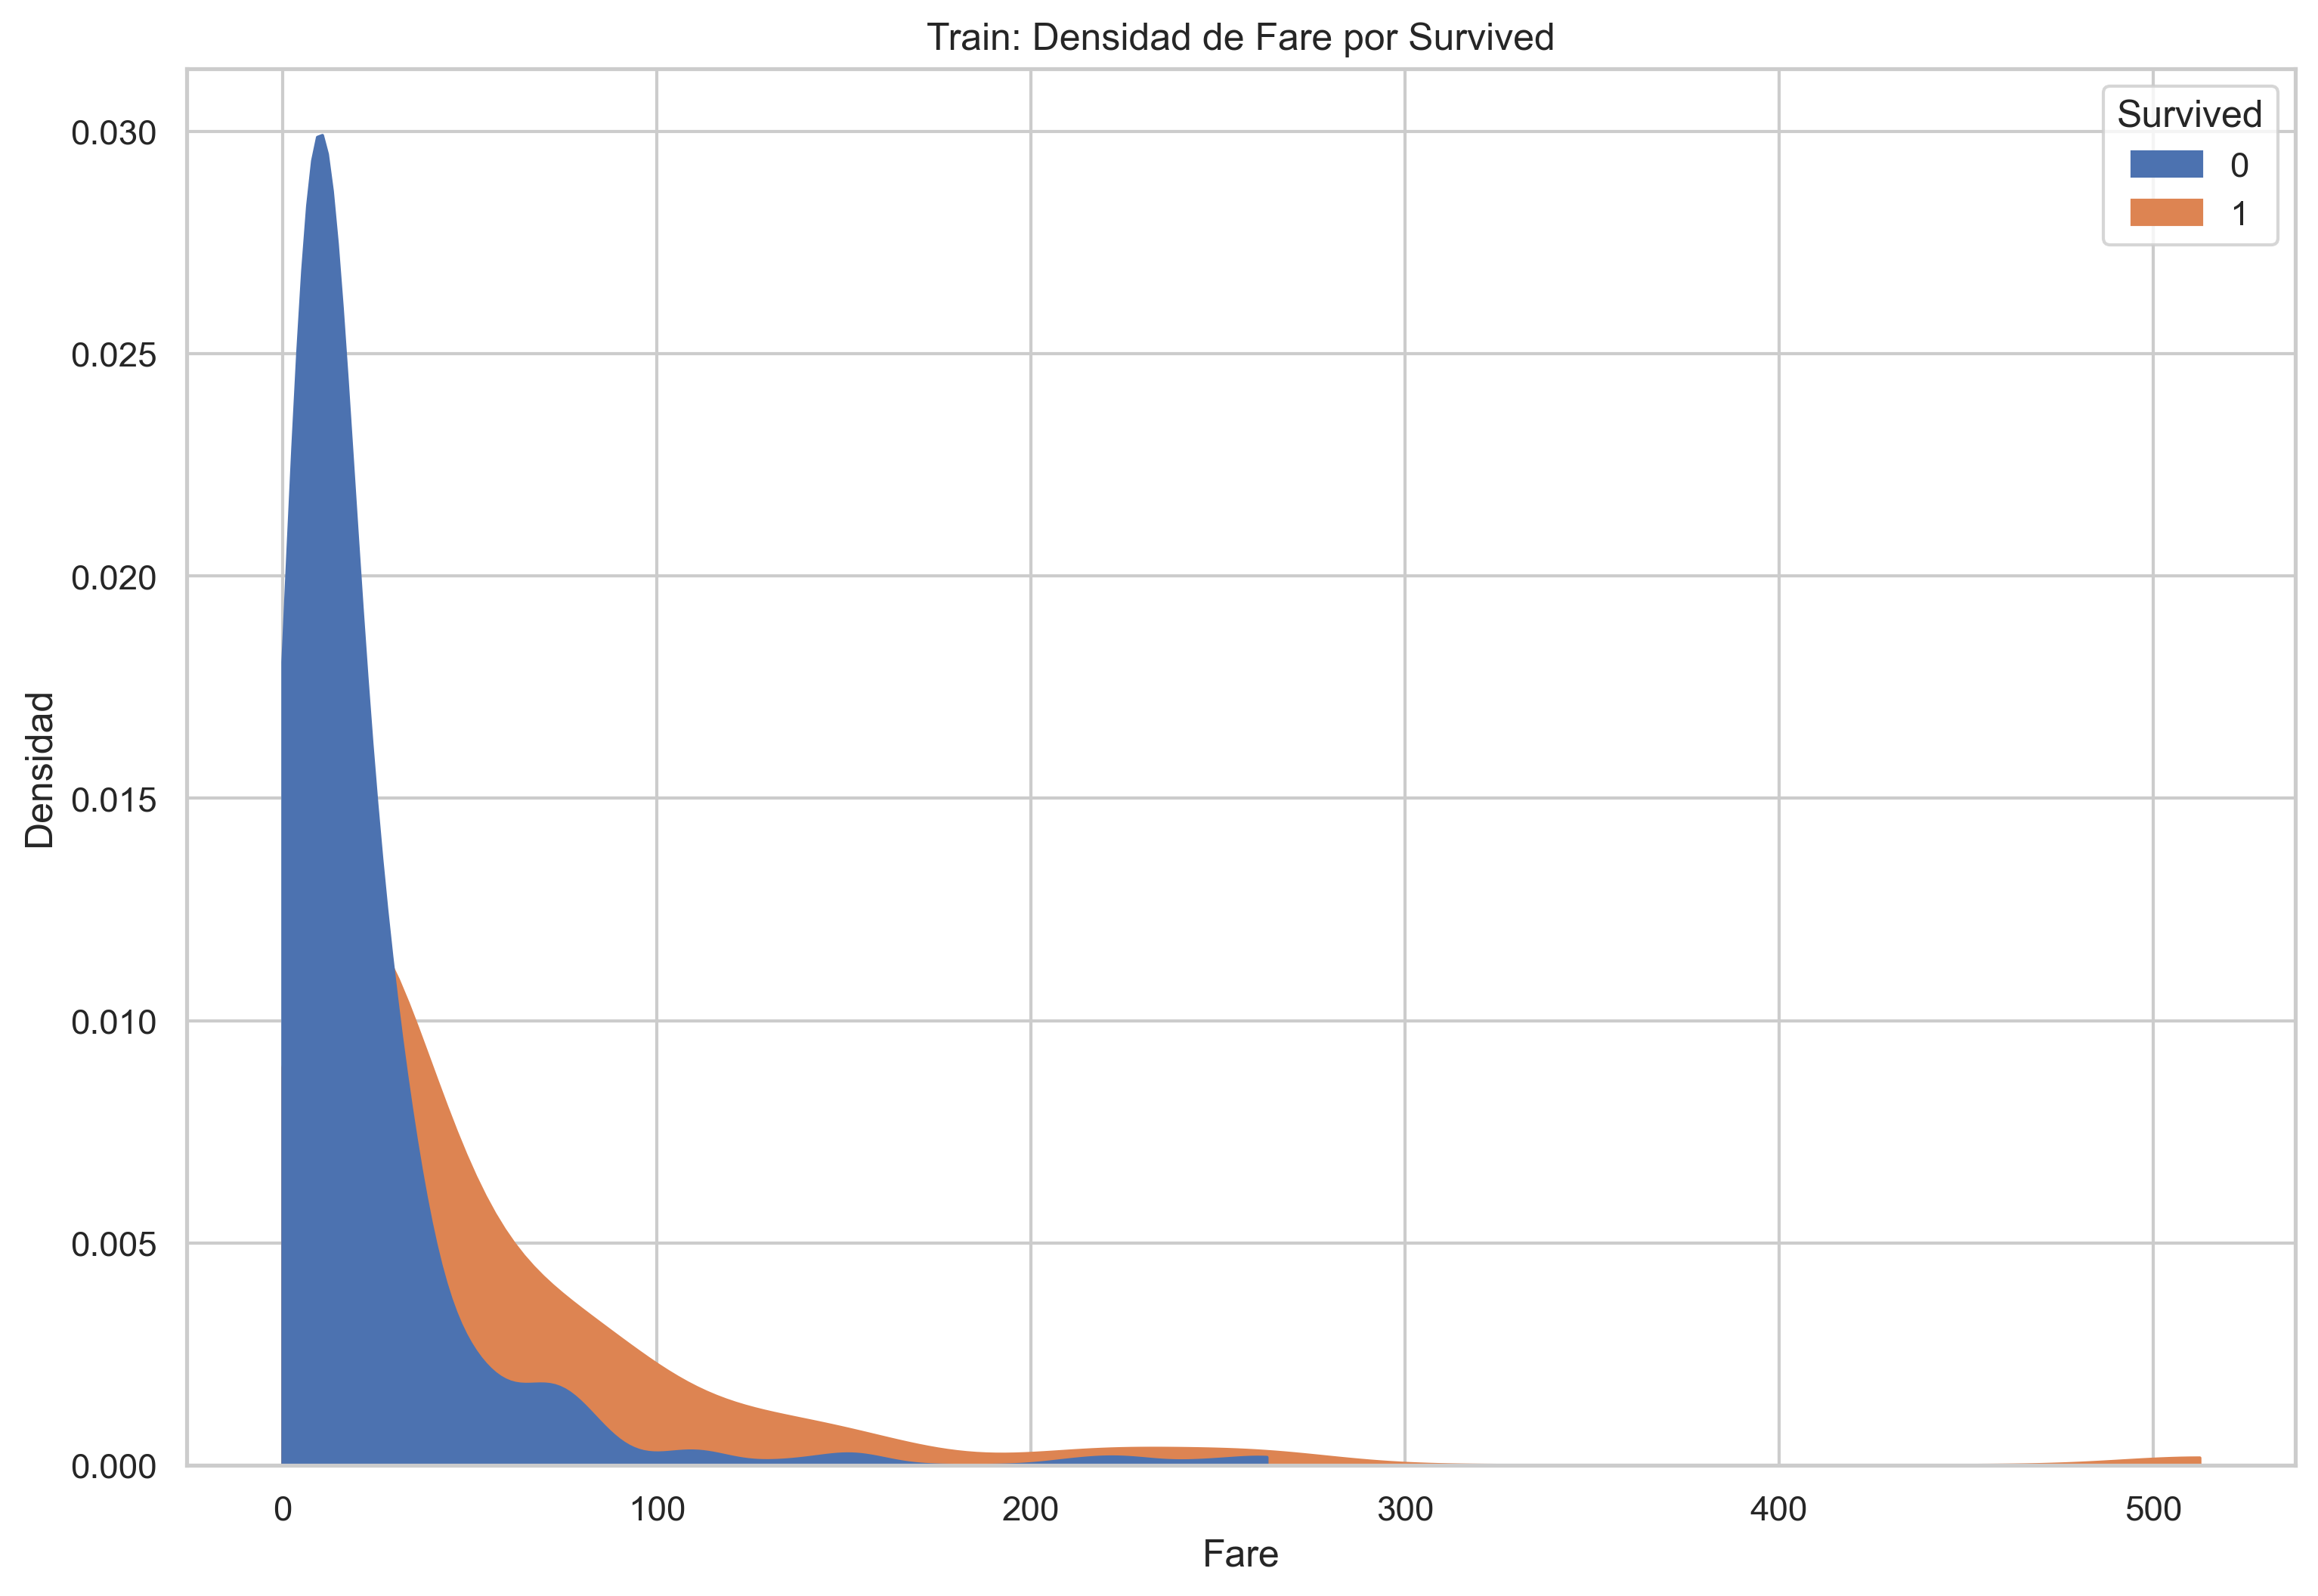

En TRAIN (Fare), la mayor parte de tarifas se ubica en valores bajos, y las tarifas altas se asocian con mayor probabilidad de supervivencia.
En TEST_MODELO (Age), la distribución de edades mantiene un patrón similar al de TRAIN, con predominio de edades adultas.
En TEST_MODELO (Fare), se observan muchas tarifas bajas y una cola hacia valores altos, coherente con la mezcla de clases.


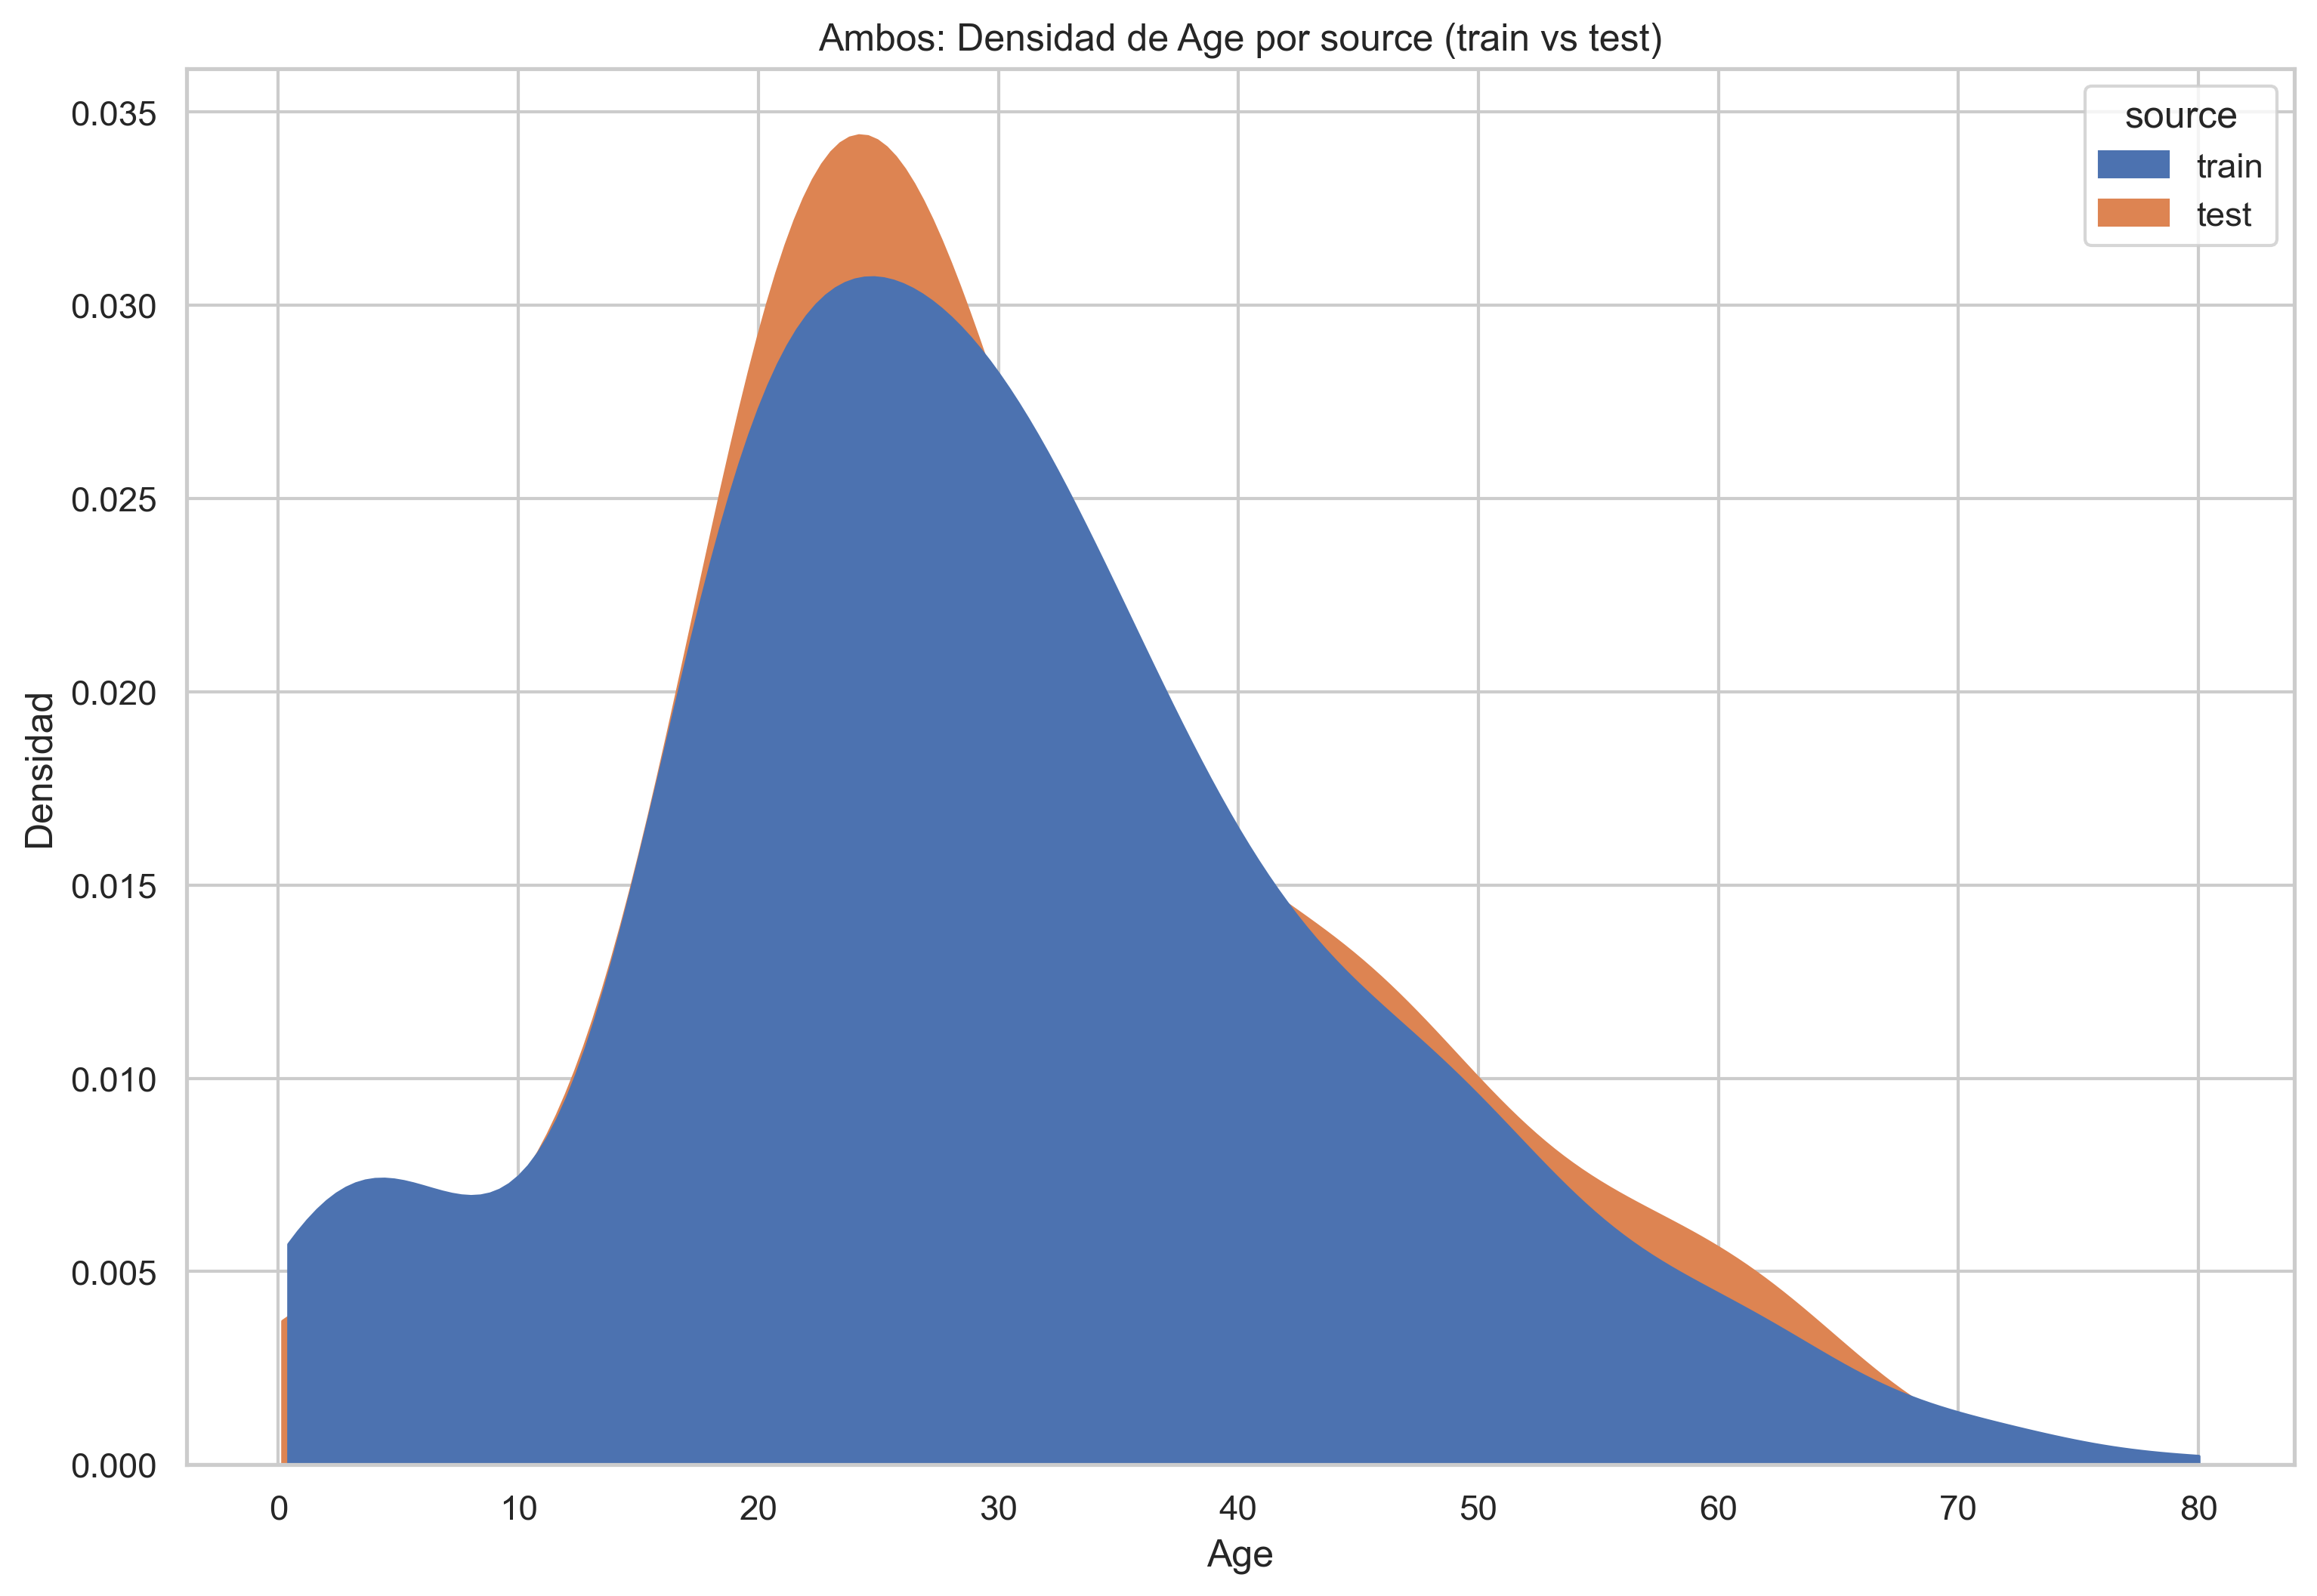

Comparando TRAIN vs TEST (Age), ambas fuentes muestran perfiles muy próximos, lo que sugiere buena consistencia entre conjuntos.


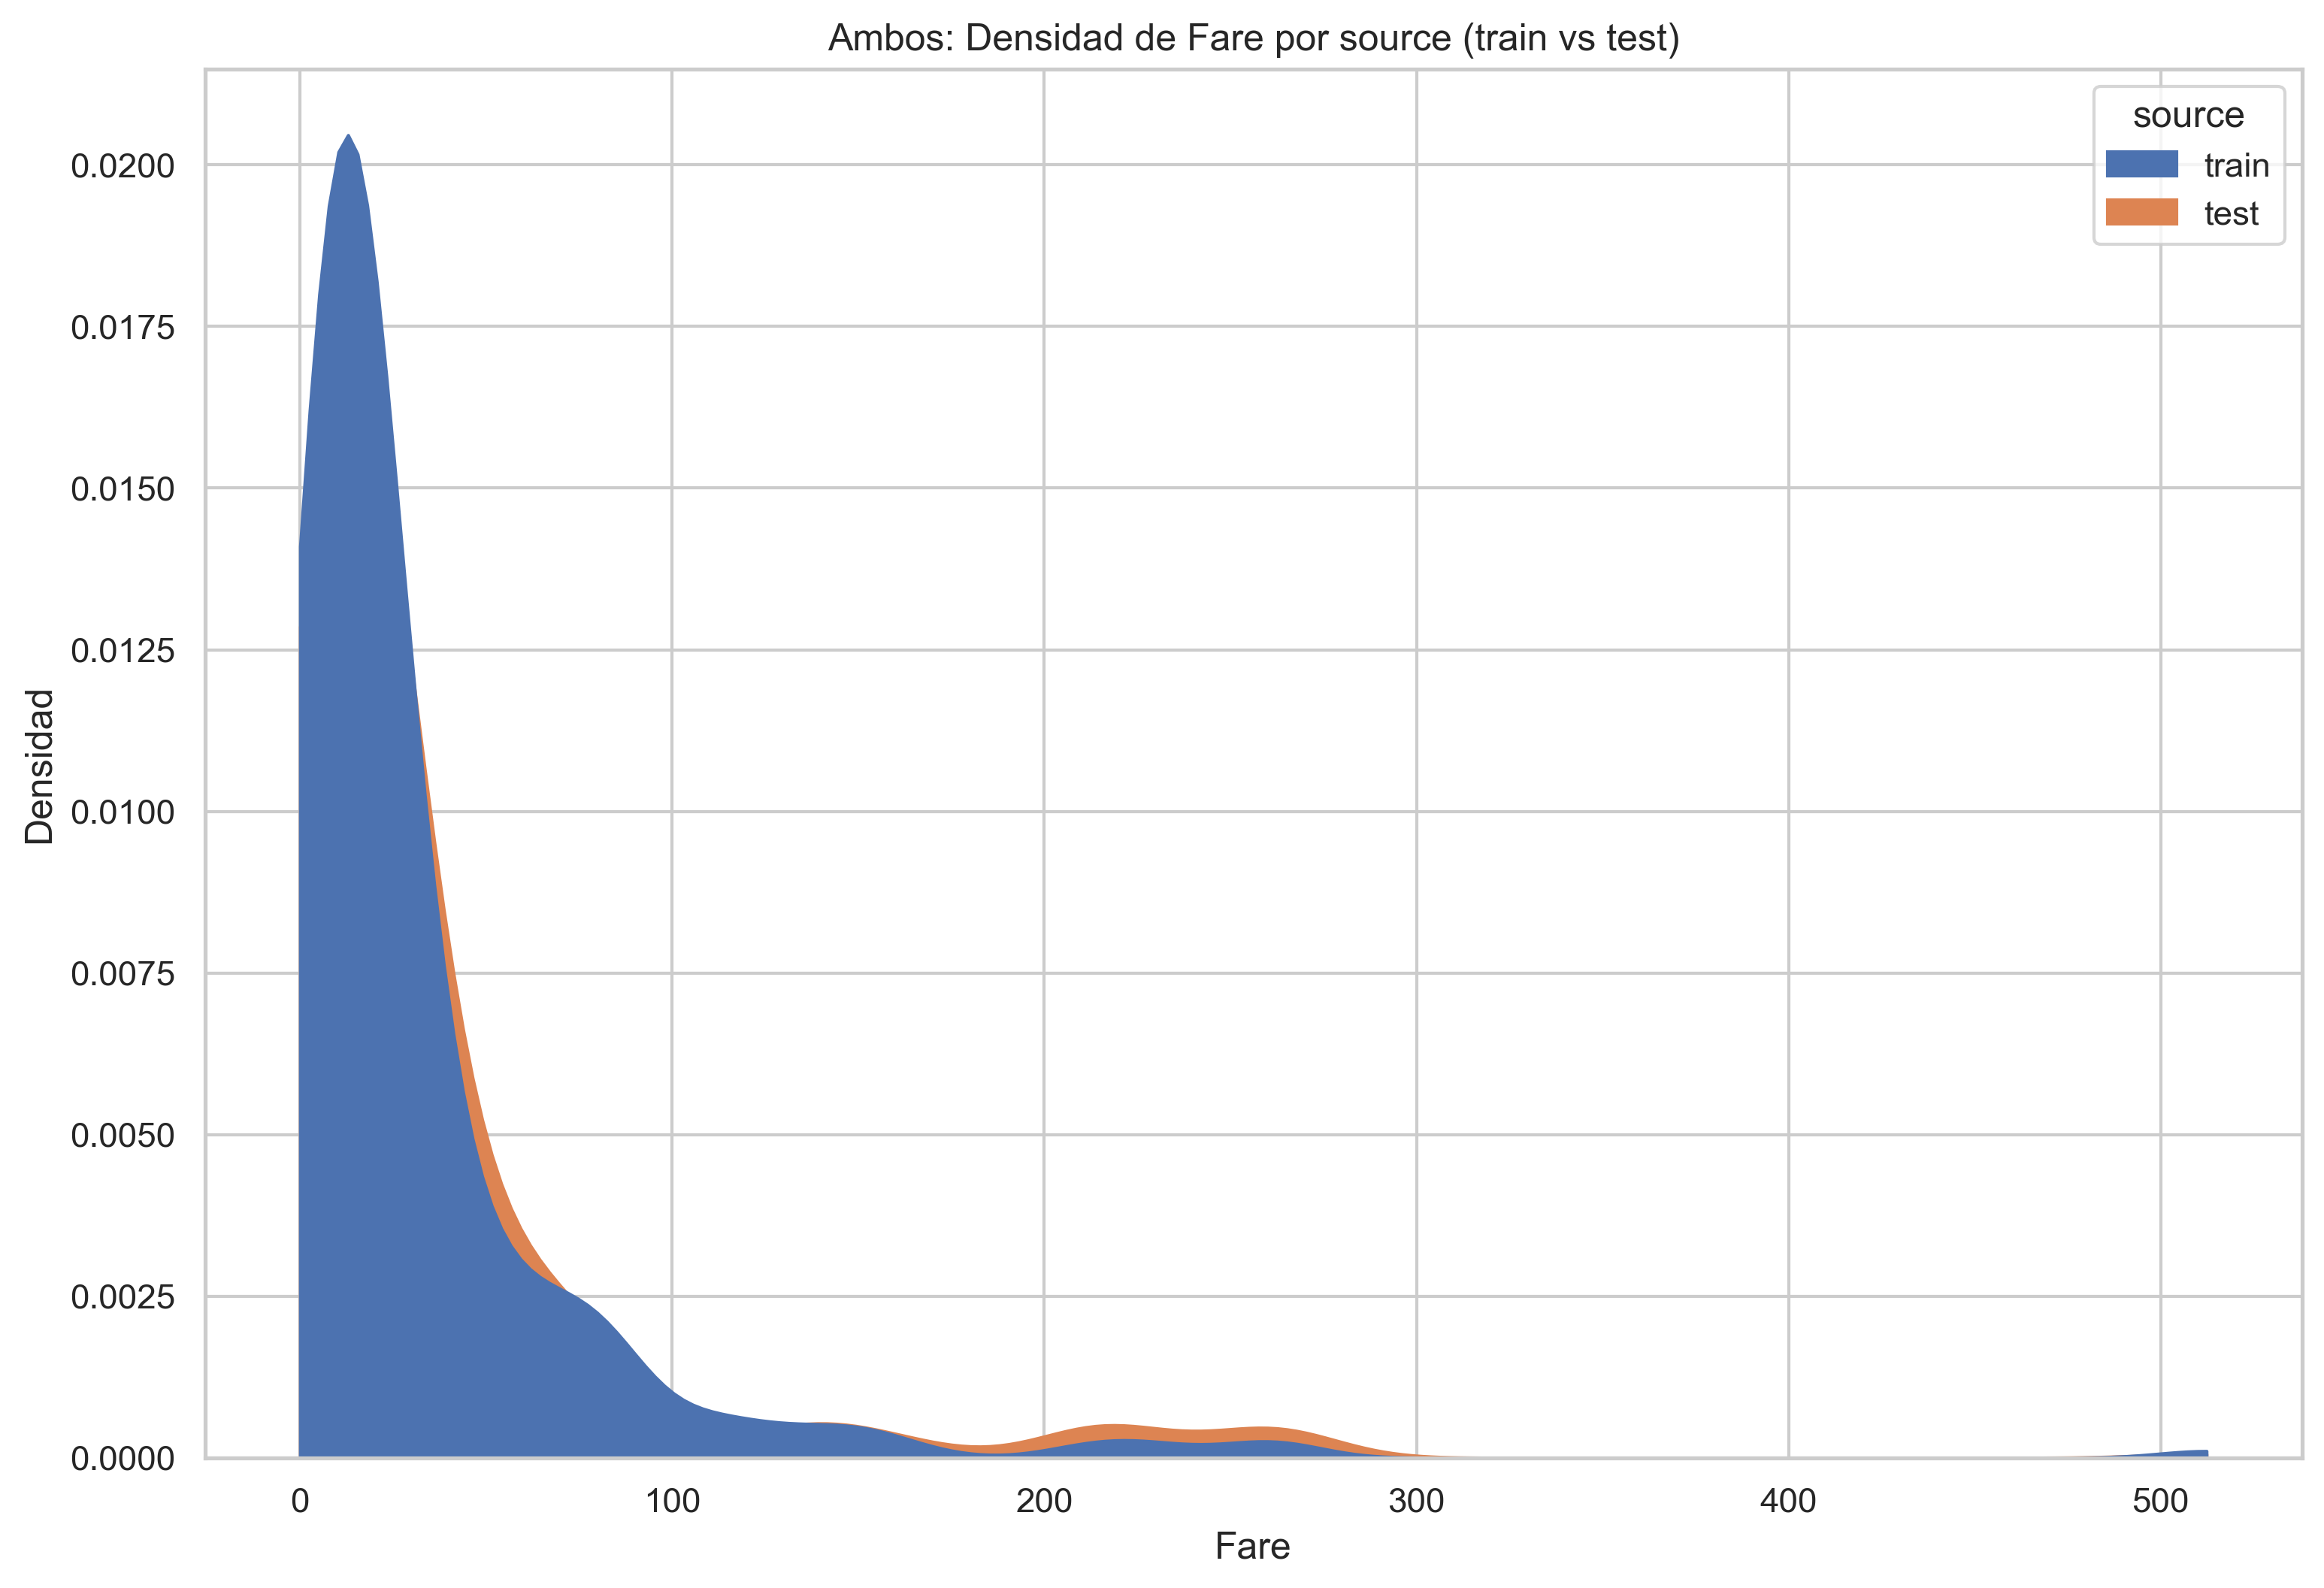

Comparando TRAIN vs TEST (Fare), las distribuciones son similares; ligeras diferencias en la cola alta pueden reflejar composición de clases distinta.


In [12]:


def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def kde1d(df, x, hue=None, title=""):
    if x not in df.columns:
        return
    dfx = df[[x] + ([hue] if hue and hue in df.columns else [])].dropna(subset=[x])
    if dfx.empty:
        return
    sns.kdeplot(data=dfx, x=x, hue=(hue if hue in dfx.columns else None),
                cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("Densidad")
    plt.show()

train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None
ambos = pd.concat([train, test], ignore_index=True)

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test = ensure_numeric(test, num_cols)
ambos = ensure_numeric(ambos, num_cols)

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo = test_modelo.copy()
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test_ = test.copy()
    test_["PassengerId"] = test_["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test_[["PassengerId"] + num_cols], on="PassengerId", how="left")

test_modelo = ensure_numeric(test_modelo, num_cols)

plt.rcParams["figure.figsize"] = (12, 8)
sns.set_theme(style="whitegrid")

kde1d(train, "Age", hue="Survived", title="Train: Densidad de Age por Survived")
print("En TRAIN (Age), la densidad suele concentrarse en edades adultas, con diferencias claras entre quienes sobrevivieron y quienes no.")

kde1d(train, "Fare", hue="Survived", title="Train: Densidad de Fare por Survived")
print("En TRAIN (Fare), la mayor parte de tarifas se ubica en valores bajos, y las tarifas altas se asocian con mayor probabilidad de supervivencia.")

kde1d(test_modelo, "Age", title="Test_modelo: Densidad de Age")
print("En TEST_MODELO (Age), la distribución de edades mantiene un patrón similar al de TRAIN, con predominio de edades adultas.")

kde1d(test_modelo, "Fare", title="Test_modelo: Densidad de Fare")
print("En TEST_MODELO (Fare), se observan muchas tarifas bajas y una cola hacia valores altos, coherente con la mezcla de clases.")

kde1d(ambos, "Age", hue="source", title="Ambos: Densidad de Age por source (train vs test)")
print("Comparando TRAIN vs TEST (Age), ambas fuentes muestran perfiles muy próximos, lo que sugiere buena consistencia entre conjuntos.")

kde1d(ambos, "Fare", hue="source", title="Ambos: Densidad de Fare por source (train vs test)")
print("Comparando TRAIN vs TEST (Fare), las distribuciones son similares; ligeras diferencias en la cola alta pueden reflejar composición de clases distinta.")



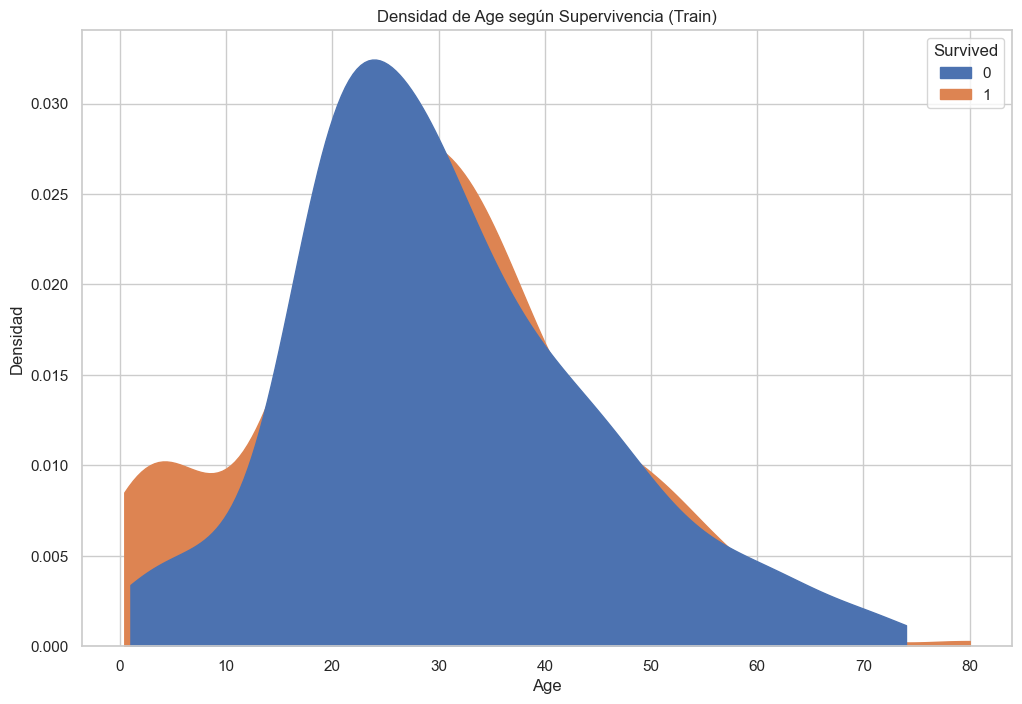

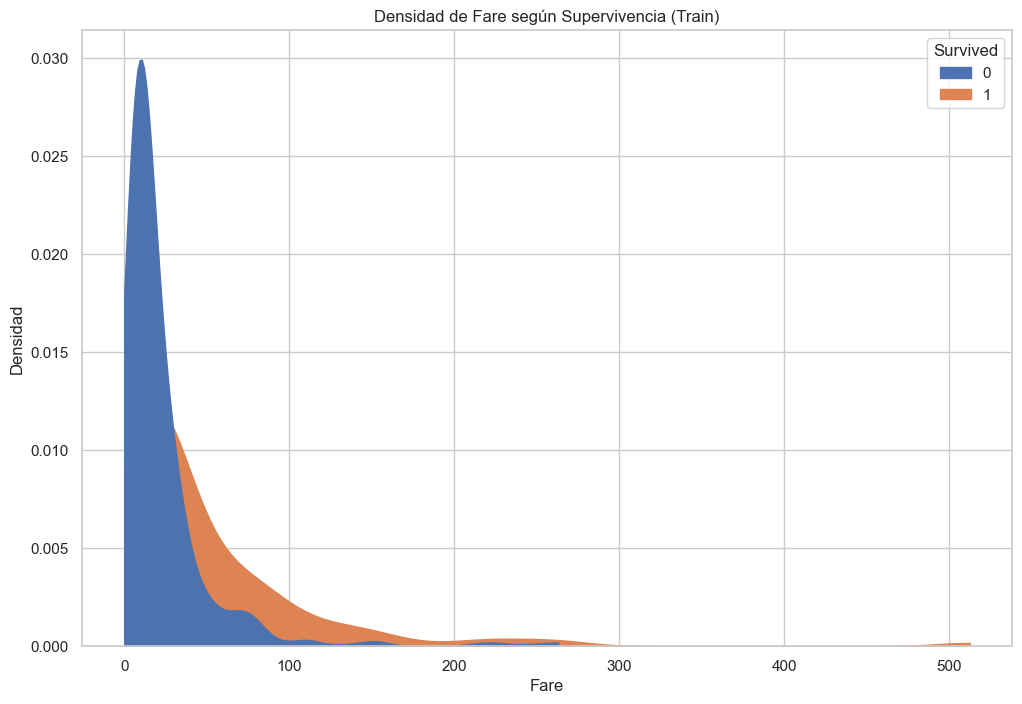

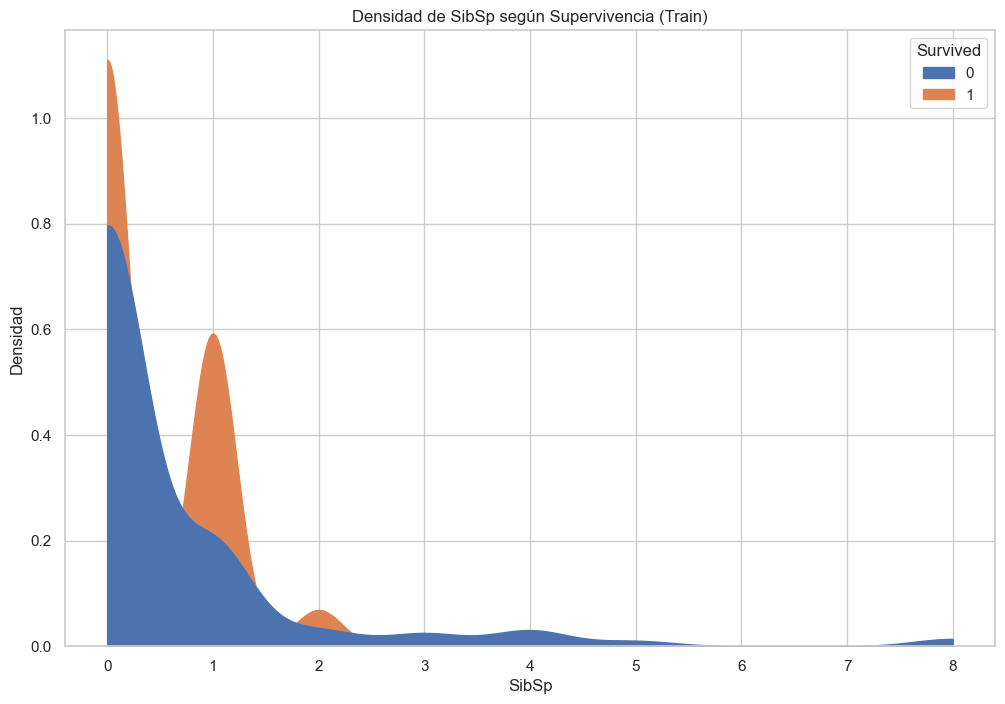

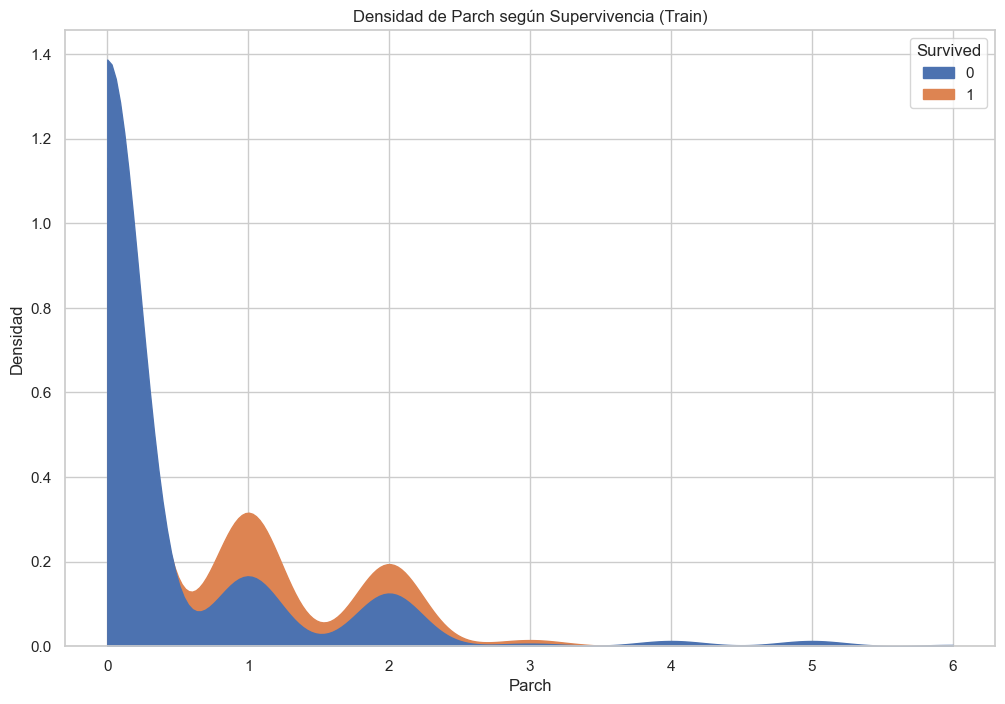

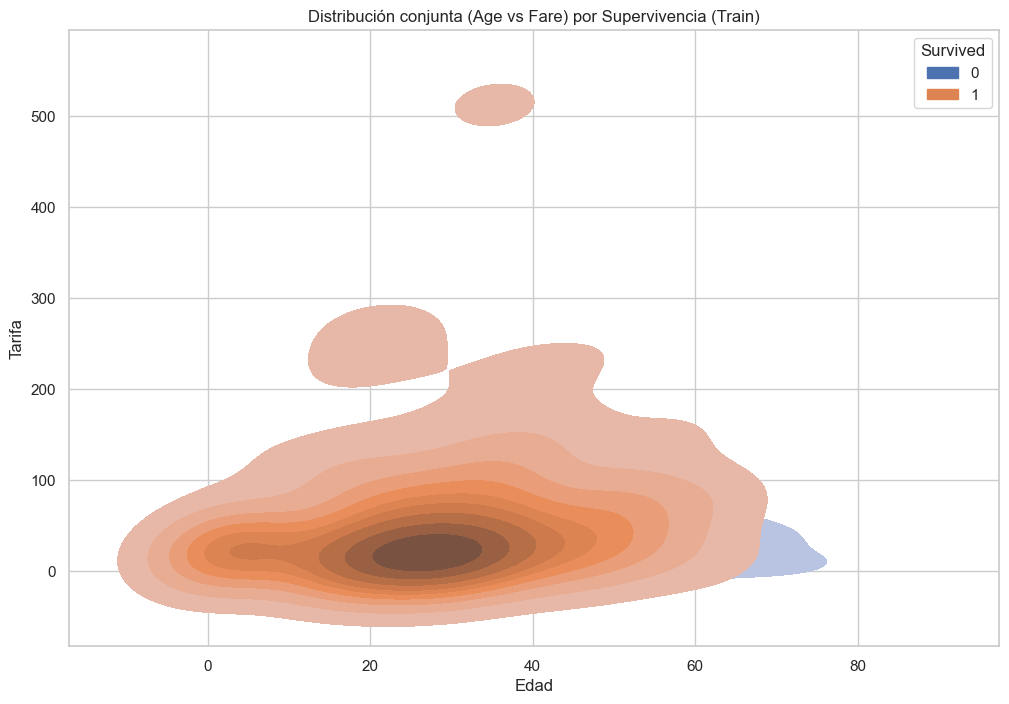

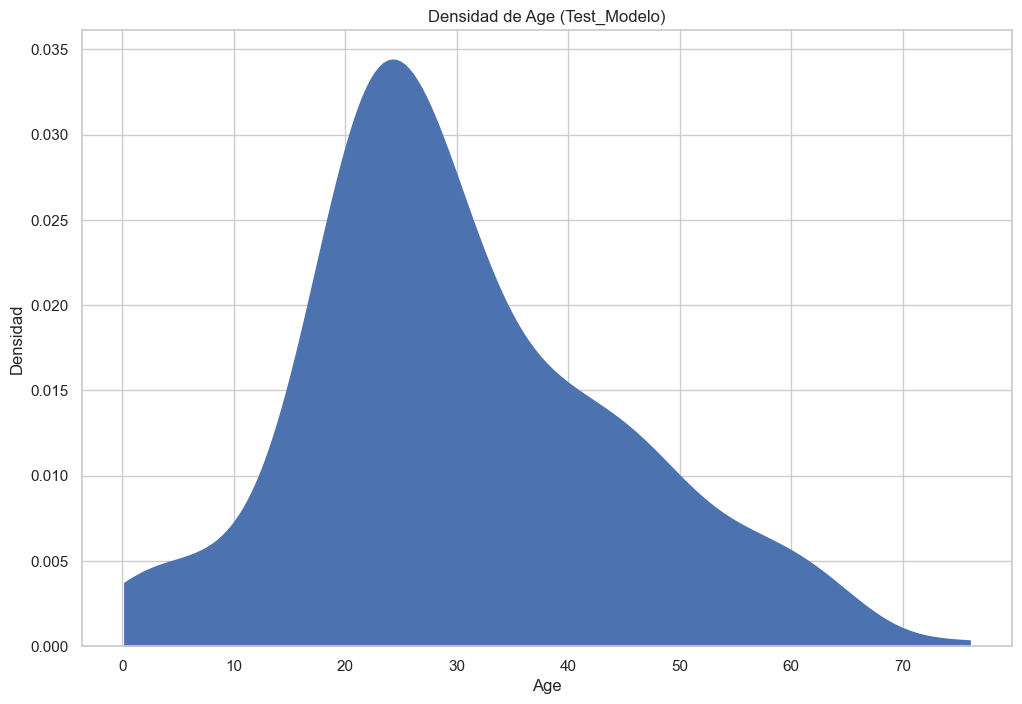

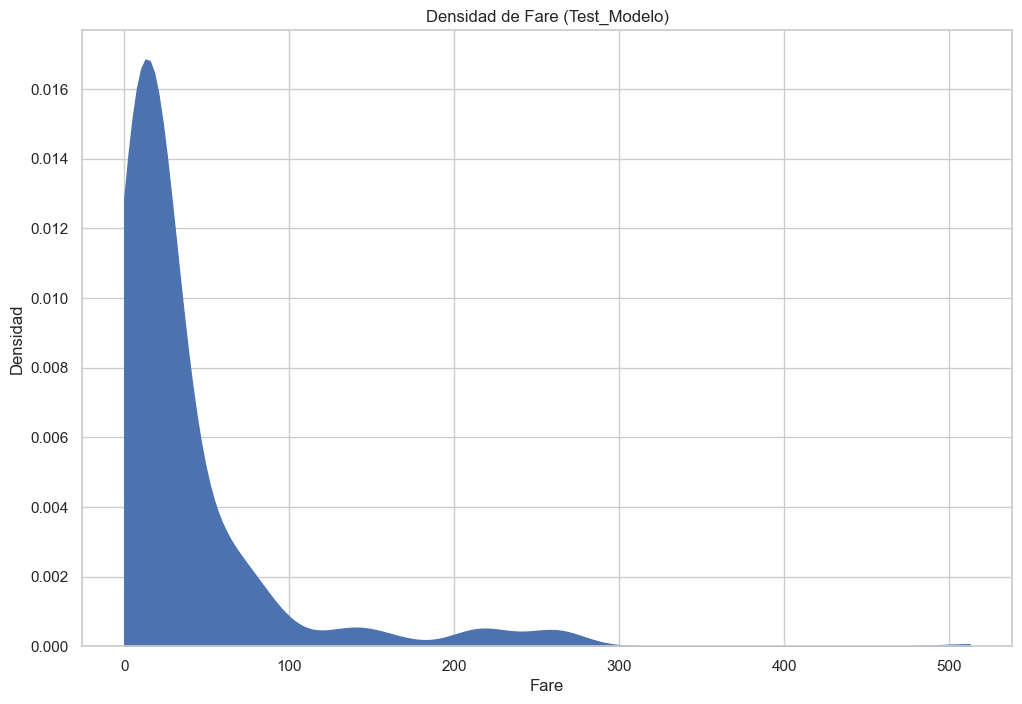

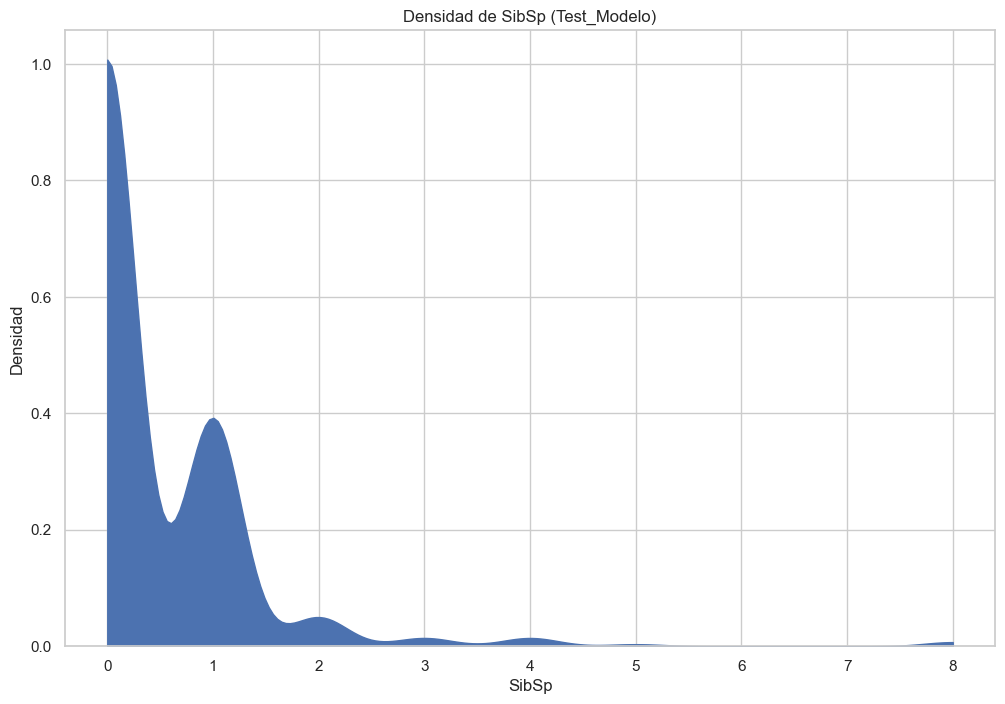

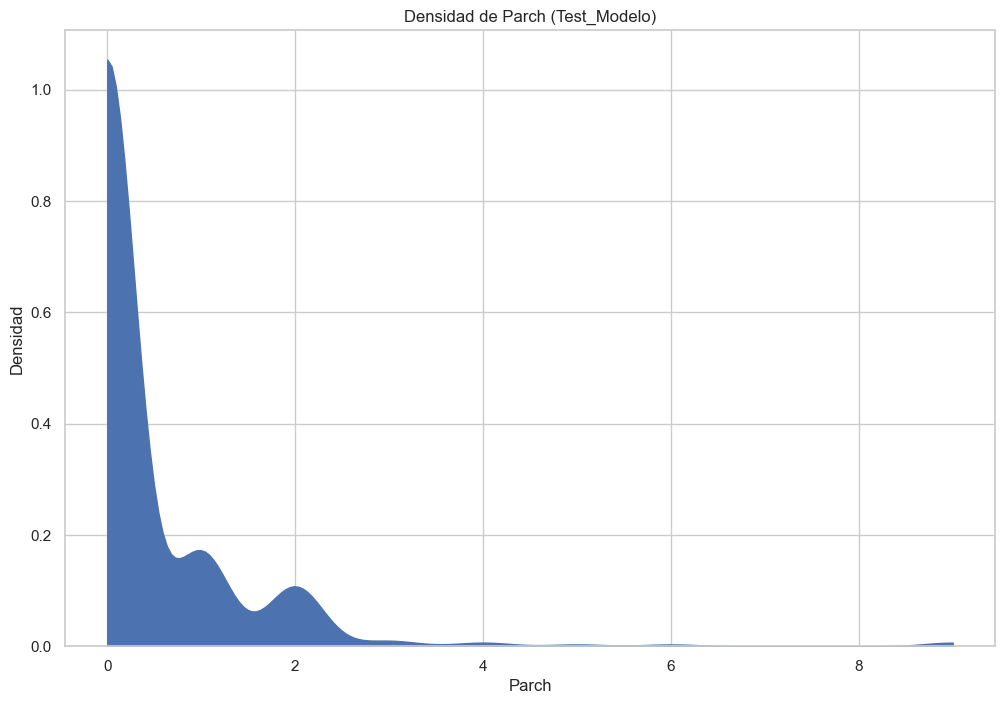

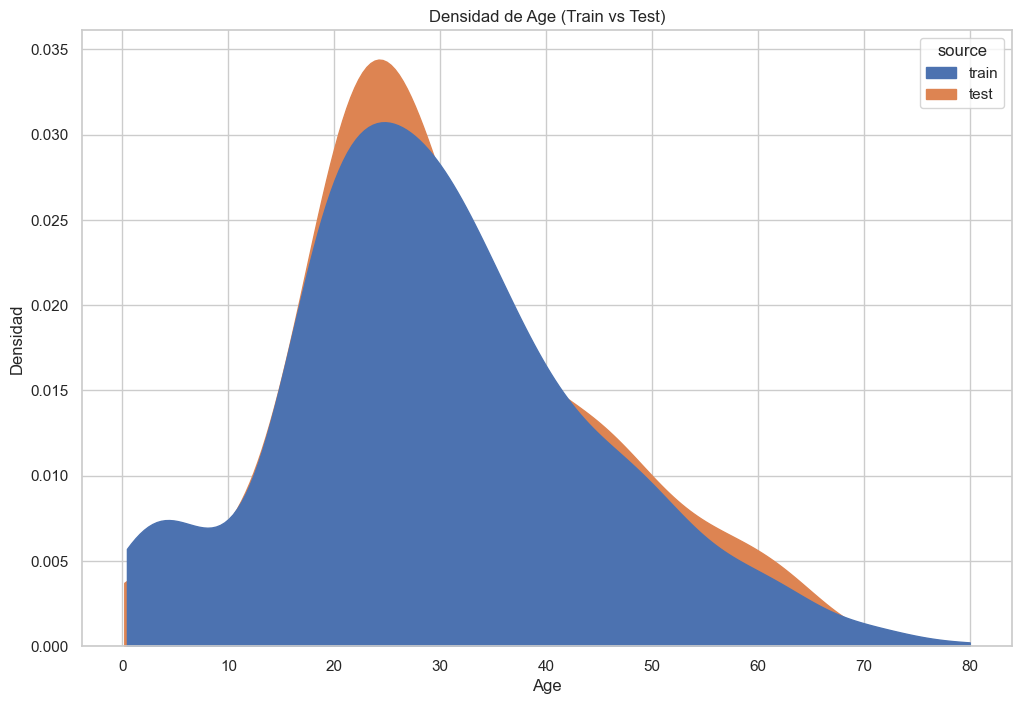

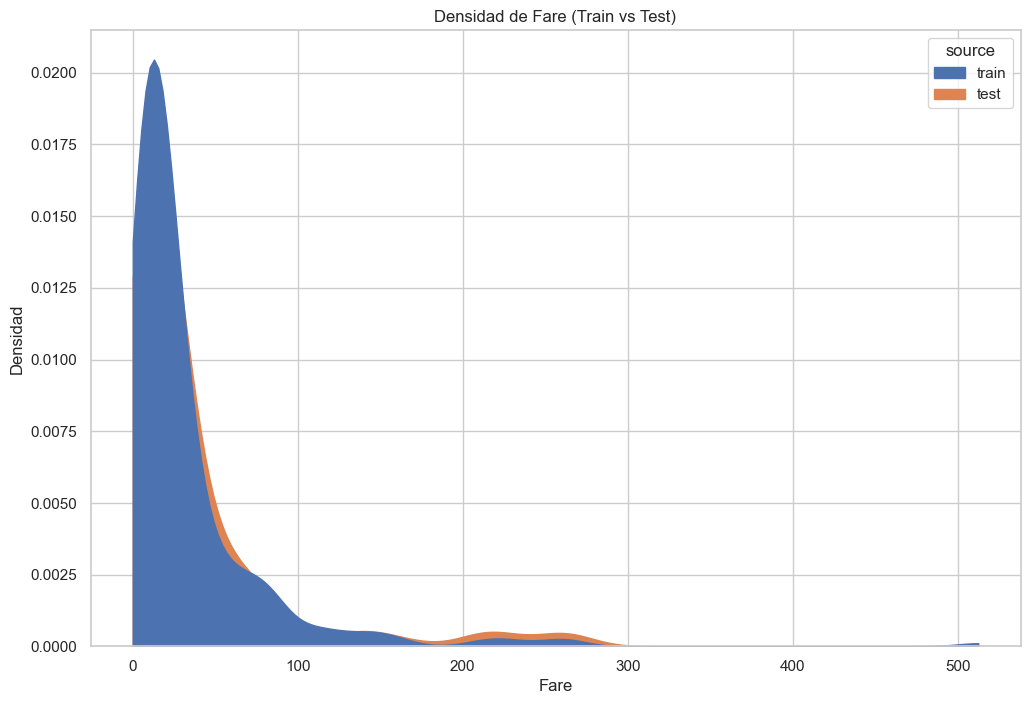

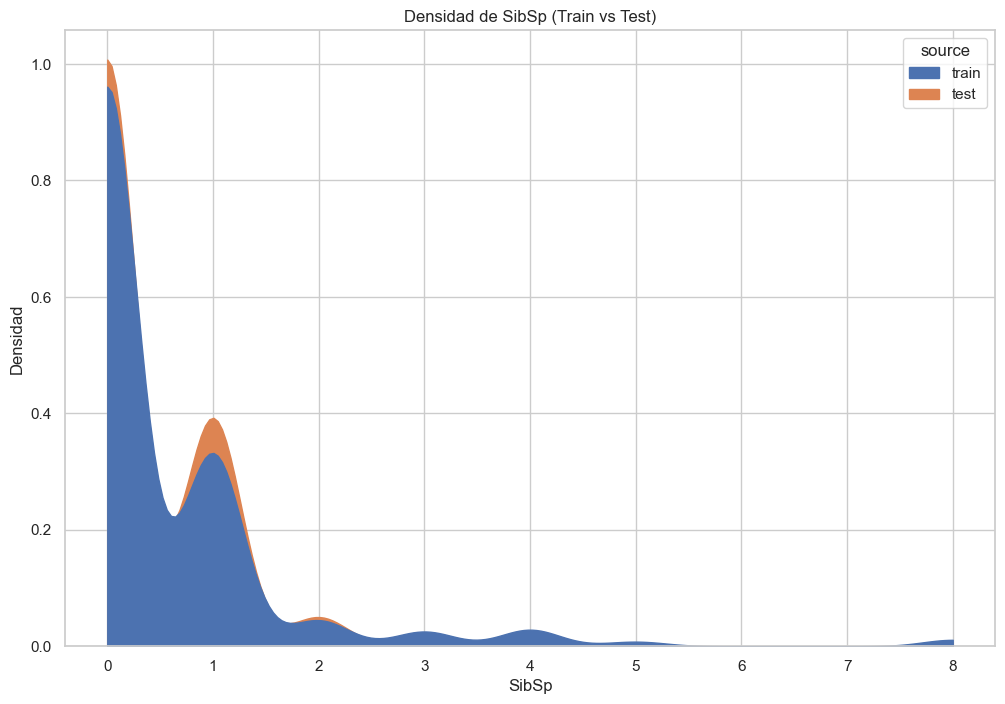

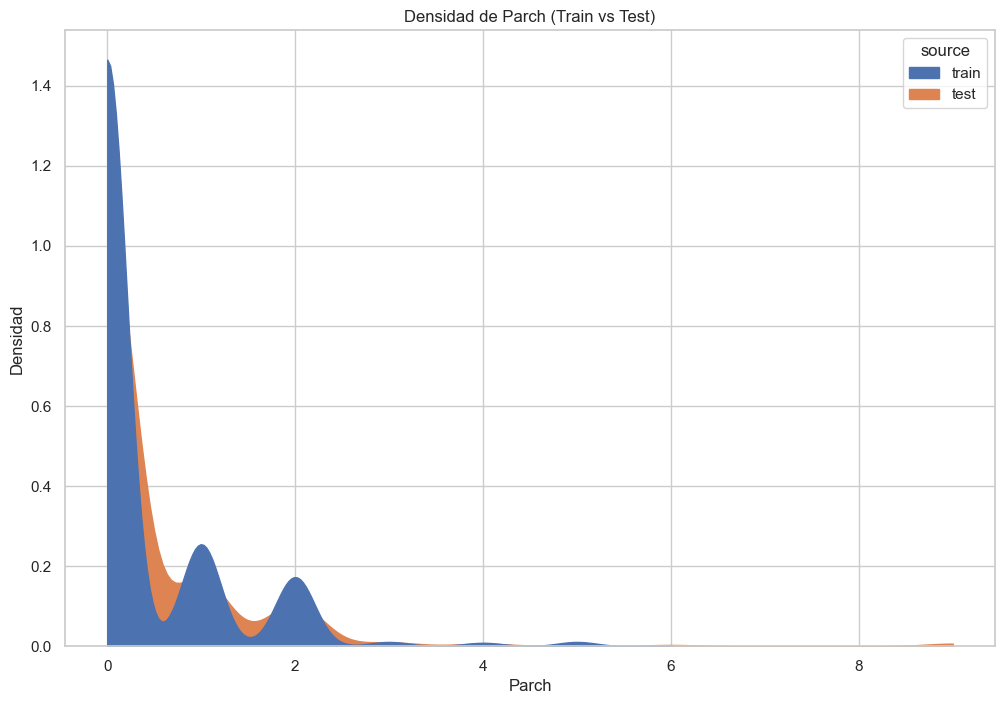

In [8]:
def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test_modelo = ensure_numeric(test_modelo, num_cols)
ambos = ensure_numeric(ambos, num_cols)

plt.rcParams["figure.figsize"] = (12, 8)
sns.set_theme(style="whitegrid")

for col in num_cols:
    sns.kdeplot(data=train, x=col, hue="Survived", cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} según Supervivencia (Train)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

sns.kdeplot(data=train, x="Age", y="Fare", hue="Survived", fill=True, thresh=0.05, levels=10, common_norm=False)
plt.title("Distribución conjunta (Age vs Fare) por Supervivencia (Train)")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.show()

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

for col in num_cols:
    sns.kdeplot(data=test_modelo, x=col, cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} (Test_Modelo)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

for col in num_cols:
    sns.kdeplot(data=ambos, x=col, hue="source", cut=0, fill=True, common_norm=False, alpha=1)
    plt.title(f"Densidad de {col} (Train vs Test)")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.show()

Mostrando distribuciones de las variables numéricas en el conjunto TRAIN...


C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


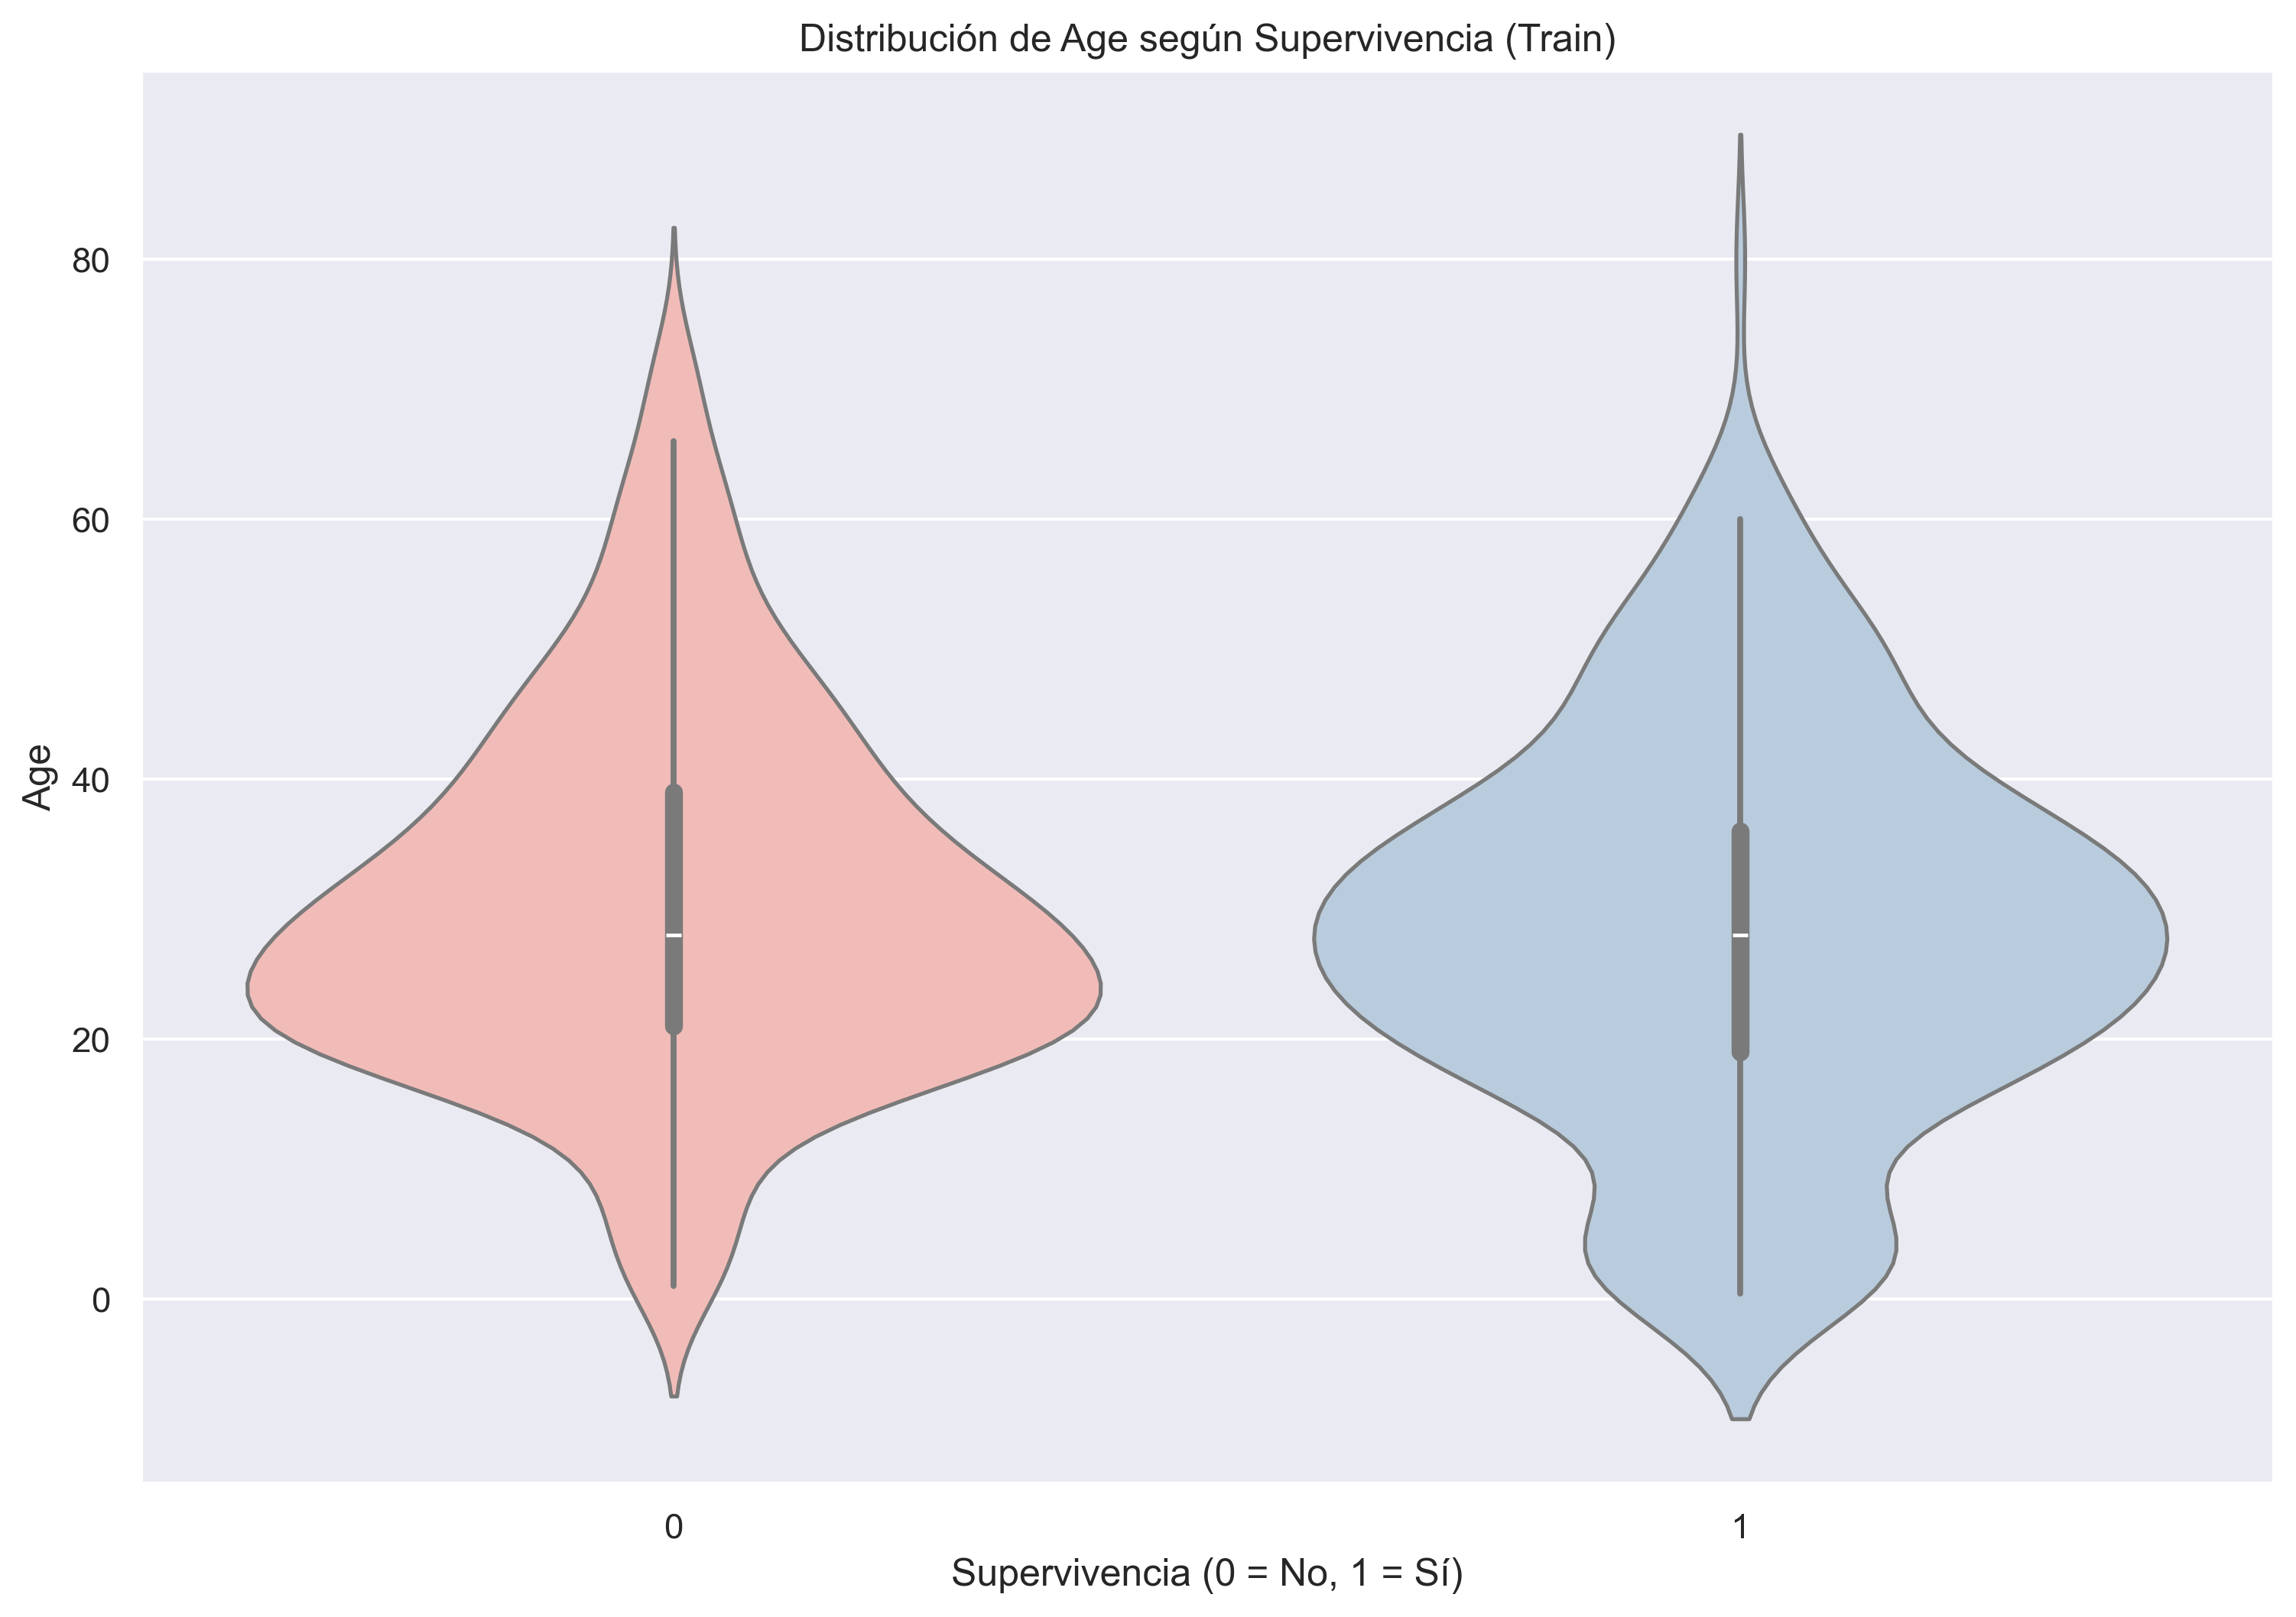

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


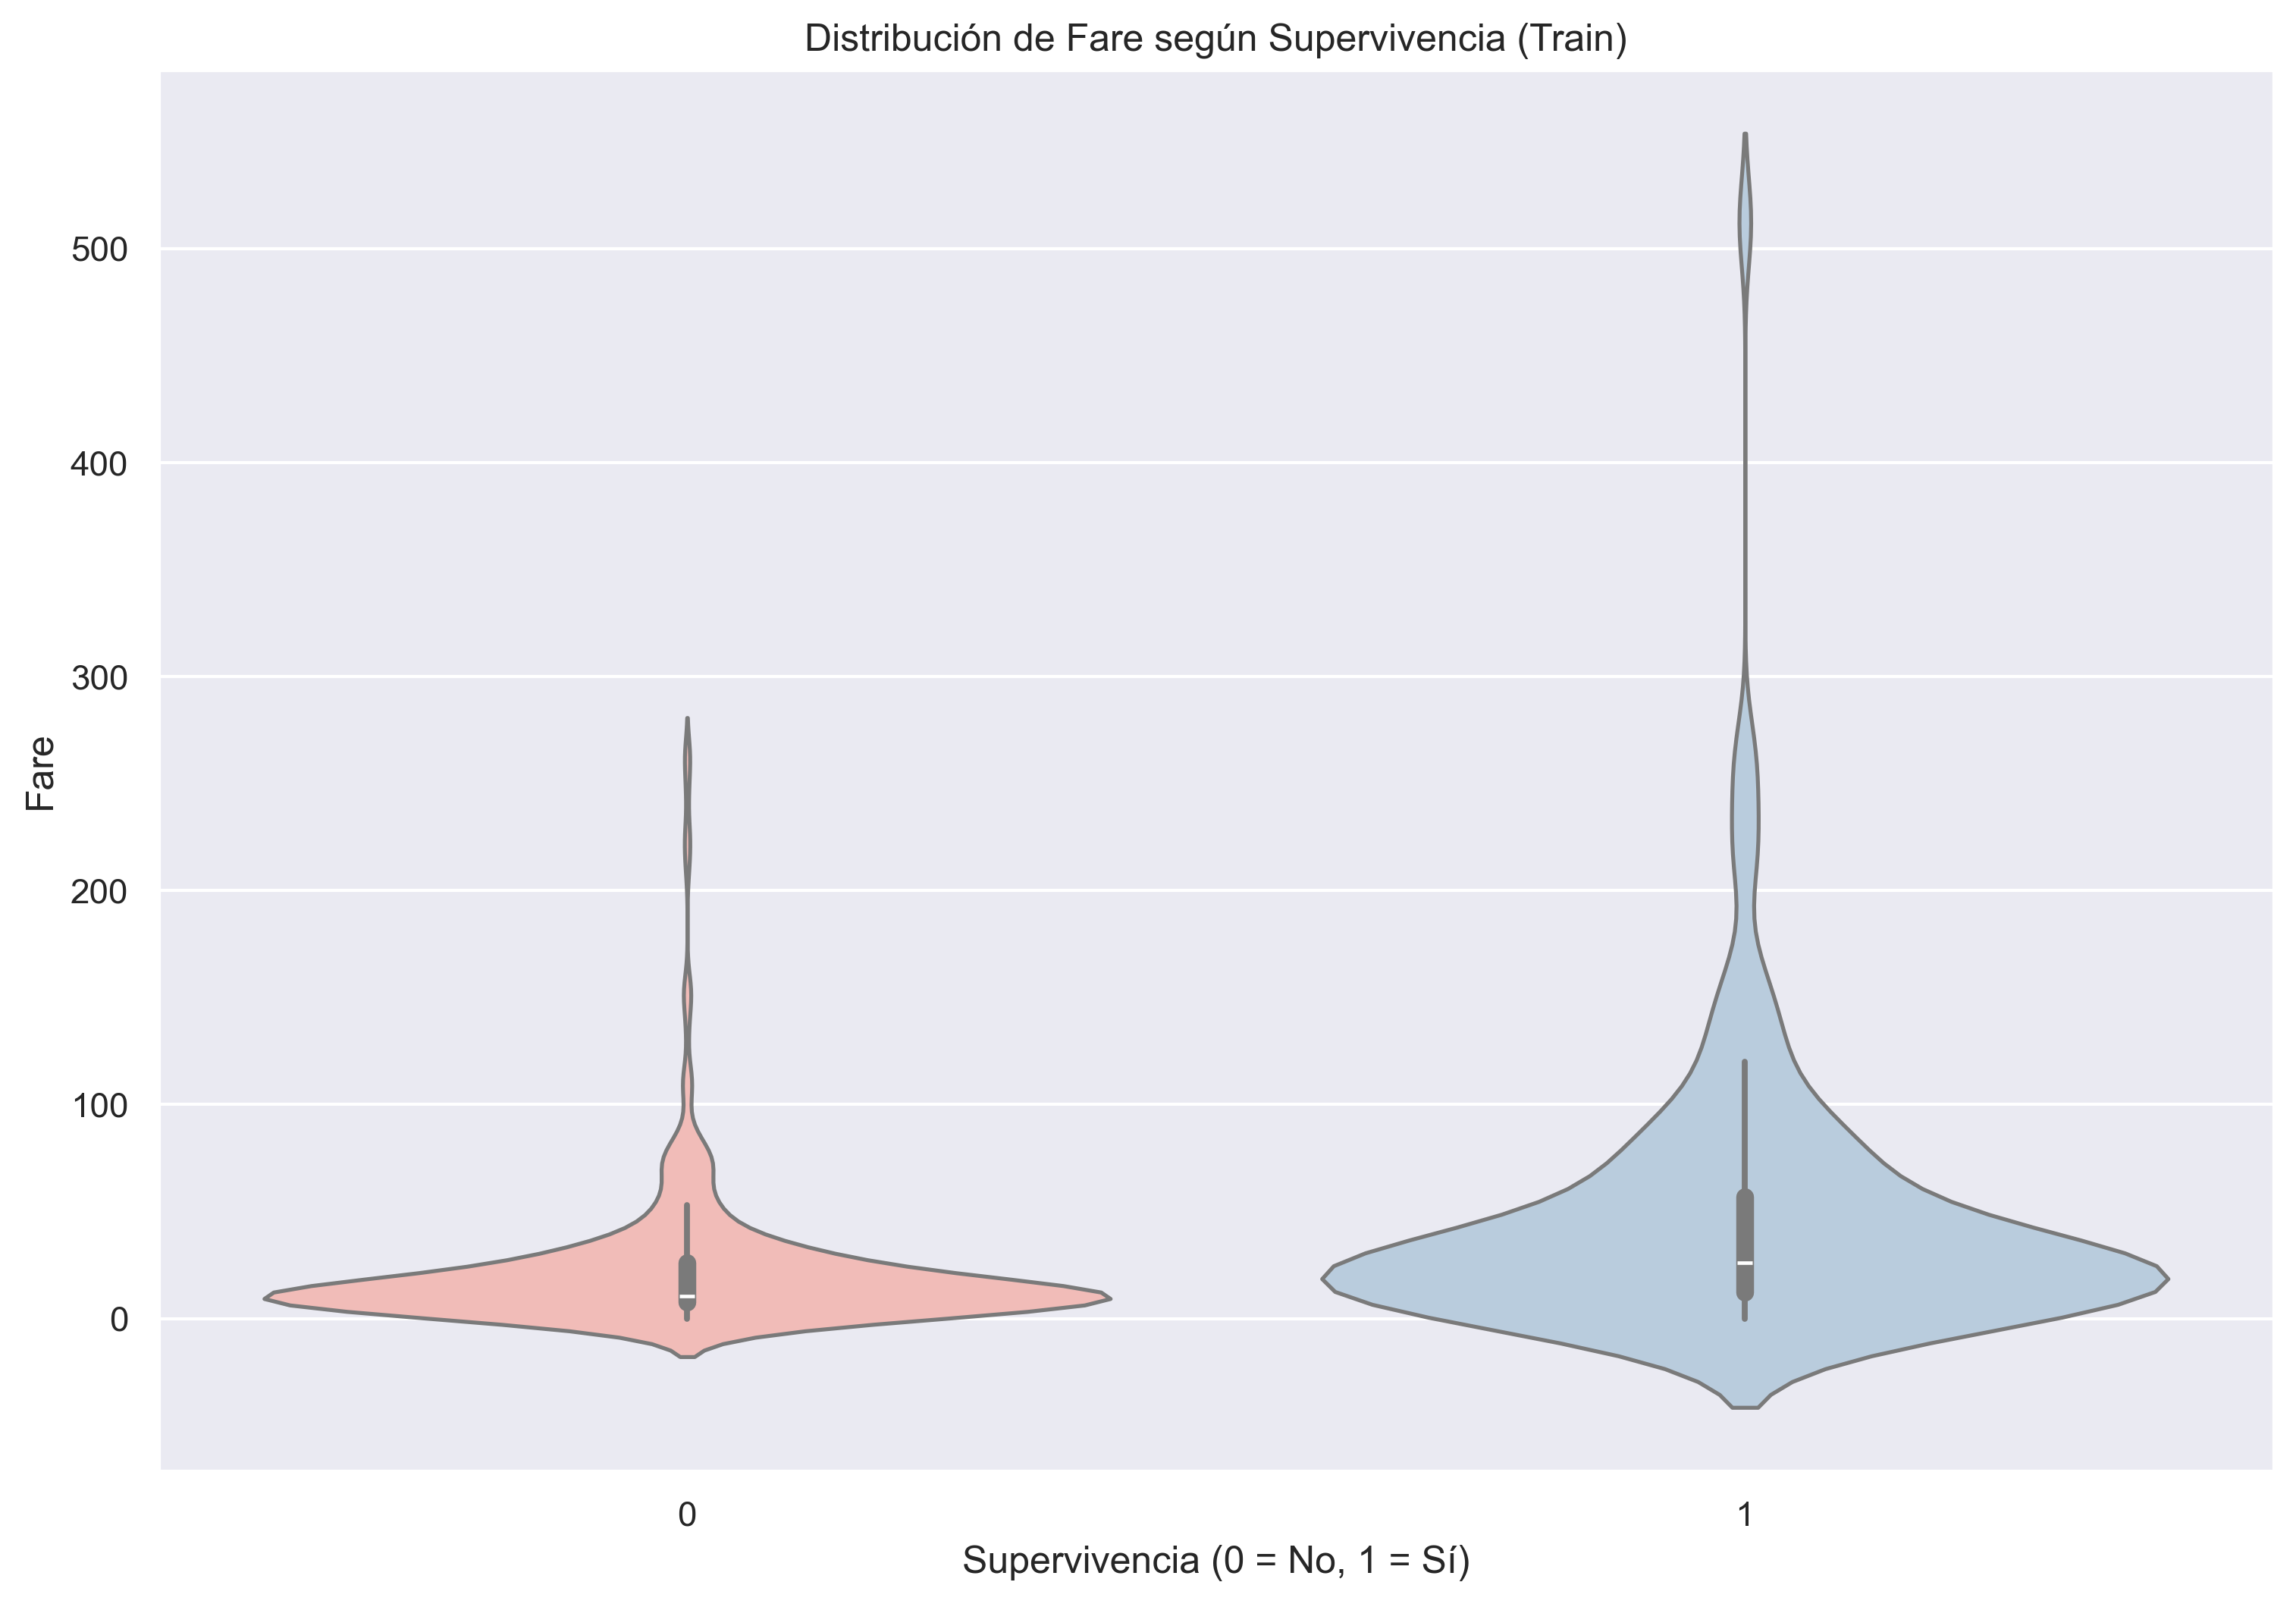

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


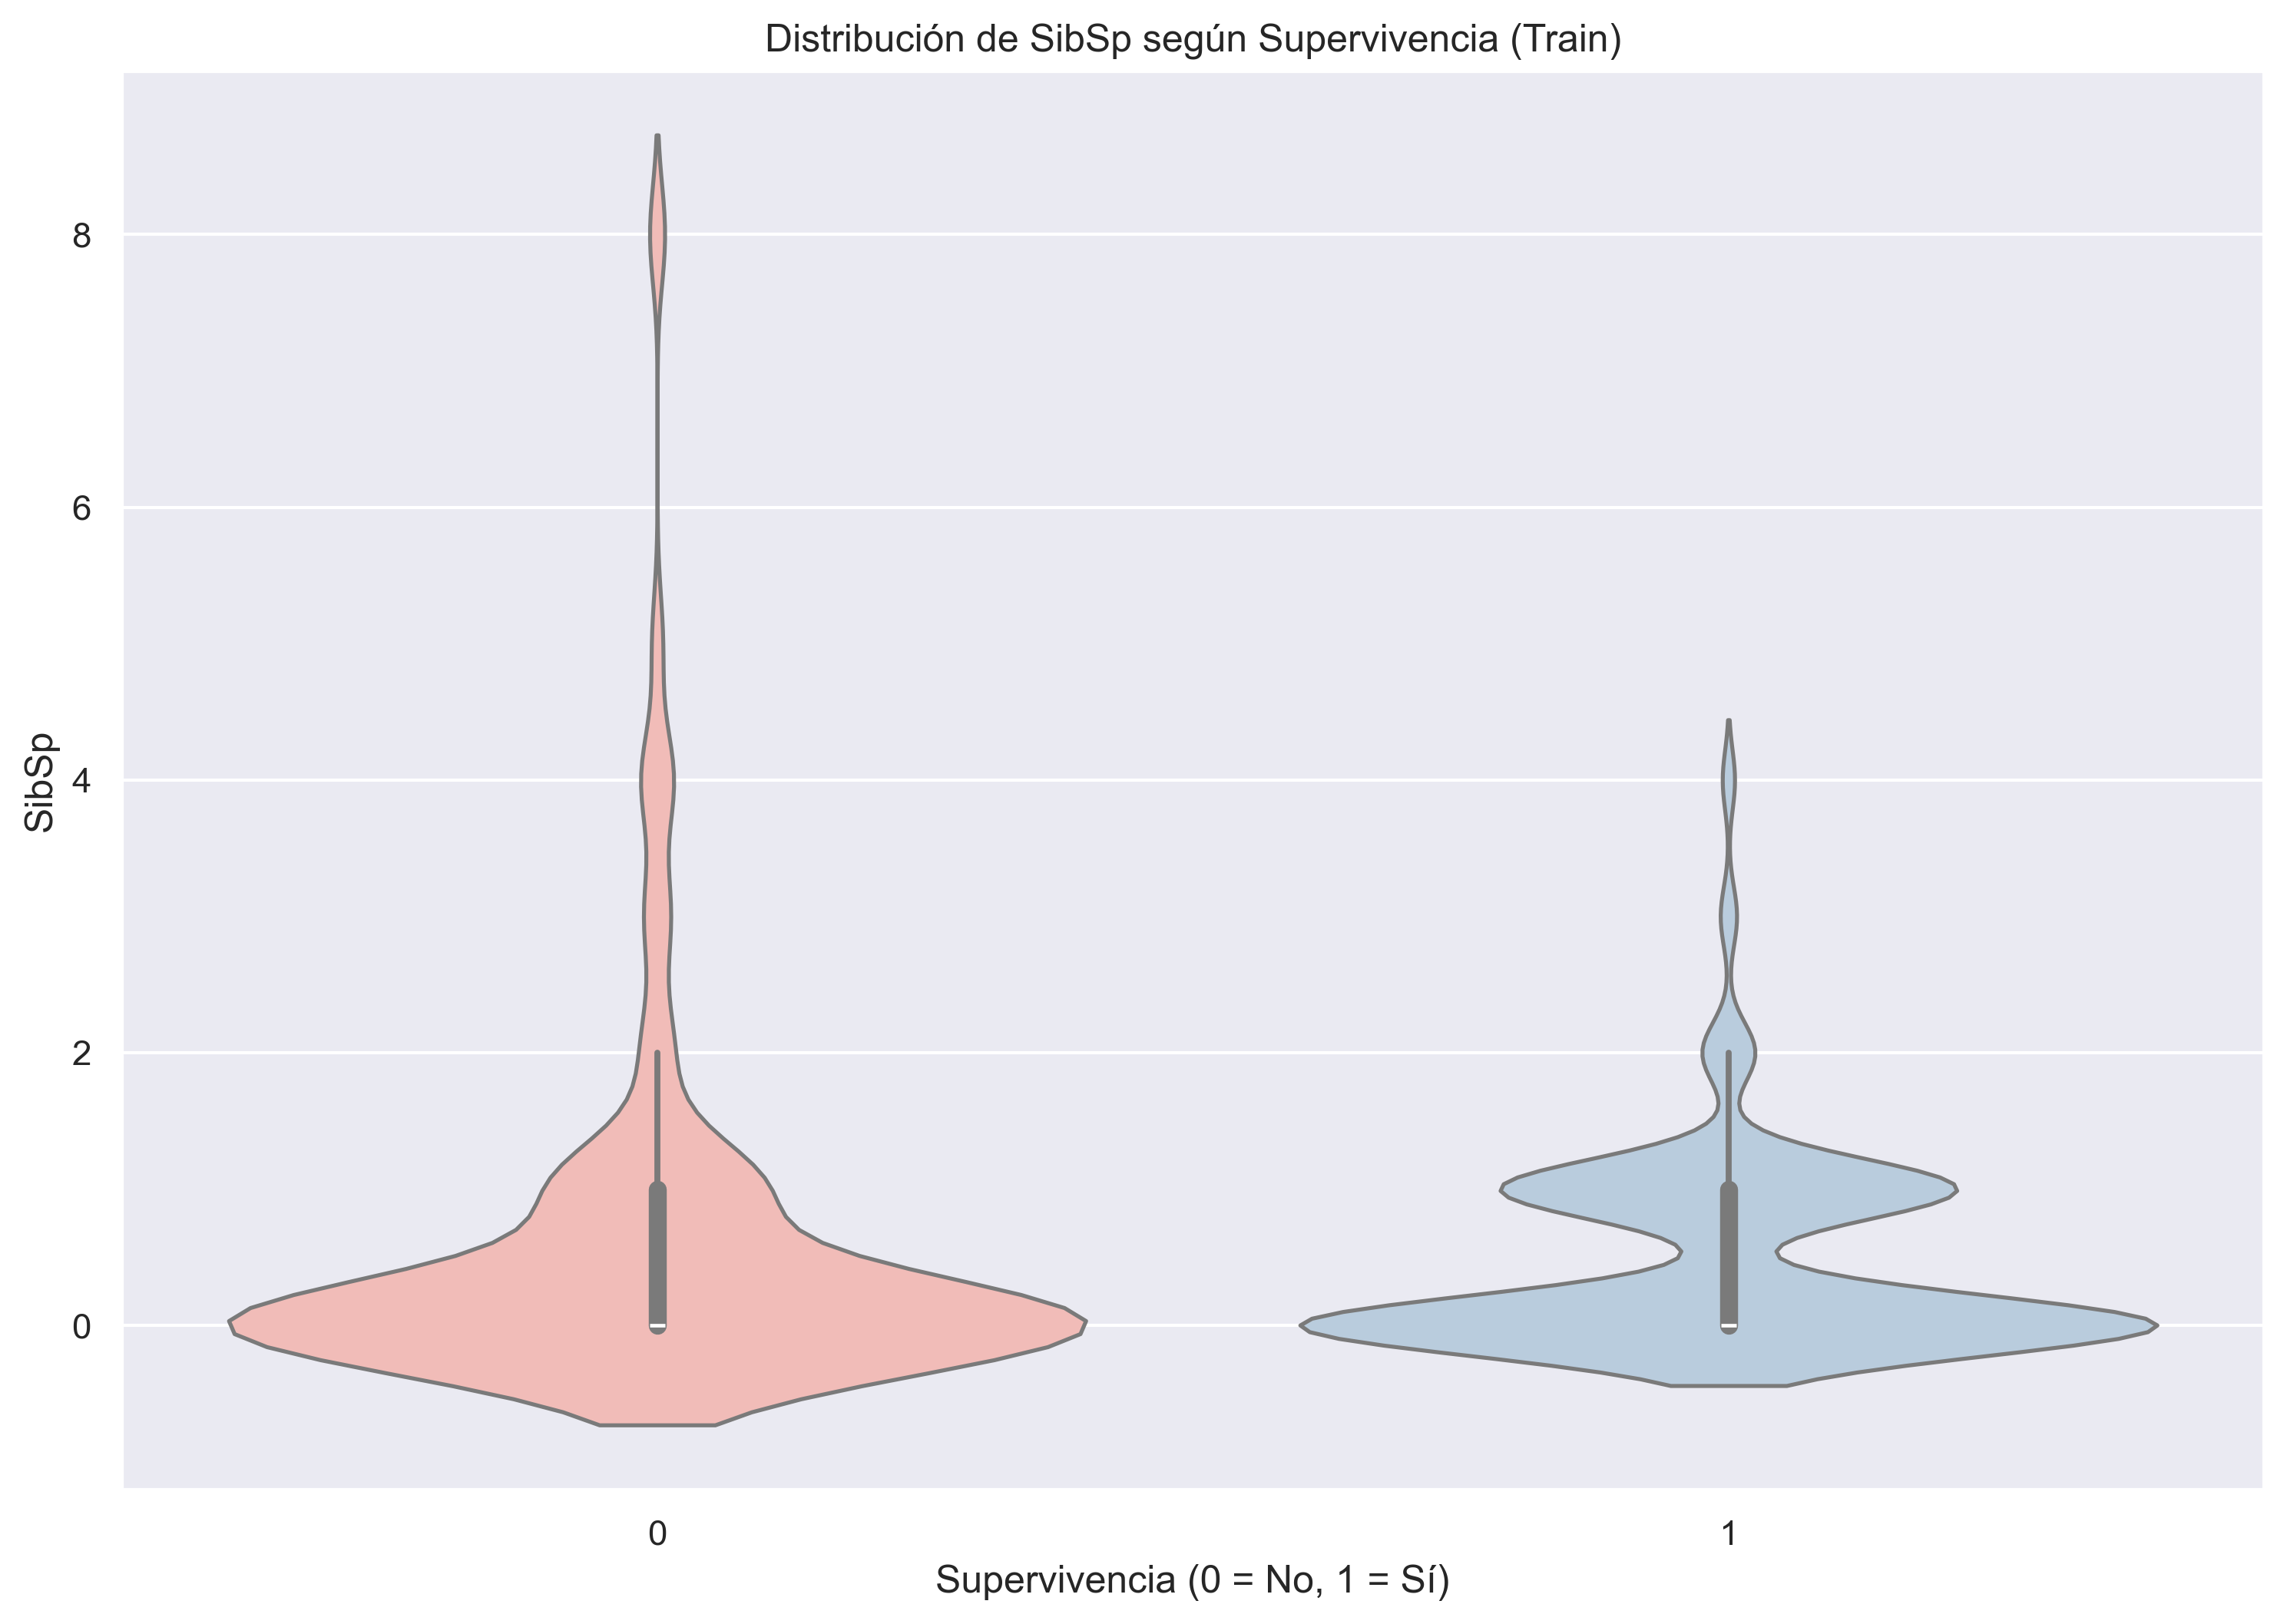

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")


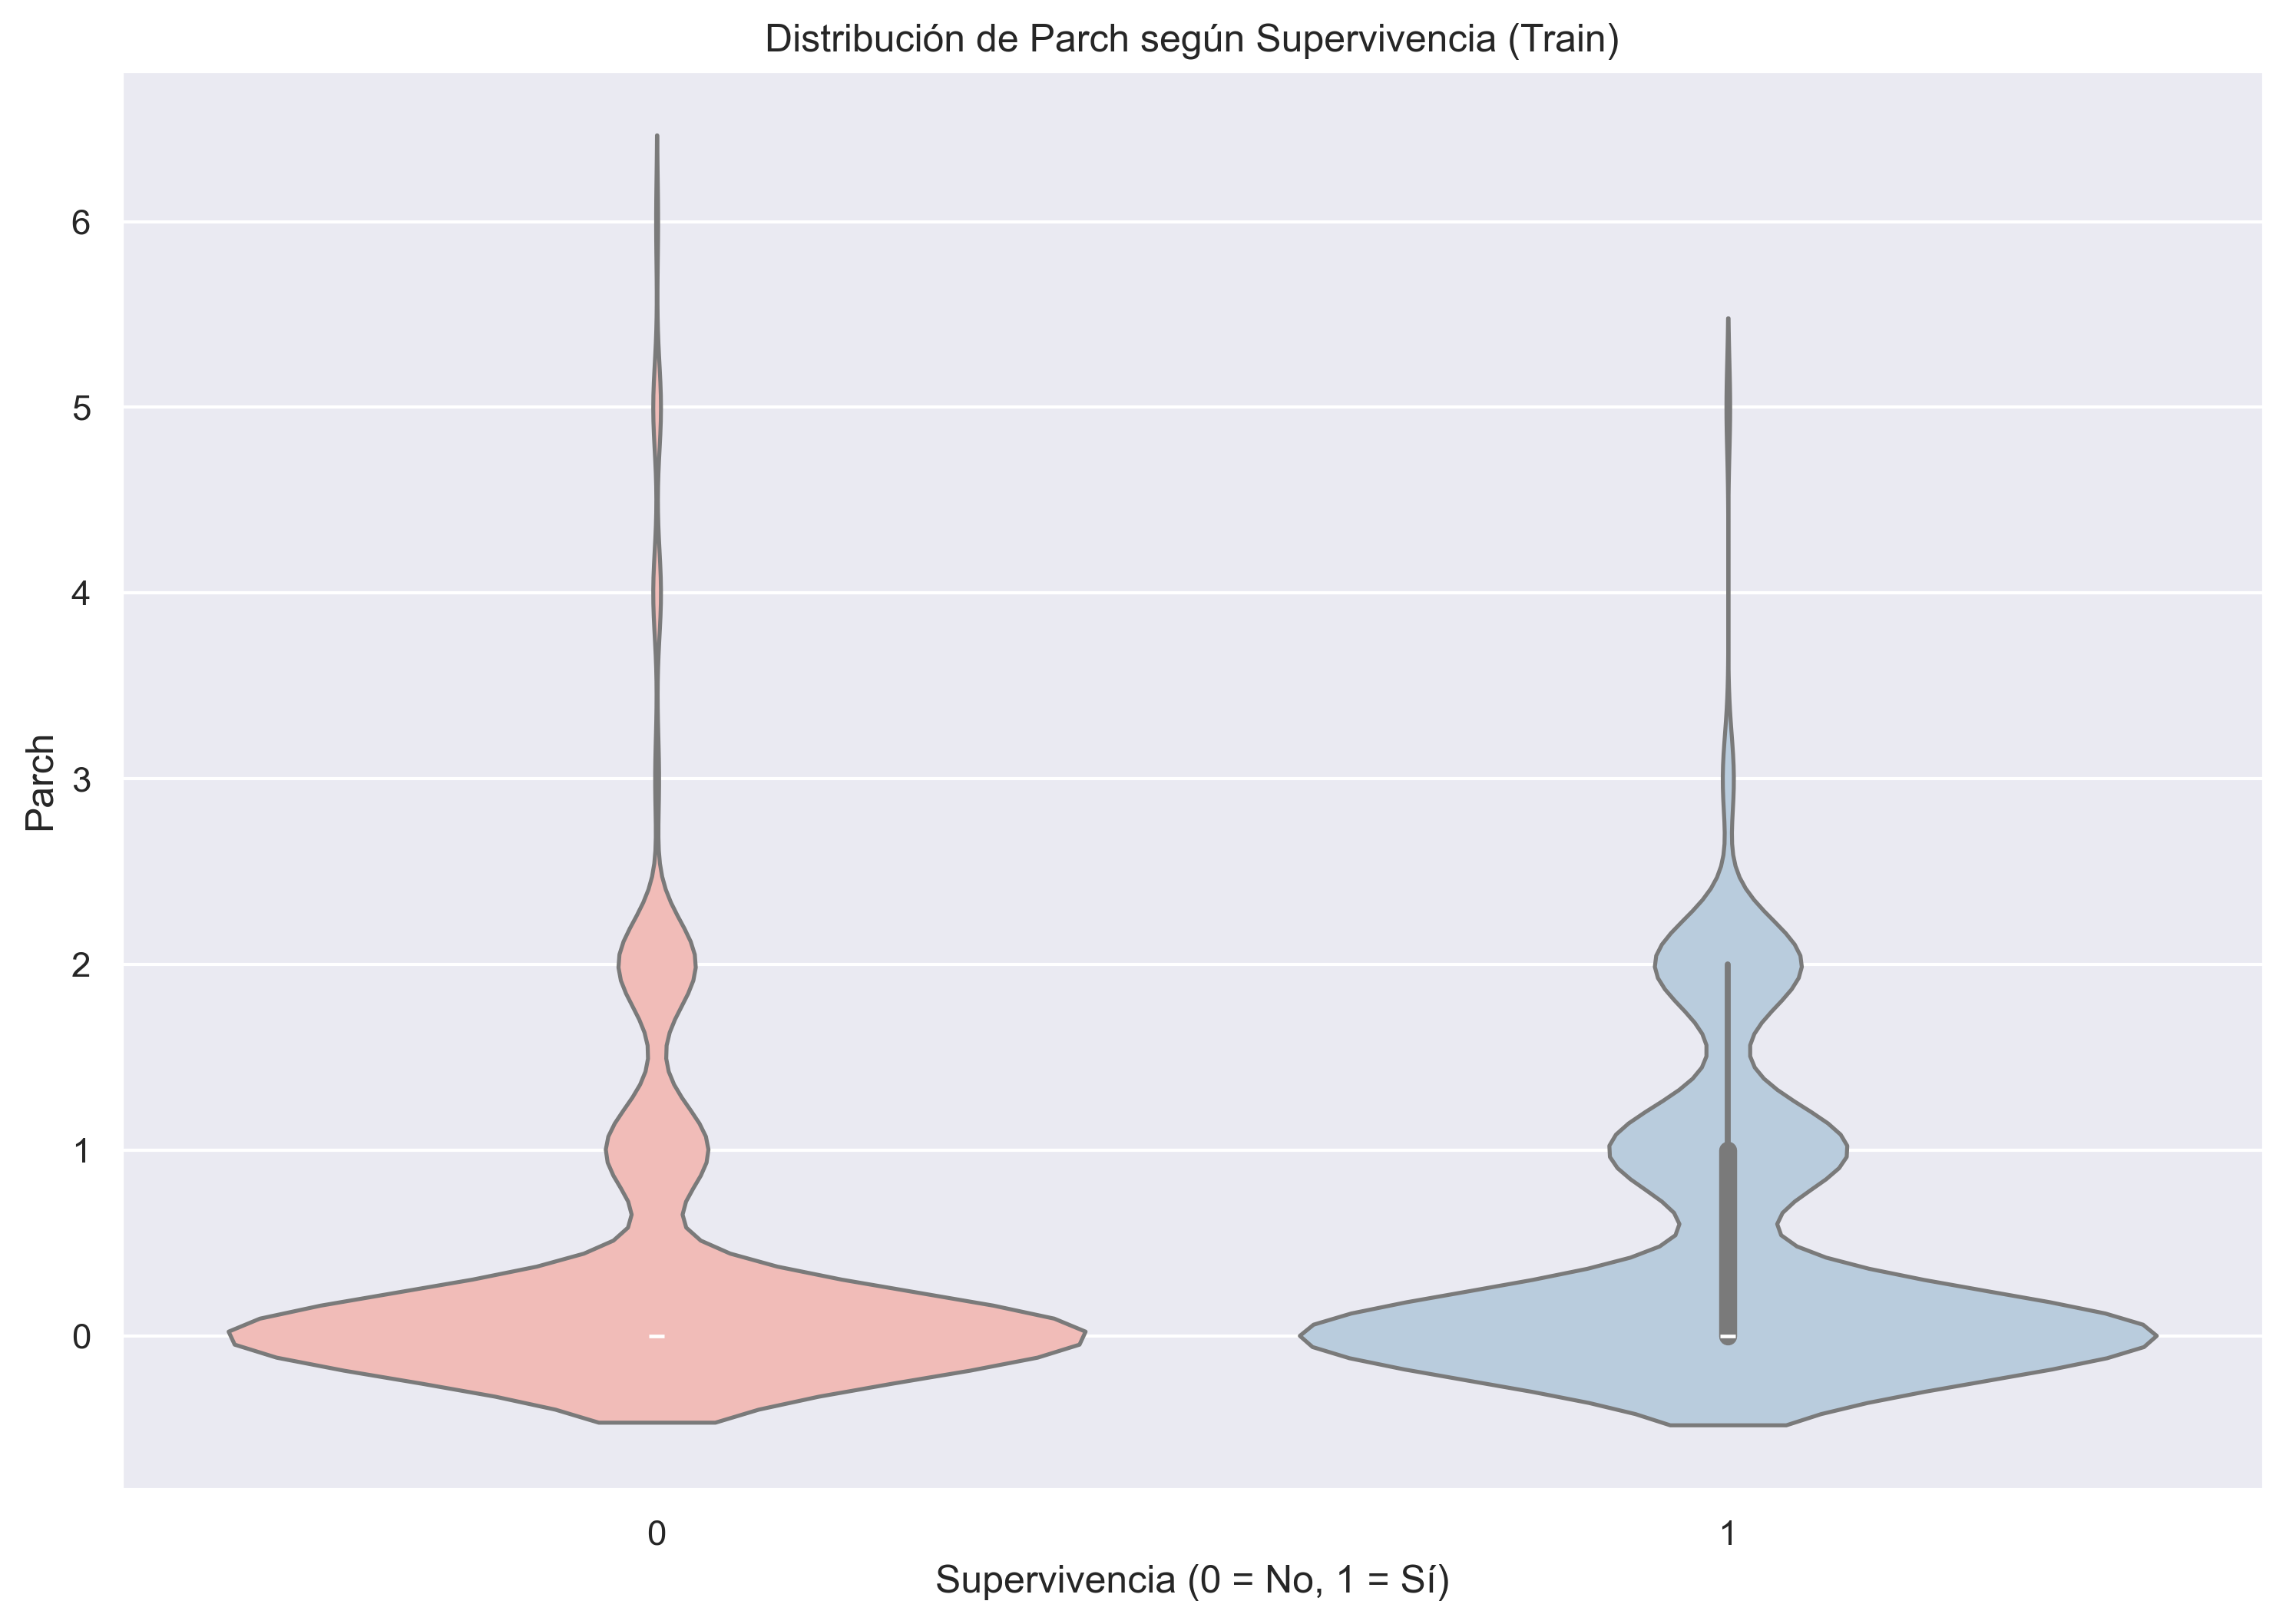

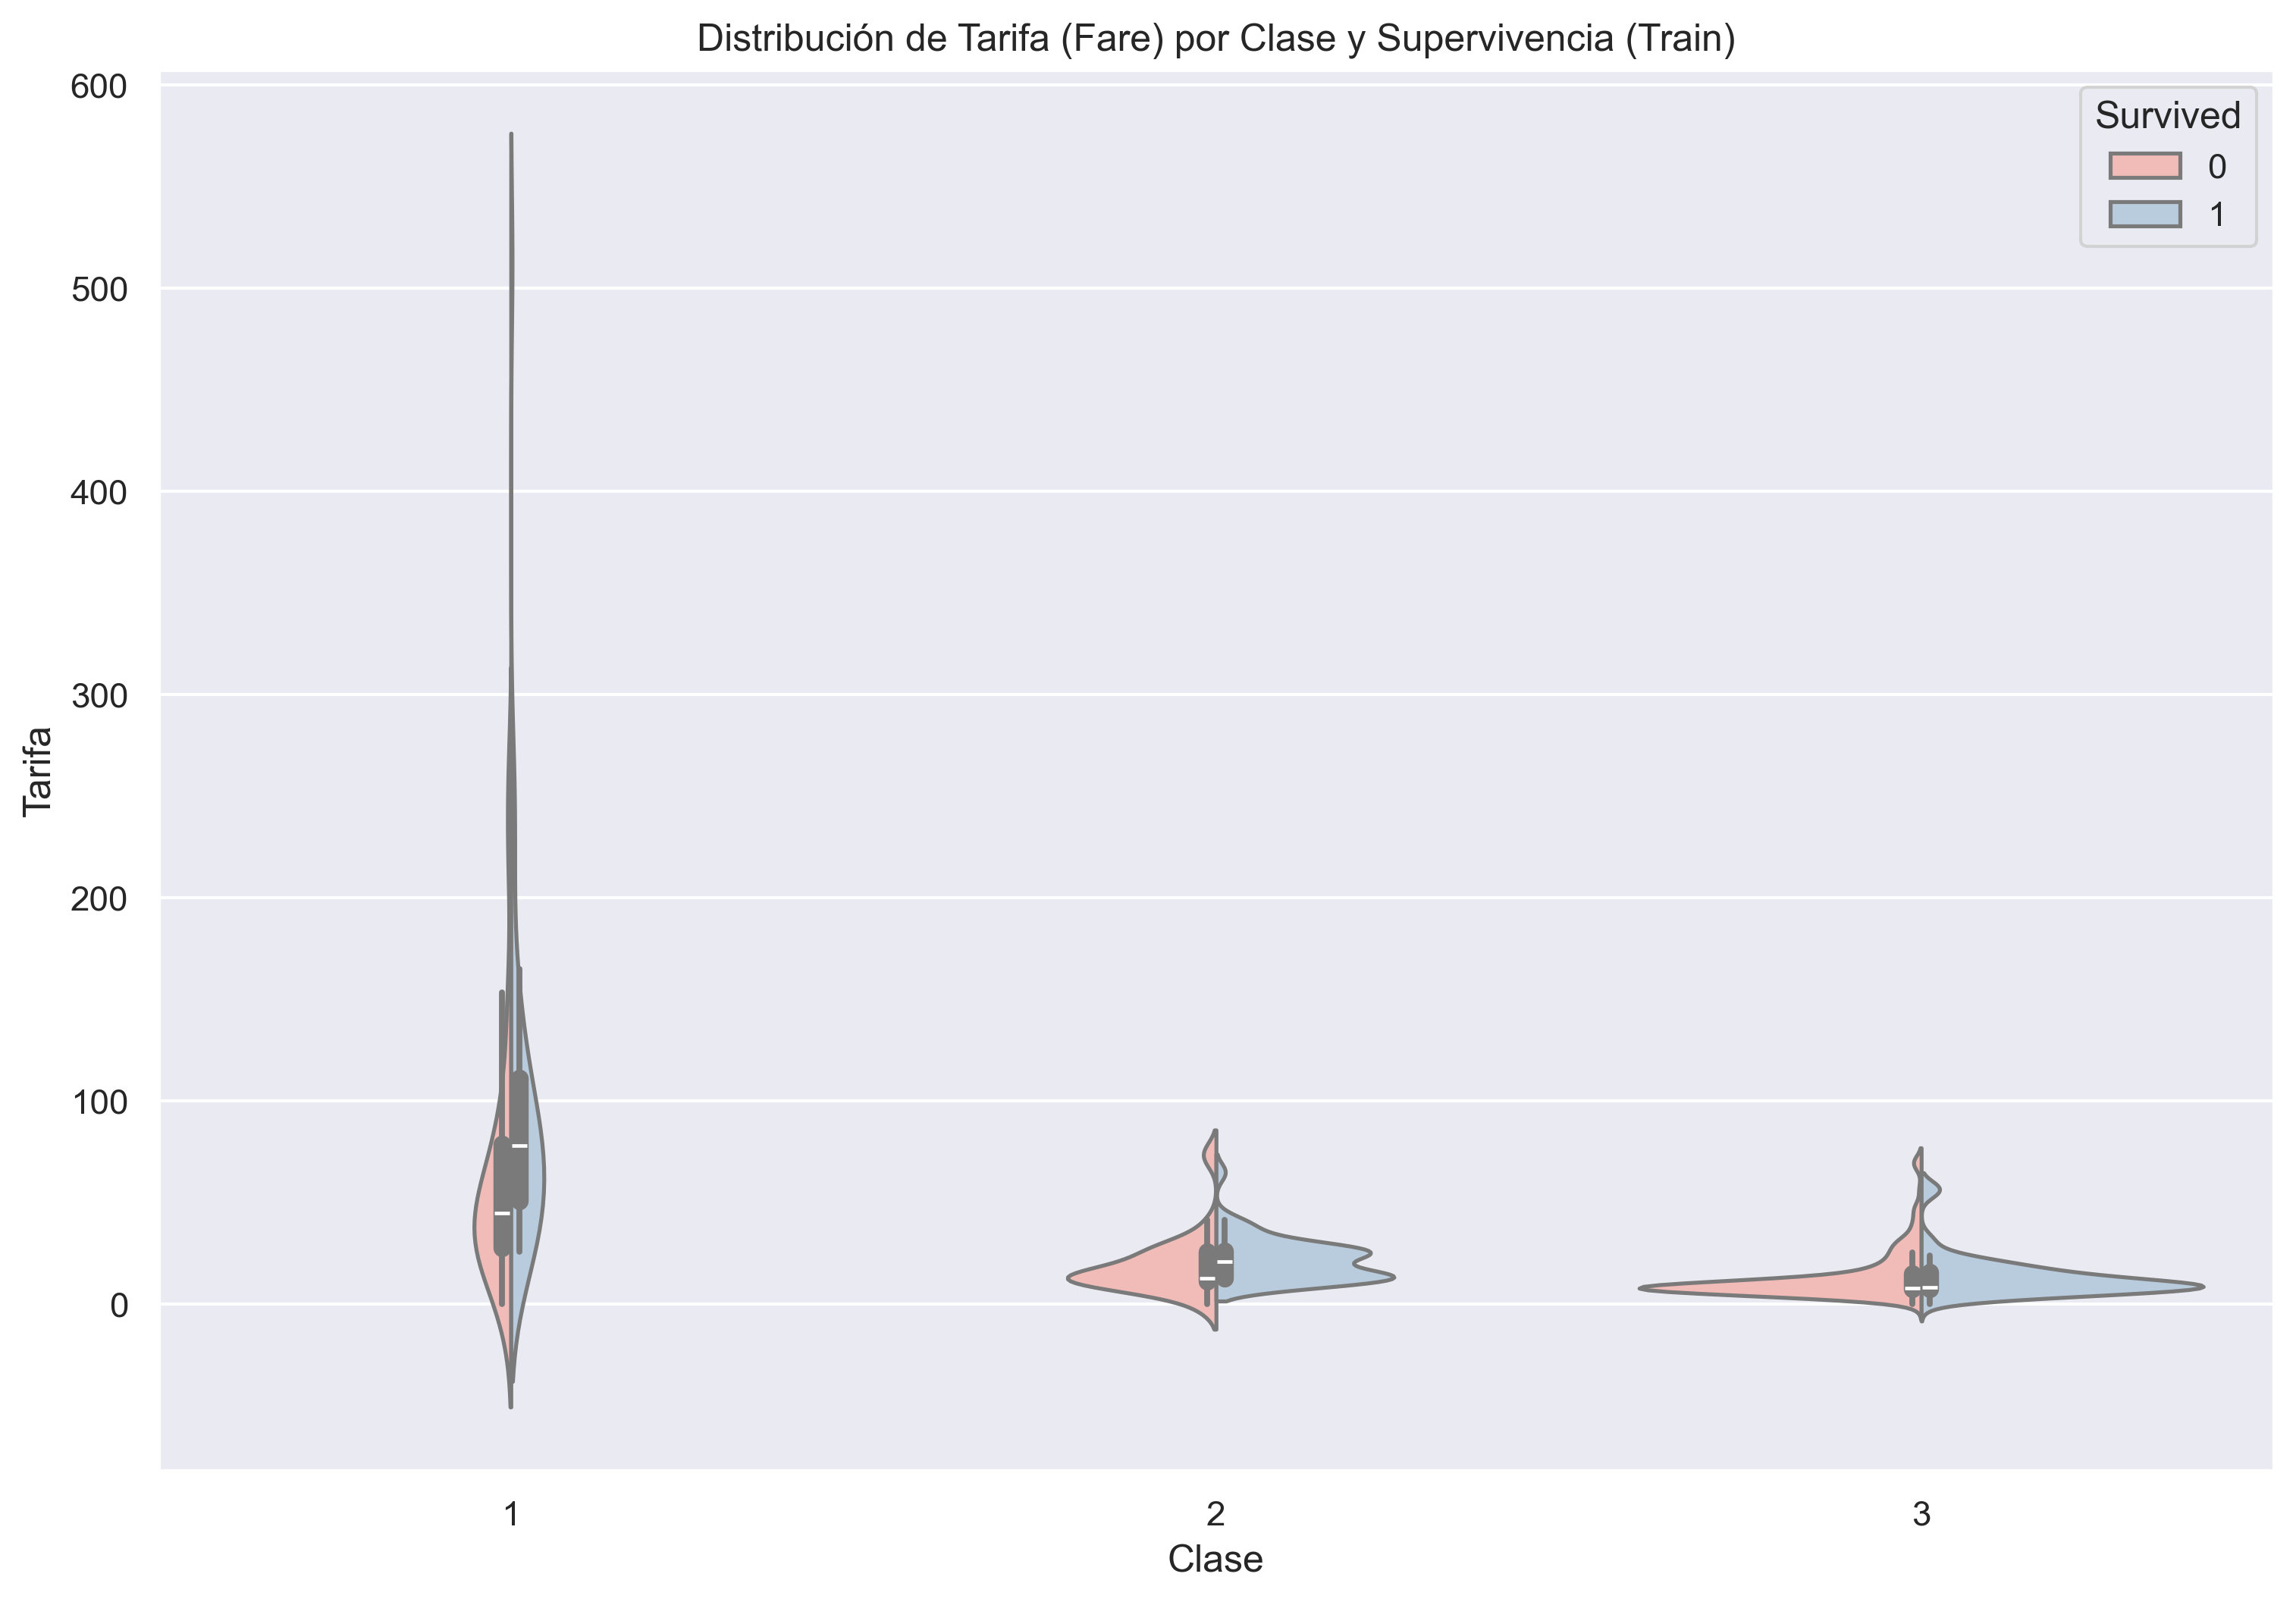

Visualizando distribuciones para el conjunto TEST_MODELO...


C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


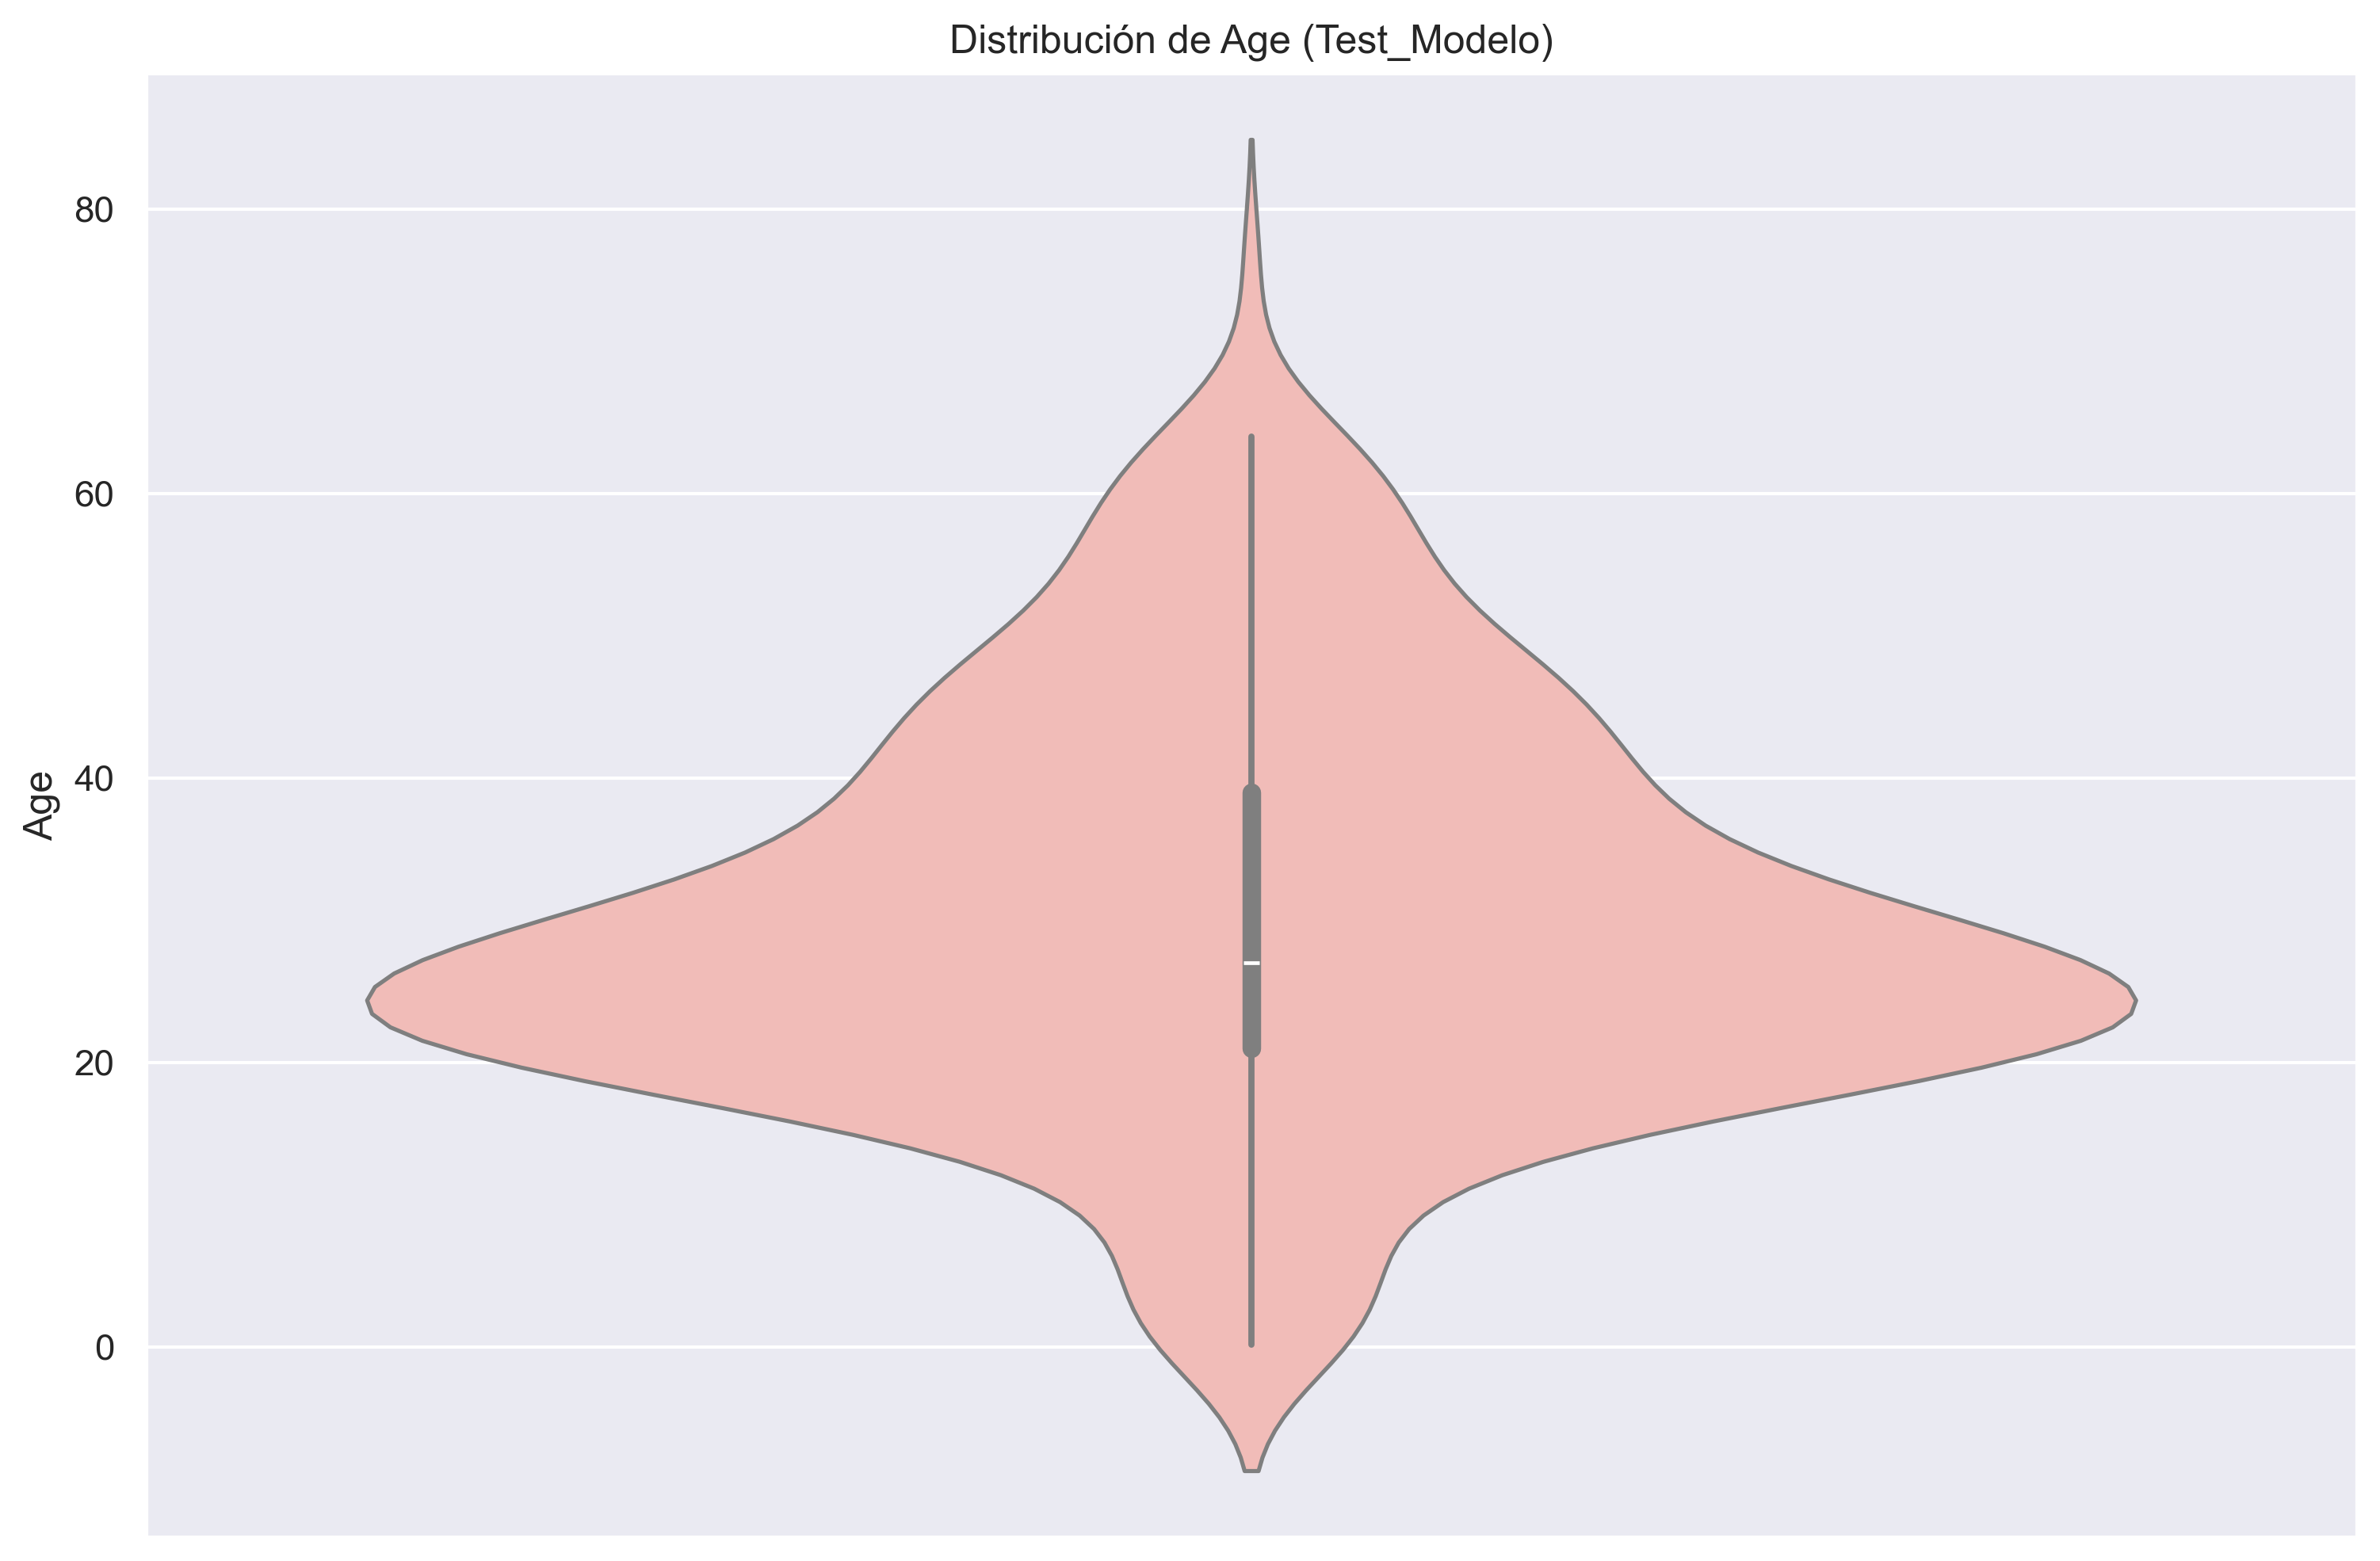

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


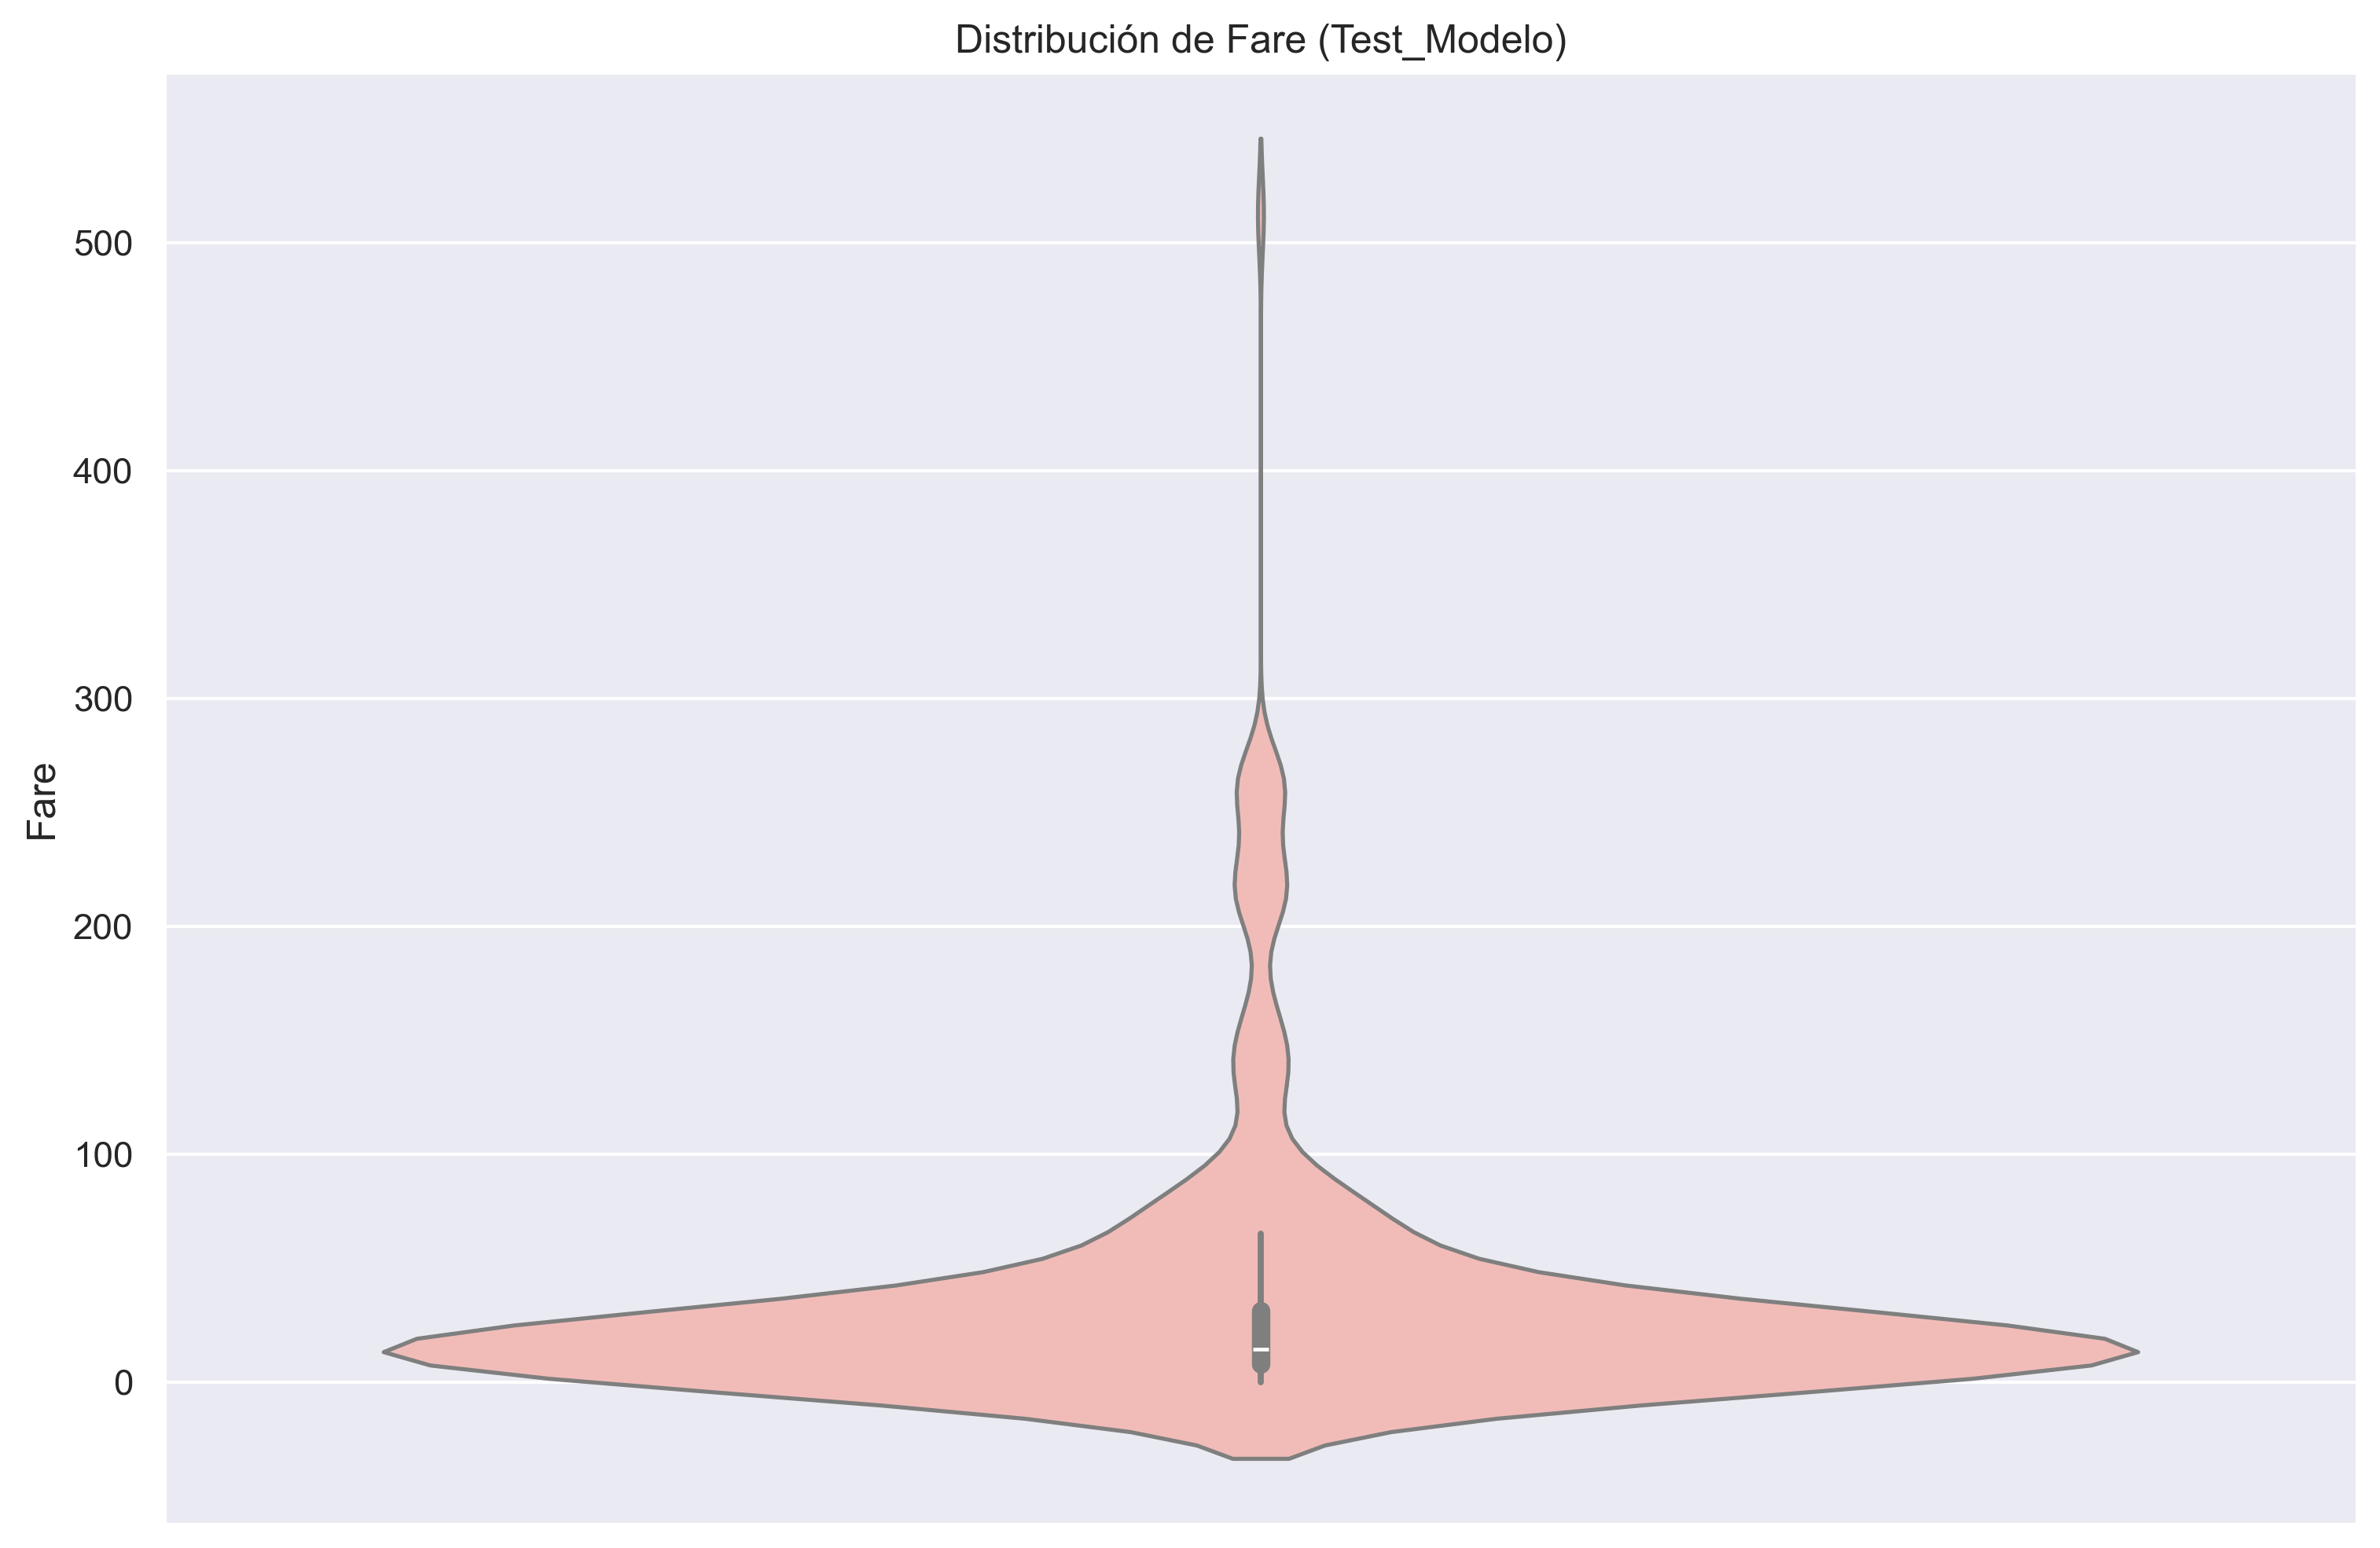

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


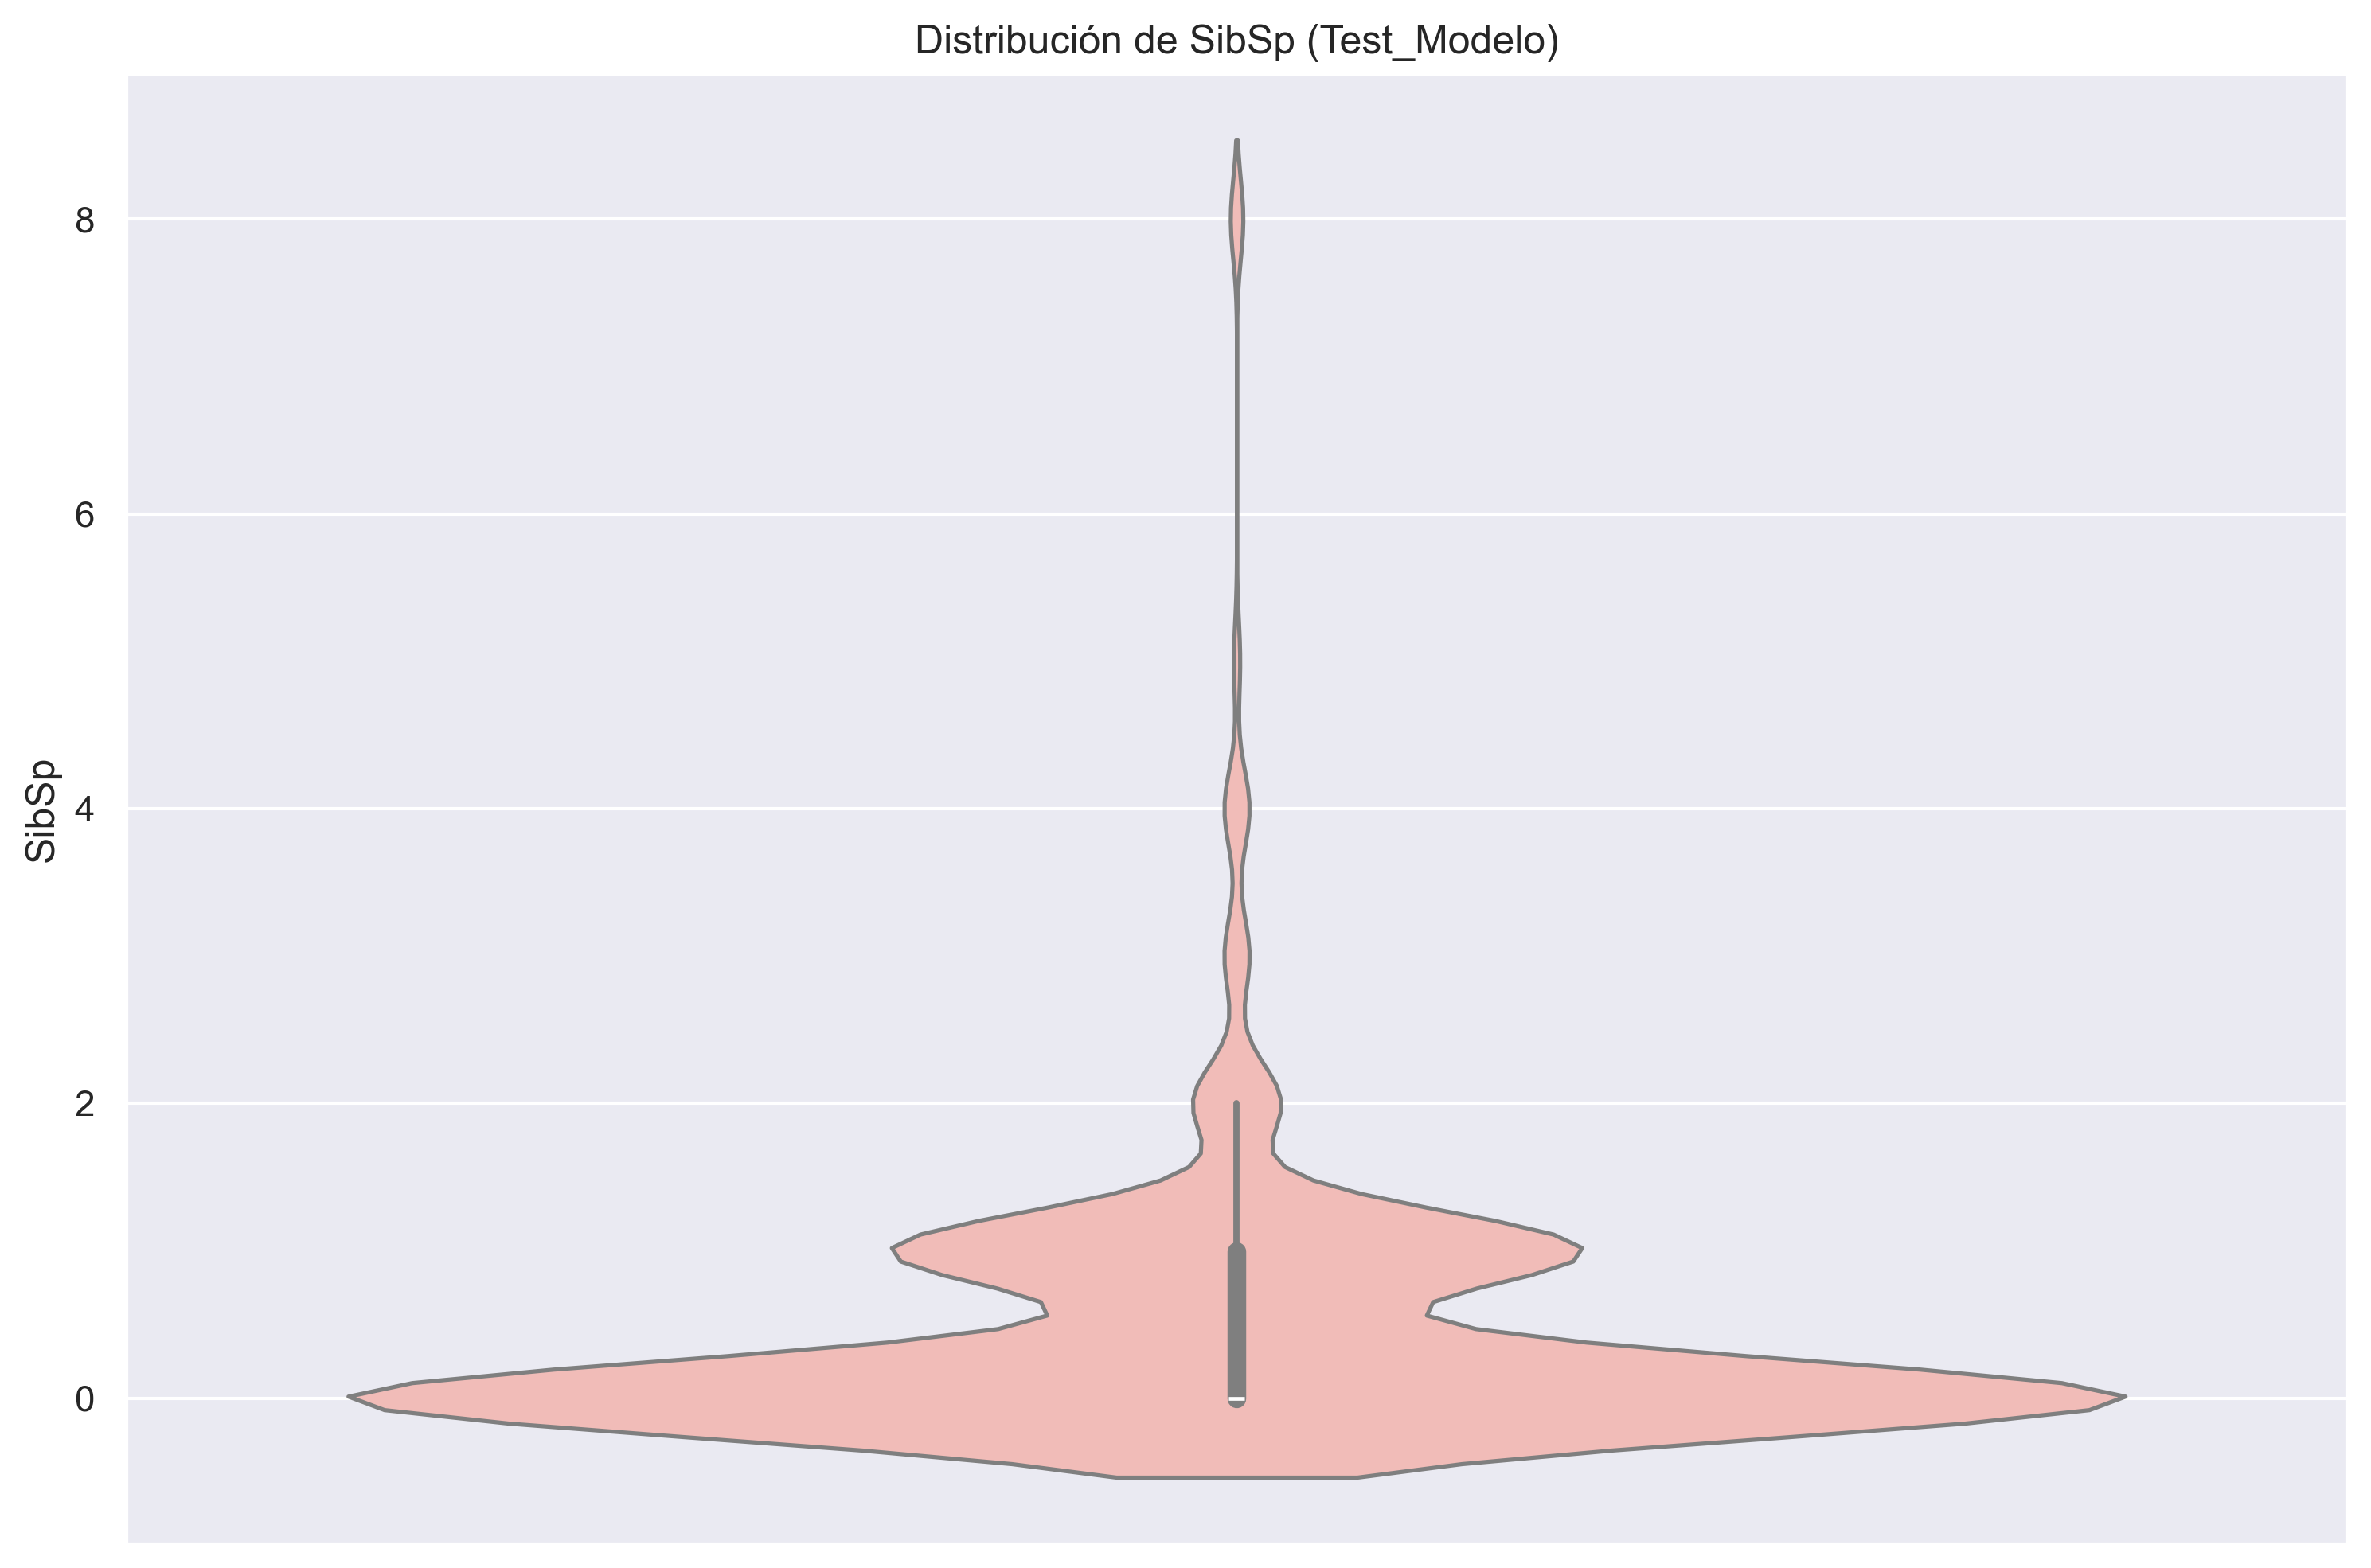

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=test_modelo, palette="Pastel1")


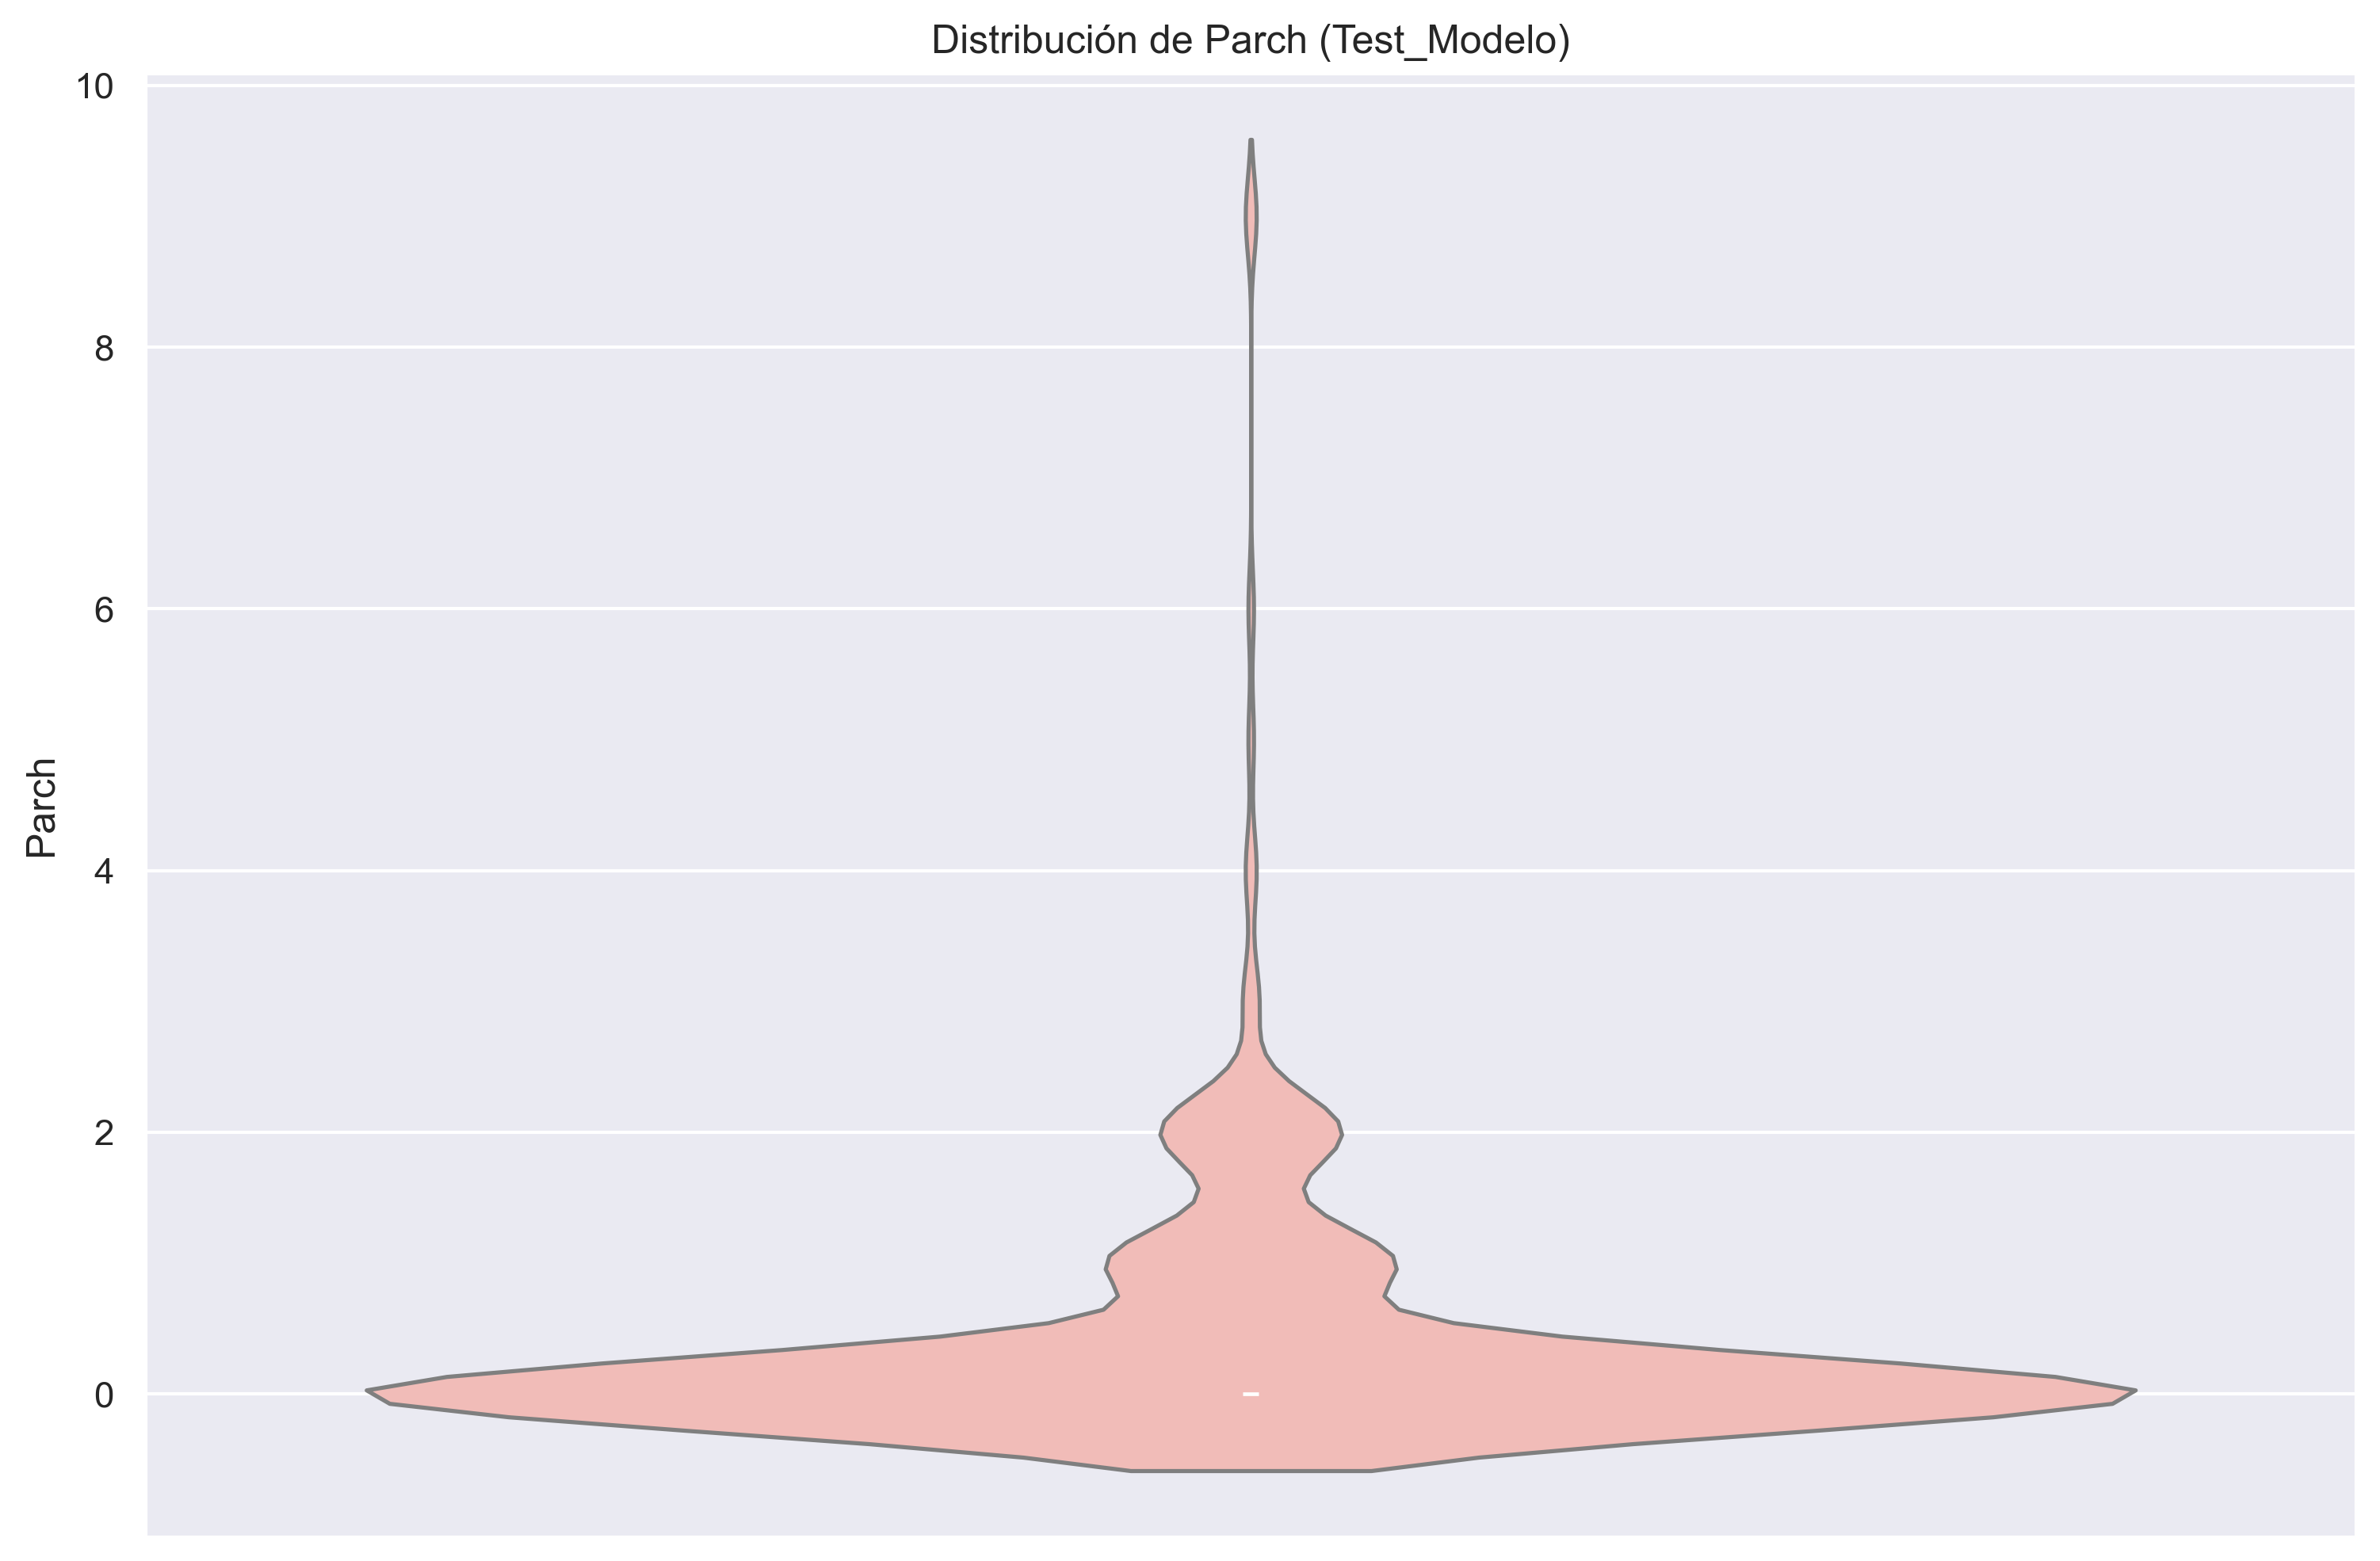

Comparando distribuciones entre TRAIN y TEST...


C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


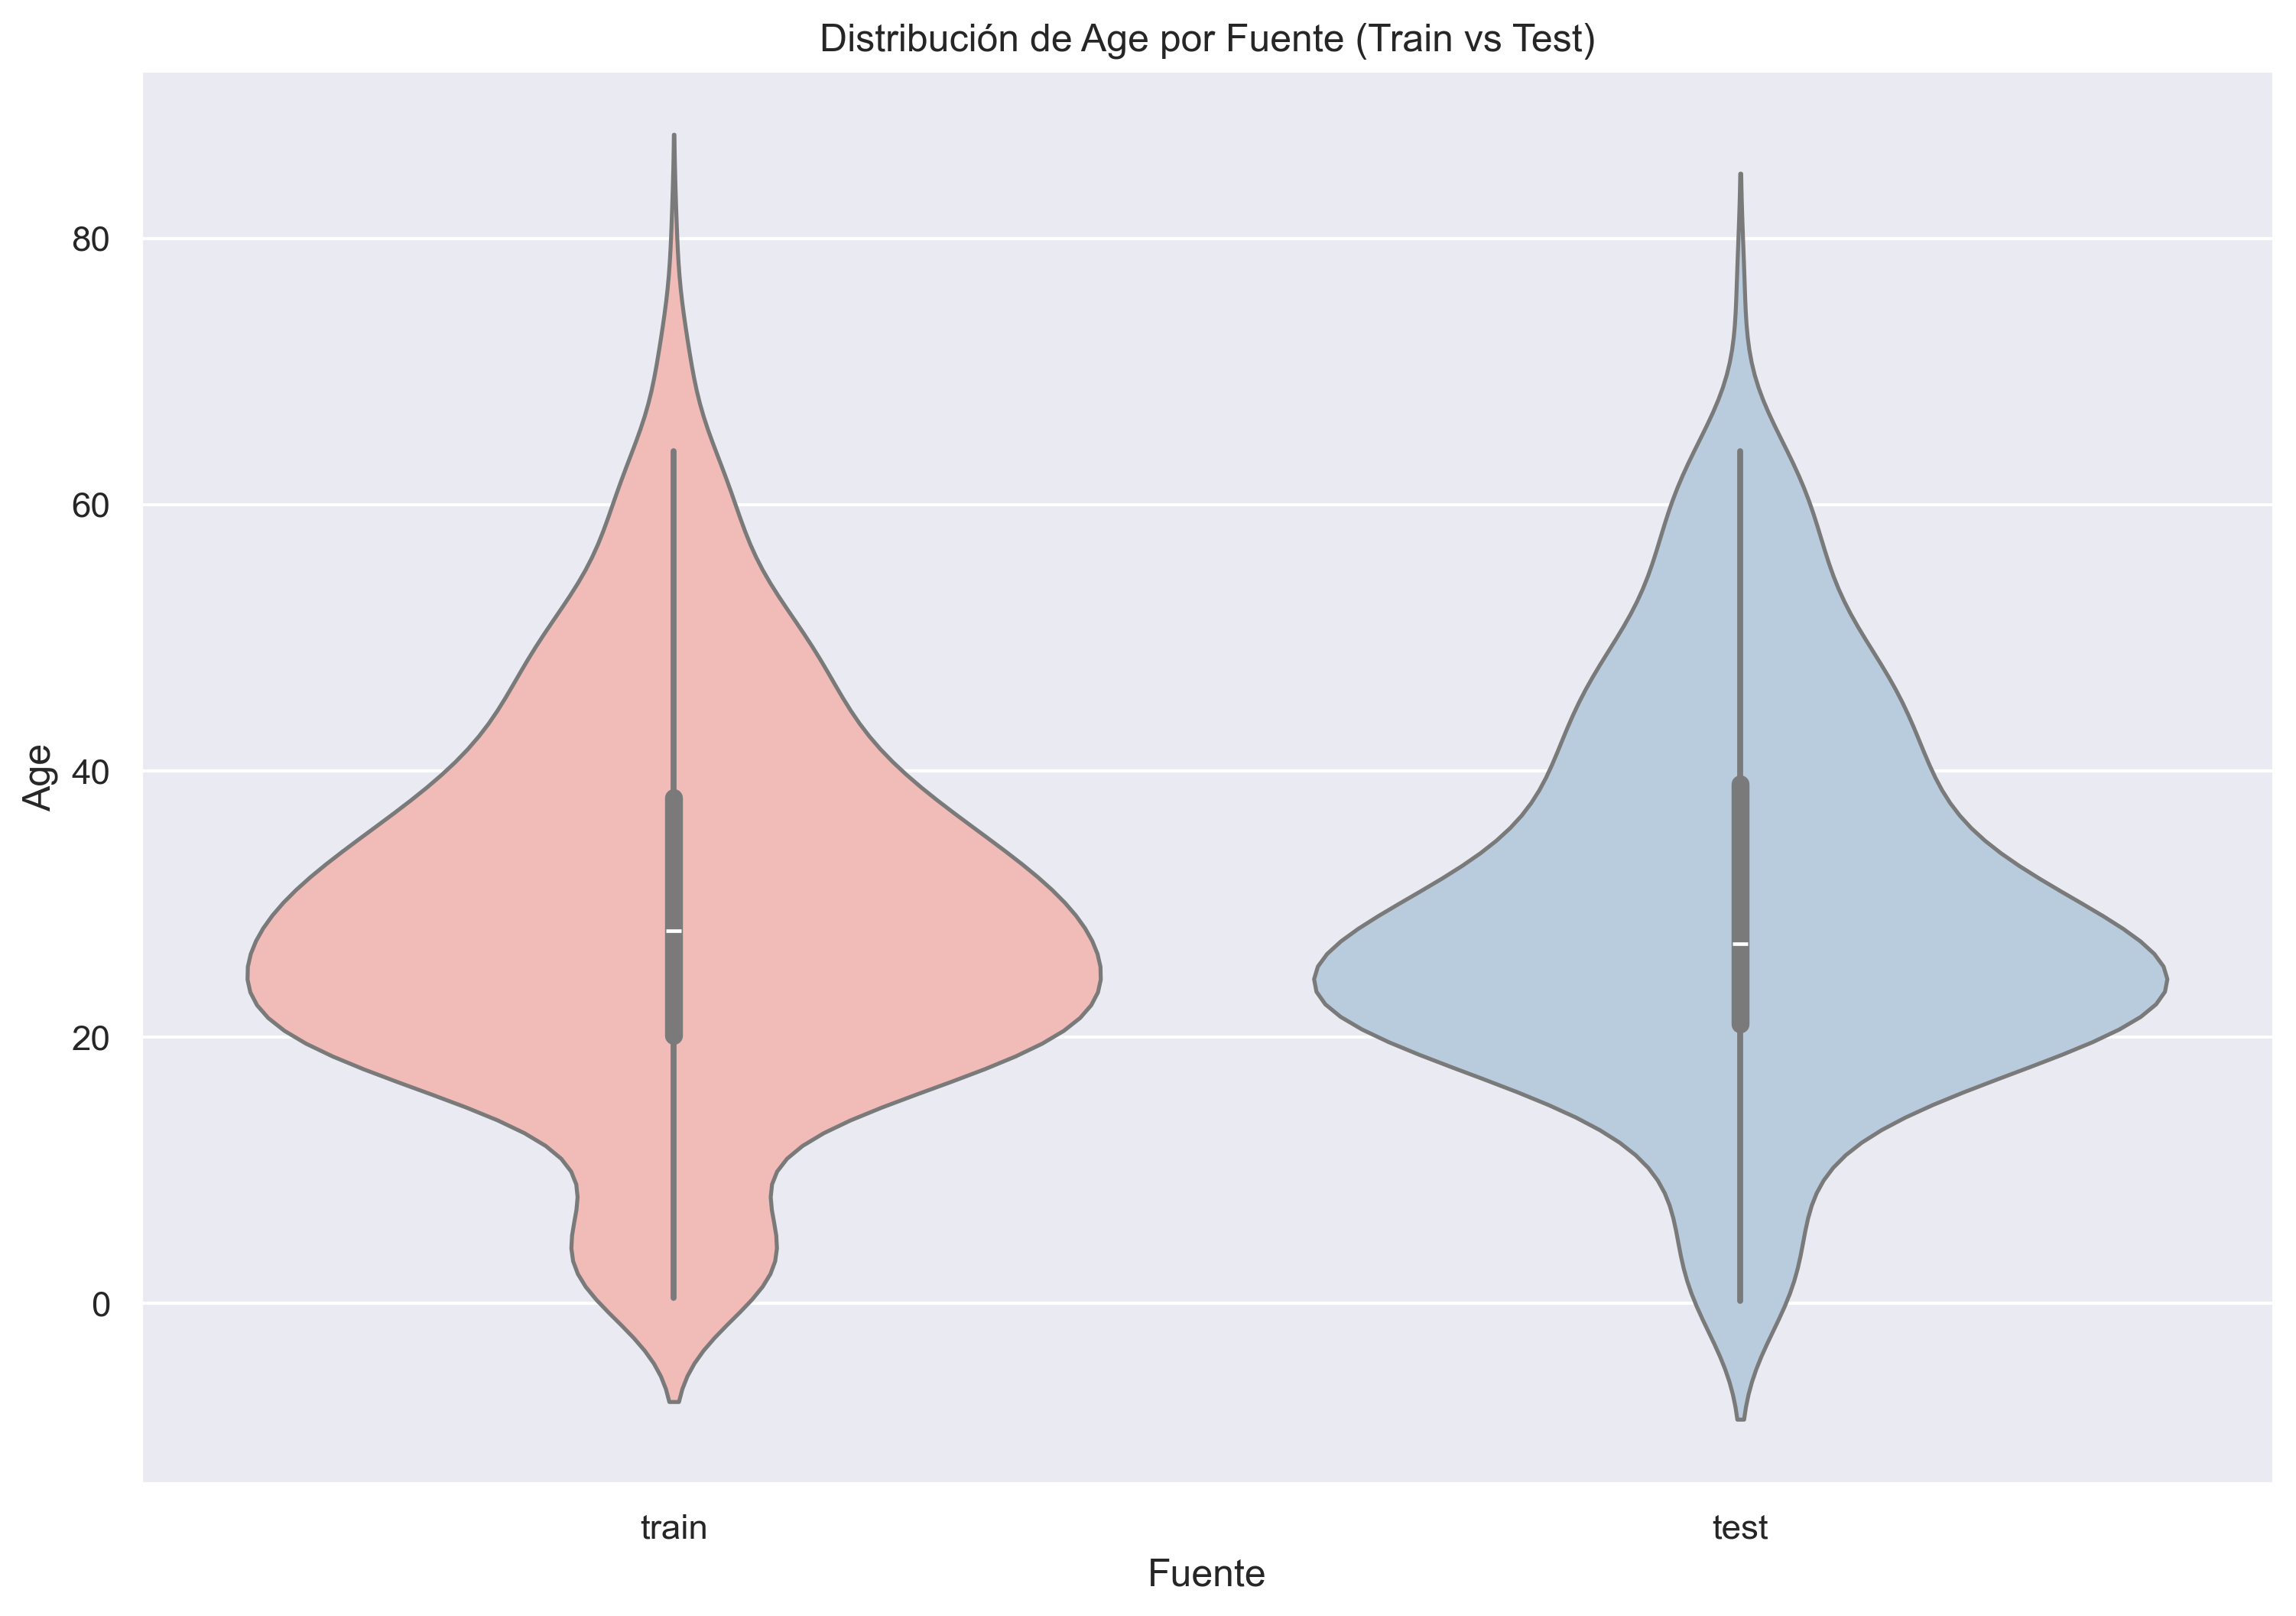

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


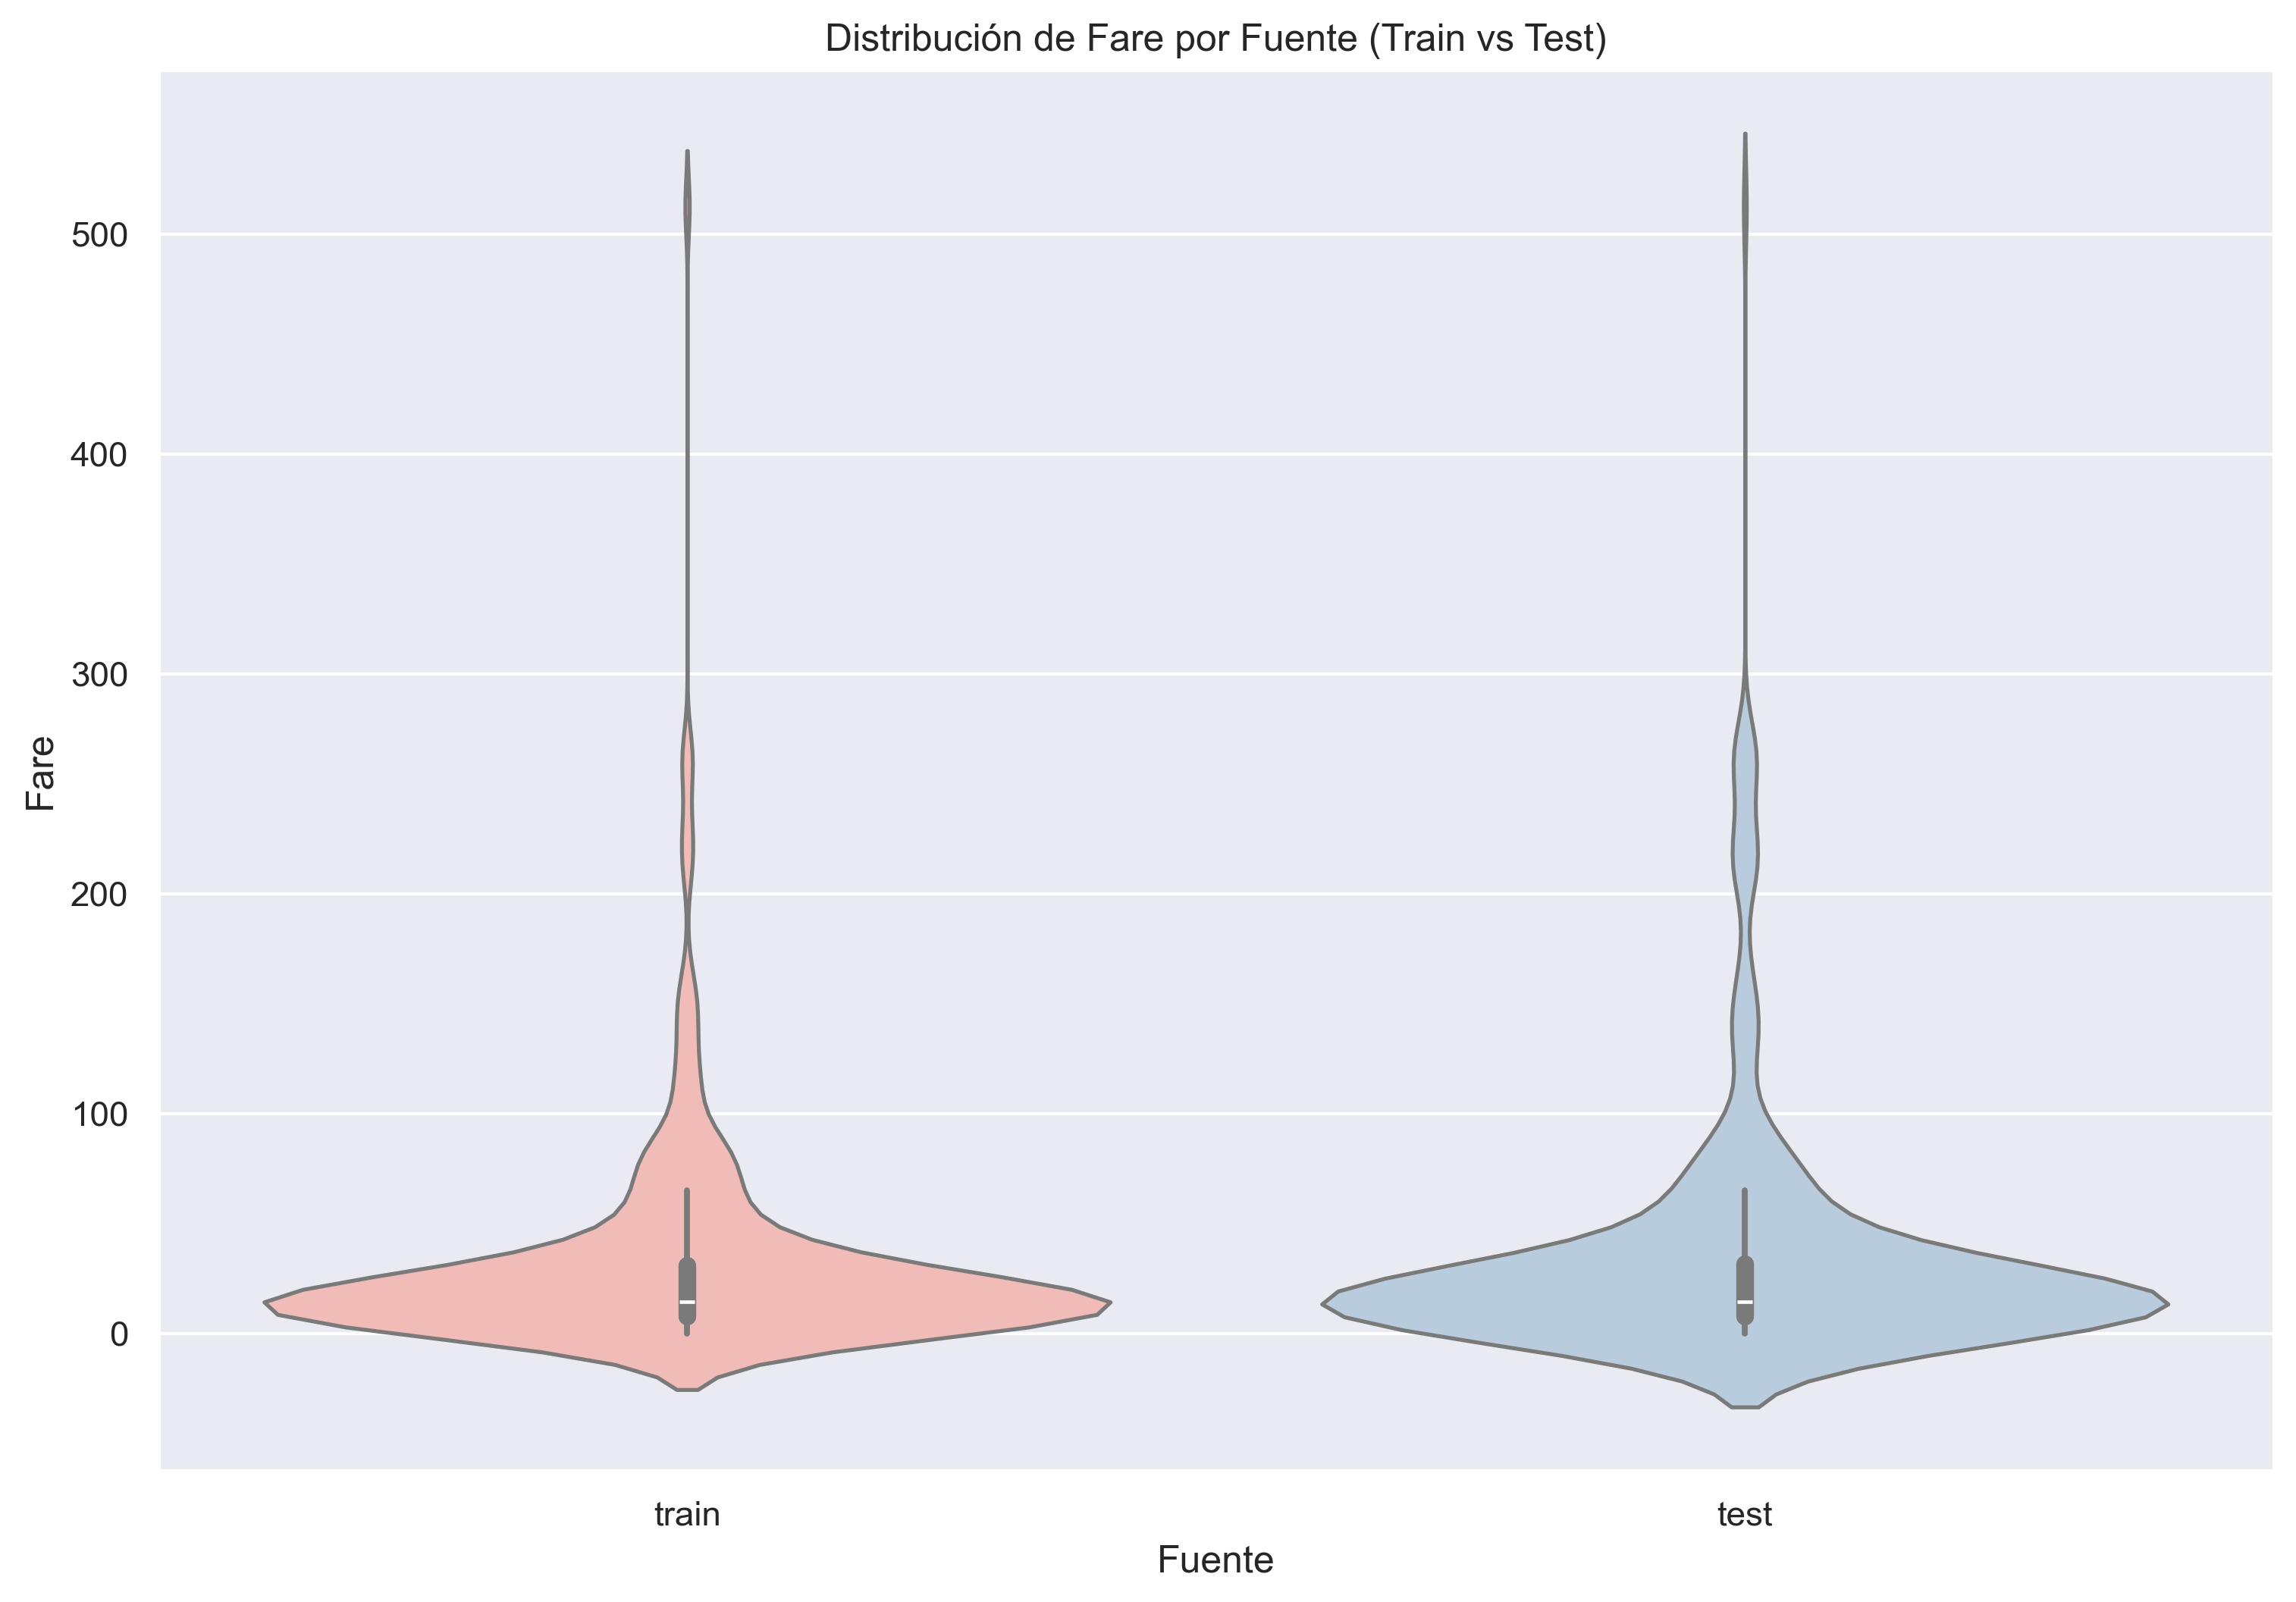

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


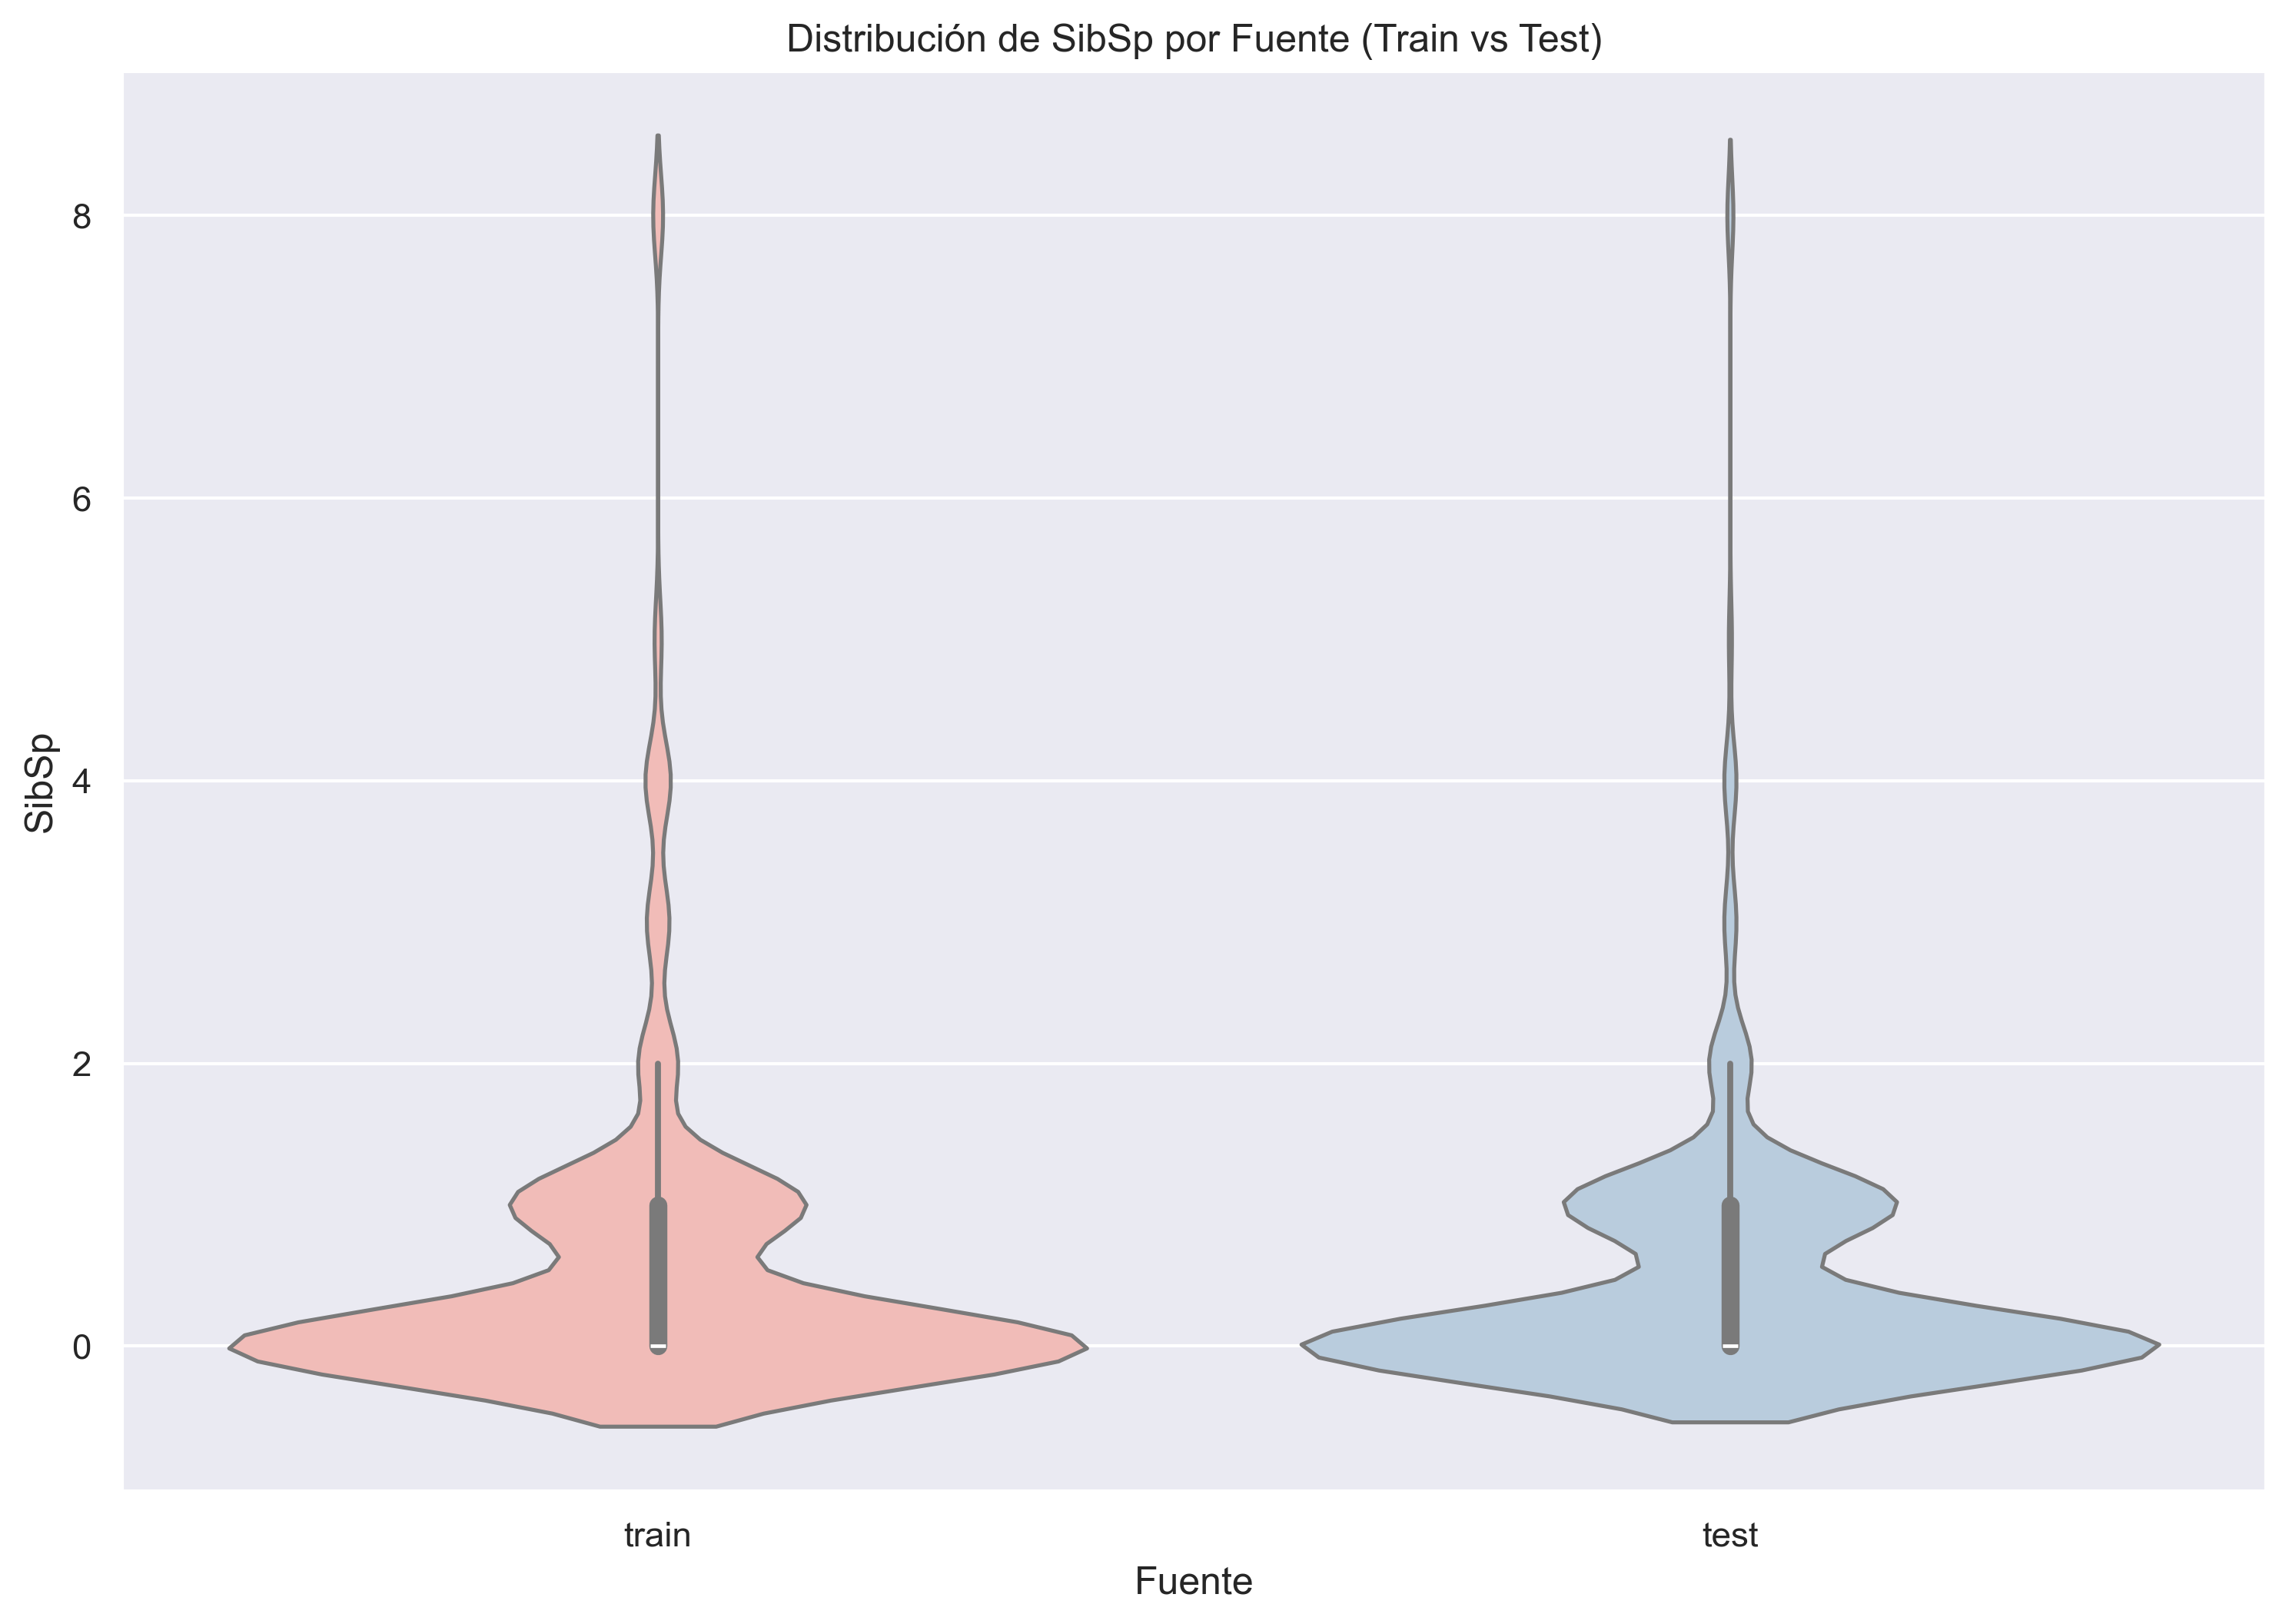

C:\Users\User\AppData\Local\Temp\ipykernel_19060\2105269181.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")


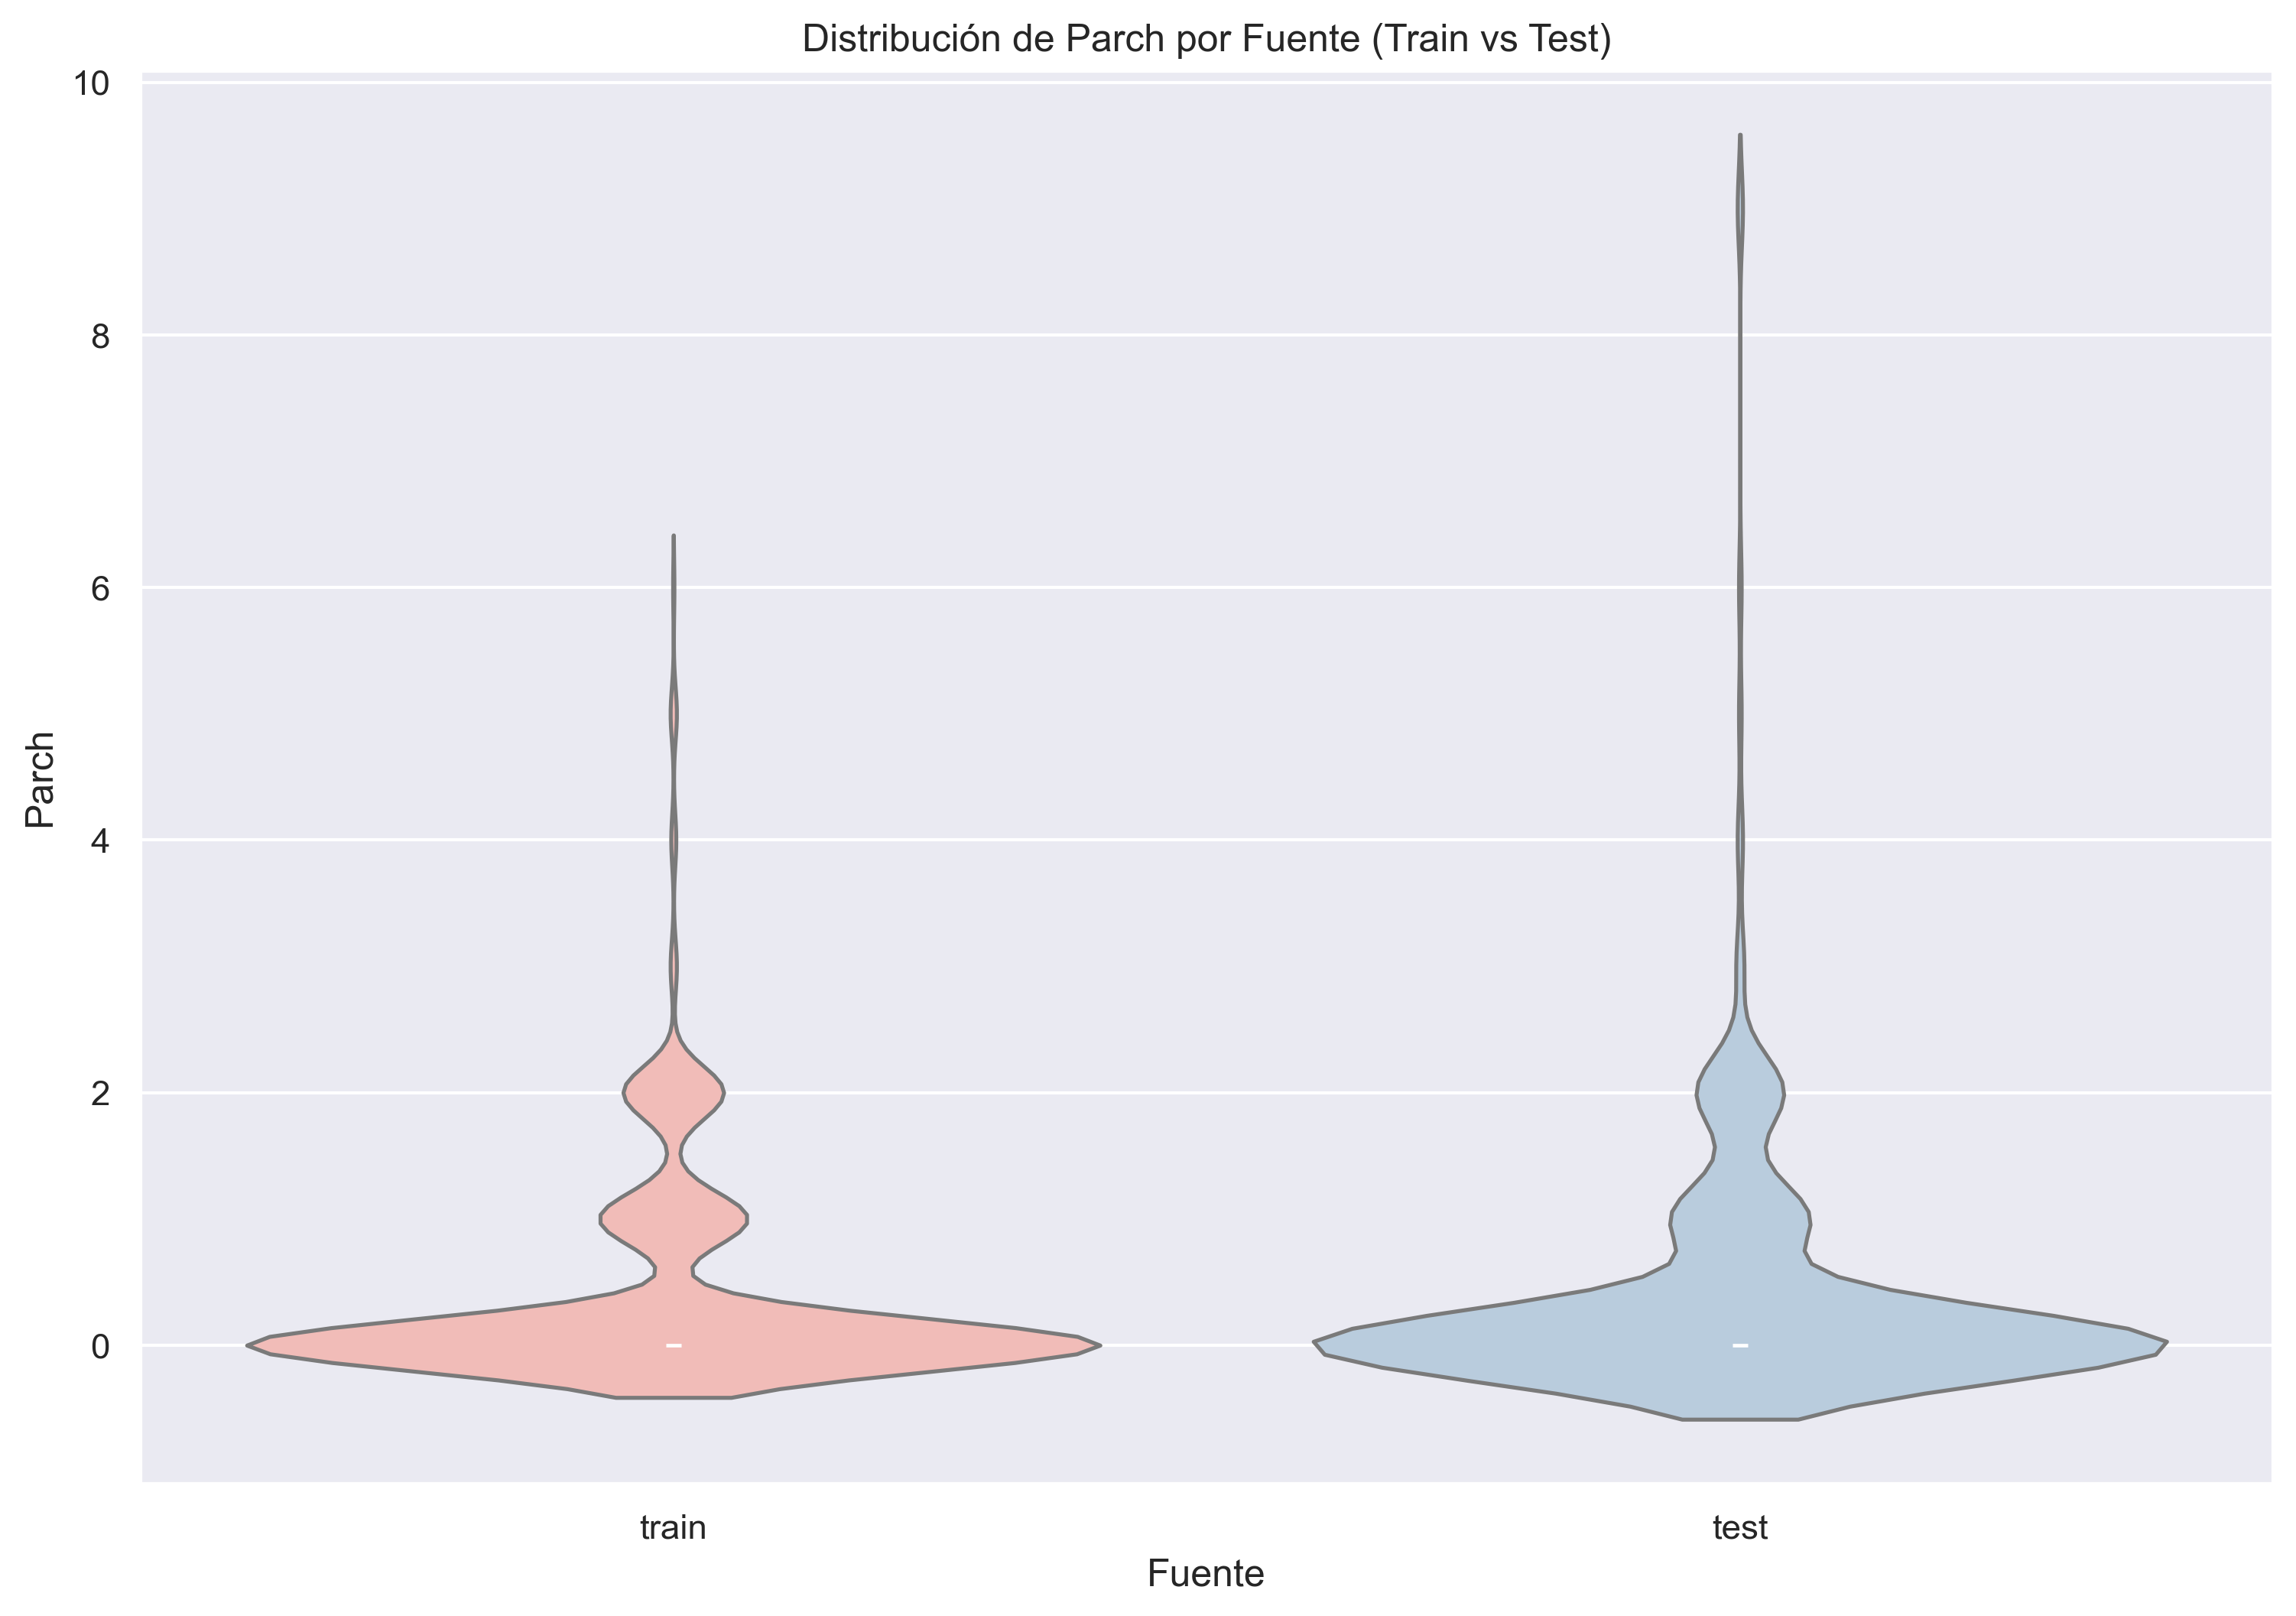

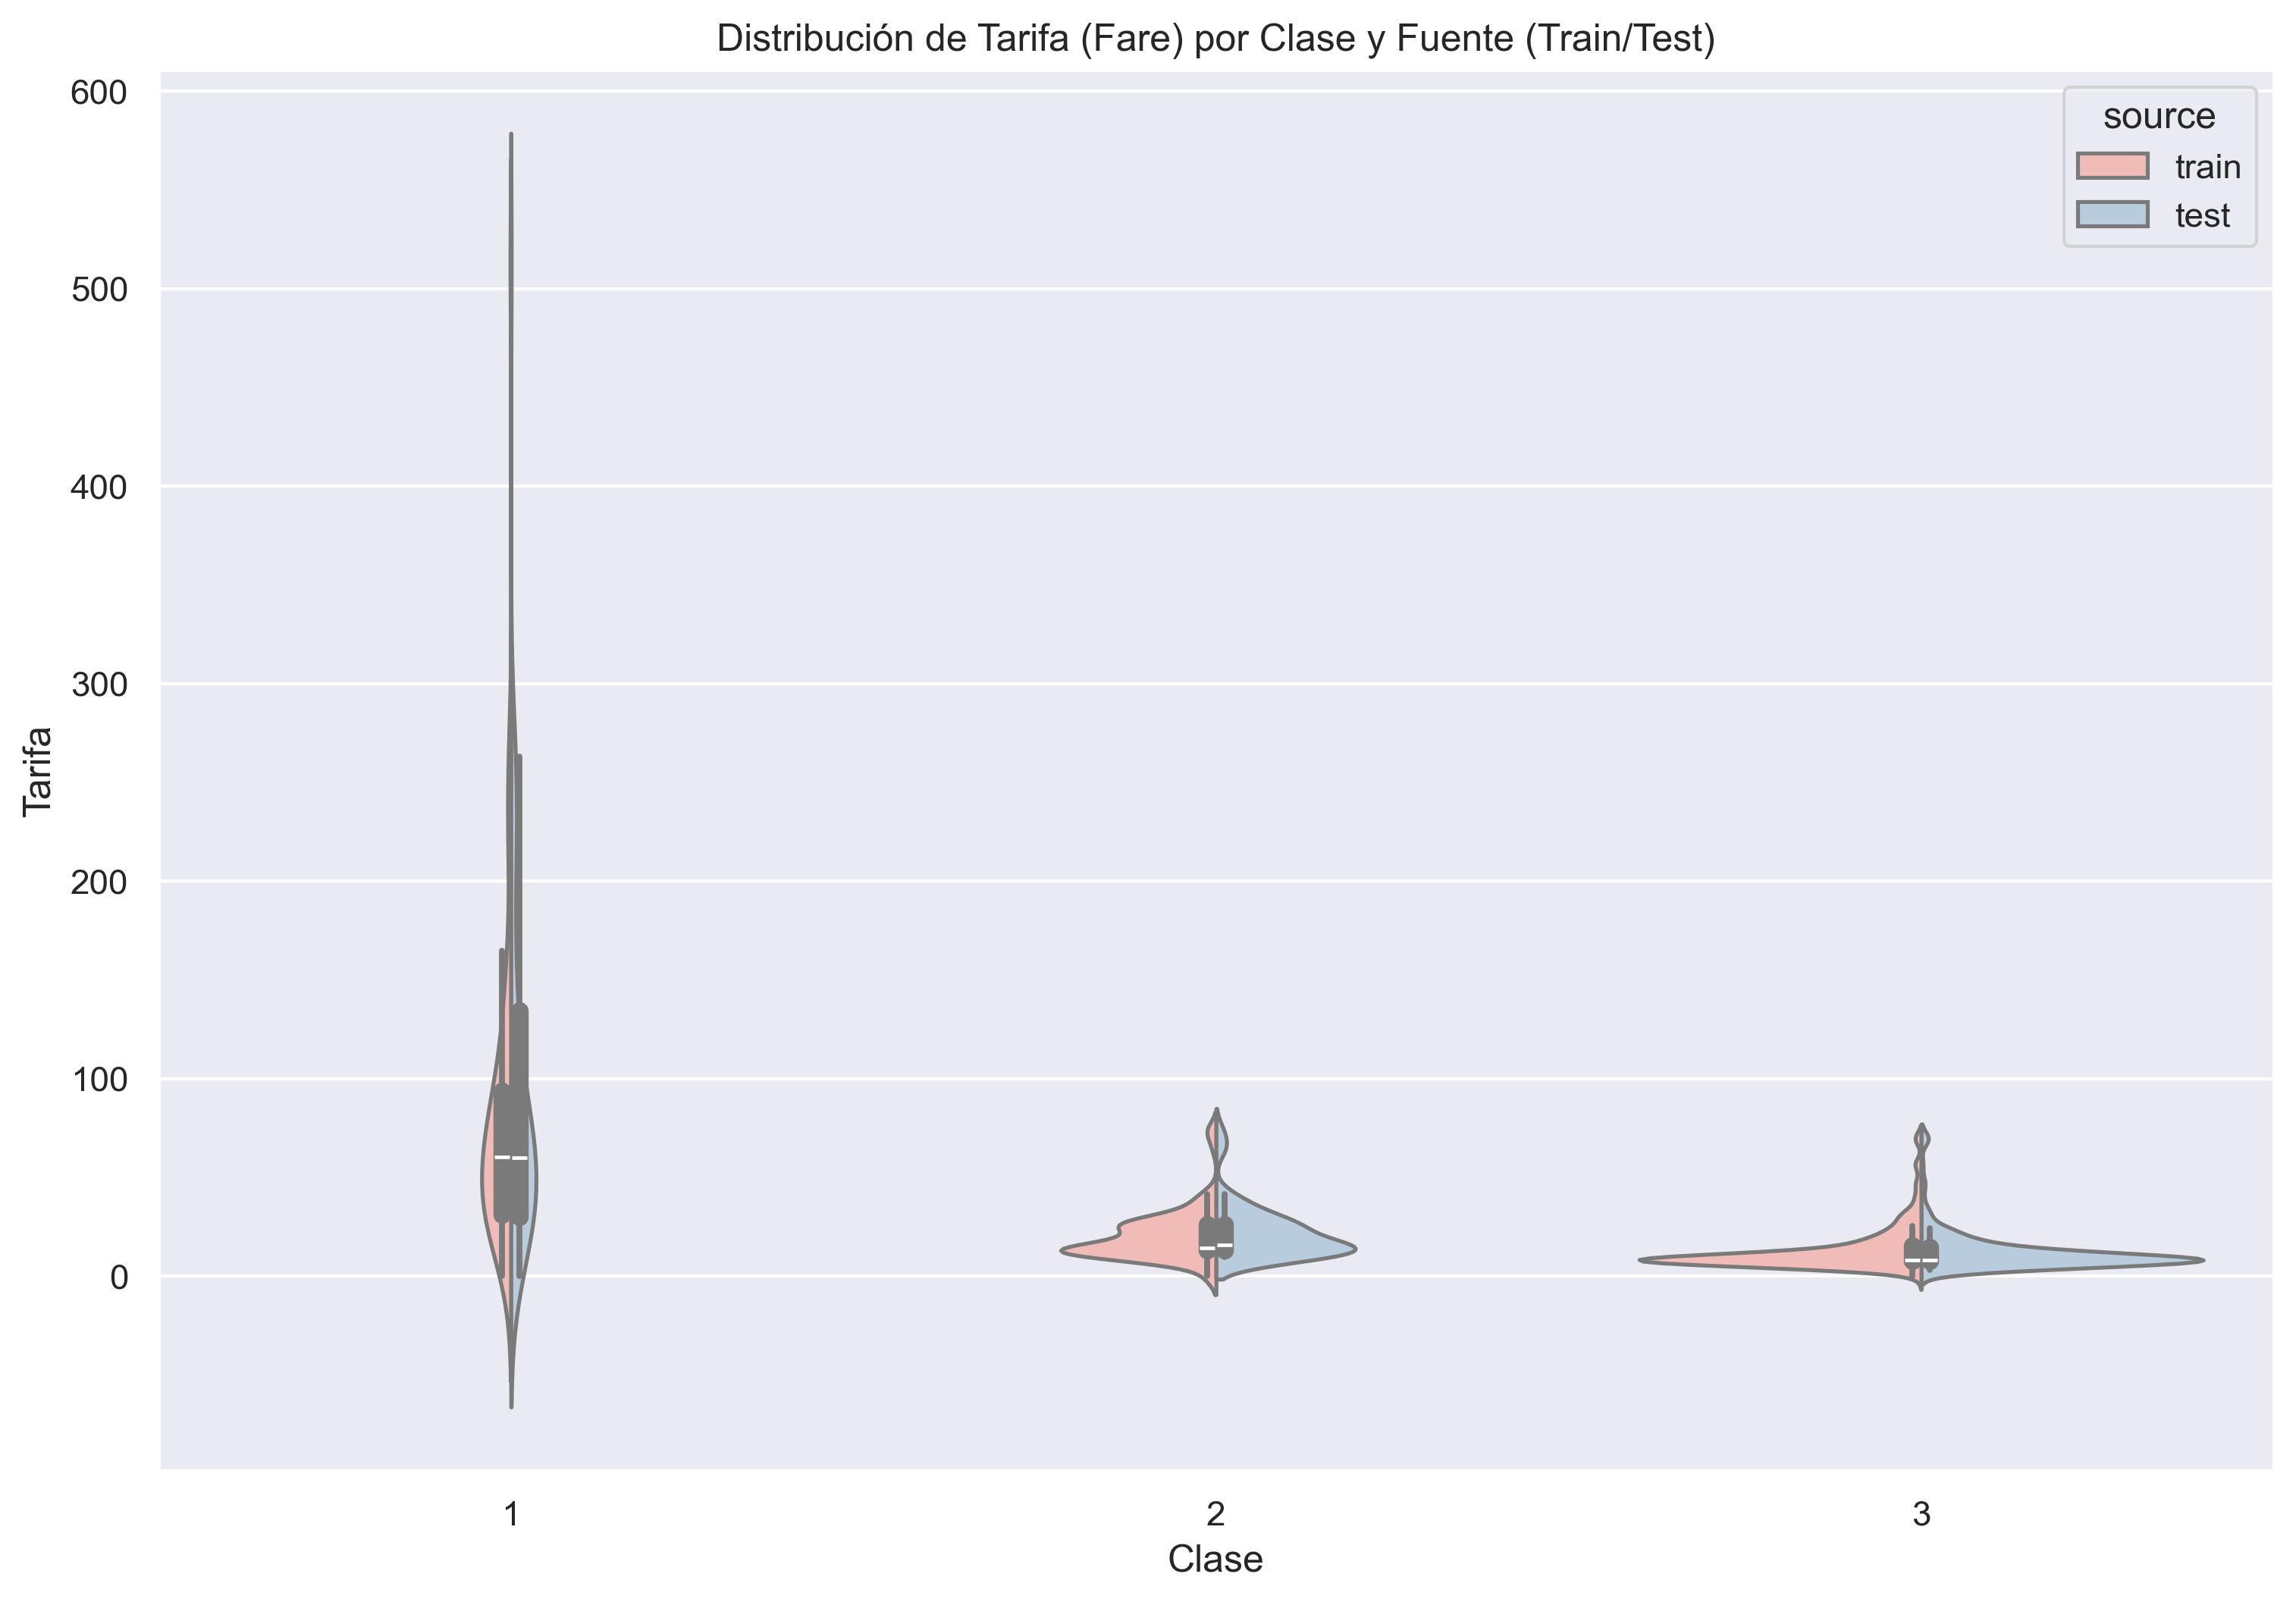

In [9]:
train["source"] = "train"
test["source"] = "test"
if "Survived" not in test.columns:
    test["Survived"] = None

ambos = pd.concat([train, test], ignore_index=True)

def ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

num_cols = ["Age", "Fare", "SibSp", "Parch"]
train = ensure_numeric(train, num_cols)
test_modelo = ensure_numeric(test_modelo, num_cols)
ambos = ensure_numeric(ambos, num_cols)

plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="darkgrid")

print("Mostrando distribuciones de las variables numéricas en el conjunto TRAIN...")

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in train.columns:
        sns.violinplot(x="Survived", y=col, data=train, palette="Pastel1")
        plt.title(f"Distribución de {col} según Supervivencia (Train)")
        plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
        plt.ylabel(col)
        plt.show()

if {"Pclass", "Fare"}.issubset(train.columns):
    sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=train, palette="Pastel1", split=True)
    plt.title("Distribución de Tarifa (Fare) por Clase y Supervivencia (Train)")
    plt.xlabel("Clase")
    plt.ylabel("Tarifa")
    plt.show()

print("Visualizando distribuciones para el conjunto TEST_MODELO...")

if "PassengerId" in test_modelo.columns and "PassengerId" in test.columns:
    test_modelo["PassengerId"] = test_modelo["PassengerId"].astype(str)
    test["PassengerId"] = test["PassengerId"].astype(str)
    test_modelo = test_modelo.merge(test, on="PassengerId", how="left", suffixes=("", "_test"))

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in test_modelo.columns:
        sns.violinplot(y=col, data=test_modelo, palette="Pastel1")
        plt.title(f"Distribución de {col} (Test_Modelo)")
        plt.ylabel(col)
        plt.show()

print("Comparando distribuciones entre TRAIN y TEST...")

for col in ["Age", "Fare", "SibSp", "Parch"]:
    if col in ambos.columns:
        sns.violinplot(x="source", y=col, data=ambos, palette="Pastel1")
        plt.title(f"Distribución de {col} por Fuente (Train vs Test)")
        plt.xlabel("Fuente")
        plt.ylabel(col)
        plt.show()

if {"Pclass", "Fare", "source"}.issubset(ambos.columns):
    sns.violinplot(x="Pclass", y="Fare", hue="source", data=ambos, palette="Pastel1", split=True)
    plt.title("Distribución de Tarifa (Fare) por Clase y Fuente (Train/Test)")
    plt.xlabel("Clase")
    plt.ylabel("Tarifa")
    plt.show()